# Group 6 Group Project


# EDA 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from matplotlib import style
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from tkinter import *
from tkinter.font import Font
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from pyclustertend import hopkins
from sklearn.decomposition import PCA
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime
%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <font color=Red>(A)	COLLECT / EXTRACT DATA</font>

<font color=Green>THE FIRST STEP IN BUILDING A MODEL IS TO COLLECT OR EXTRACT DATA ON THE DEPENDENT VARIABLE AND INDEPENDENT VARIABLES FROM DIFFERENT DATASETS PROVIDED. DATA COLLECTION / EXTRACTION IS TIME CONSUMING AND EXPENSIVE PROCESS.

 </font>


In [2]:
#reading data from CC GENERAL
    
df_final_data = pd.read_csv('CC GENERAL.csv')
#df1 = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Candidate Data')

print("File imported and data frame created")


File imported and data frame created


In [3]:
df_final_data  # this is final mergded data set to be pre processed.

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [4]:
df_final_data.columns # all the  ATTRIBUTES  listed here  where categorical variables is CUST_ID


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# let's have a look at how many labels each variable has

for col in df_final_data.columns:
    print(col, ': ', len(df_final_data[col].unique()), ' labels')

CUST_ID :  8950  labels
BALANCE :  8871  labels
BALANCE_FREQUENCY :  43  labels
PURCHASES :  6203  labels
ONEOFF_PURCHASES :  4014  labels
INSTALLMENTS_PURCHASES :  4452  labels
CASH_ADVANCE :  4323  labels
PURCHASES_FREQUENCY :  47  labels
ONEOFF_PURCHASES_FREQUENCY :  47  labels
PURCHASES_INSTALLMENTS_FREQUENCY :  47  labels
CASH_ADVANCE_FREQUENCY :  54  labels
CASH_ADVANCE_TRX :  65  labels
PURCHASES_TRX :  173  labels
CREDIT_LIMIT :  206  labels
PAYMENTS :  8711  labels
MINIMUM_PAYMENTS :  8637  labels
PRC_FULL_PAYMENT :  47  labels
TENURE :  7  labels


# <font color=Red>(B)	PRE-PROCESS DATA</font>

<font color=Green>BEAFORE THE MODEL IS BUILT, IT IS ESSENTIAL TO ENSURE THE QUALITY OF THE DATA FOR ISSUES SUCH AS RELIABILITY, COMPLETENESS, USEFULLNESS, ACCURACY, MISSING DATA AND OUTLIERS.

DATA IMPUTATION TECHNIQUES MAY BE USED TO DEAL WITH MISSING DATA. USE OF DESCRIPTIVE STAT AND VISUZLAIZATION MAY BE USED TO IDENTIFY THE EXISTENCE OF OUTLIERS AND VARIABILITY IN THE DATASET. MANY NEW VARIABLES CAN BE DERIVED AND ALOS USED IN MODEL BUILDING. CATEGORICAL DATA HAS TO BE PRE-PROCESSED USING DUMMY VARIABELS, BEFORE IT IS USED TO MODEL BUILDING.
</font>


In [6]:
df_final_data.isnull() # checking null values in data set

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       False    False              False      False             False   
1       False    False              False      False             False   
2       False    False              False      False             False   
3       False    False              False      False             False   
4       False    False              False      False             False   
...       ...      ...                ...        ...               ...   
8945    False    False              False      False             False   
8946    False    False              False      False             False   
8947    False    False              False      False             False   
8948    False    False              False      False             False   
8949    False    False              False      False             False   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      False         False                False   
1                      False         False                False   
2                      False         False                False   
3                      False         False                False   
4                      False         False                False   
...                      ...           ...                  ...   
8945                   False         False                False   
8946                   False         False                False   
8947                   False         False                False   
8948                   False         False                False   
8949                   False         False                False   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                          False                             False   
1                          False                             False   
2                          False                             False   
3                          False                             False   
4                          False                             False   
...                          ...                               ...   
8945                       False                             False   
8946                       False                             False   
8947                       False                             False   
8948                       False                             False   
8949                       False                             False   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      False             False          False         False   
1                      False             False          False         False   
2                      False             False          False         False   
3                      False             False          False         False   
4                      False             False          False         False   
...                      ...               ...            ...           ...   
8945                   False             False          False         False   
8946                   False             False          False         False   
8947                   False             False          False         False   
8948                   False             False          False         False   
8949                   False             False          False         False   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        False             False             False   False  
1        False             False             False   False  
2        False             False             False   False  
3        False              True             False   False  
4        False             False             False   False  
...        ...               ...               ...     ...  
8945     False             False             False   False  
8946     False              True  

In [7]:
df_final_data.isnull().sum() 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df_final_data.duplicated() # checking duplicate data

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [9]:
df_final_data[df_final_data.duplicated()] # checking if there is any duplicate entry or not.

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [10]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
# checking for unique values for all the variables.
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   

In [12]:
show_unique_values(df_final_data)

Unique value for dataset attributes :

CUST_ID   ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190'] 

BALANCE   [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075] 

BALANCE_FREQUENCY   [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667] 

PURCHASES   [  95.4     0.    773.17 ...  291.12  144.4  1093.25] 

ONEOFF_PURCHASES   [   0.    773.17 1499.   ...  734.4  1012.73 1093.25] 

INSTALLMENTS_PURCHASES   [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ] 

CASH_ADVANCE   [   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008] 

PURCHASES_FREQUENCY   [0.166667 0.       1.       0.083333 0.666667 0.3

In [13]:
# checking for missing  values for all the variables.
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")

In [14]:
show_missing_values(df_final_data)

CUST_ID
False    8950
Name: CUST_ID, dtype: int64

BALANCE
False    8950
Name: BALANCE, dtype: int64

BALANCE_FREQUENCY
False    8950
Name: BALANCE_FREQUENCY, dtype: int64

PURCHASES
False    8950
Name: PURCHASES, dtype: int64

ONEOFF_PURCHASES
False    8950
Name: ONEOFF_PURCHASES, dtype: int64

INSTALLMENTS_PURCHASES
False    8950
Name: INSTALLMENTS_PURCHASES, dtype: int64

CASH_ADVANCE
False    8950
Name: CASH_ADVANCE, dtype: int64

PURCHASES_FREQUENCY
False    8950
Name: PURCHASES_FREQUENCY, dtype: int64

ONEOFF_PURCHASES_FREQUENCY
False    8950
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64

PURCHASES_INSTALLMENTS_FREQUENCY
False    8950
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64

CASH_ADVANCE_FREQUENCY
False    8950
Name: CASH_ADVANCE_FREQUENCY, dtype: int64

CASH_ADVANCE_TRX
False    8950
Name: CASH_ADVANCE_TRX, dtype: int64

PURCHASES_TRX
False    8950
Name: PURCHASES_TRX, dtype: int64

CREDIT_LIMIT
False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

PAYMENTS

In [15]:
#stroing 2 copies for other purposes
df_final_data_1=df_final_data.copy()
df_final_data_2=df_final_data.copy()


In [16]:
df_final_data_1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# <font color=Red>(C)	PERFORM DESCRIPTIVE ANALYTICS ON DATA</font>

<font color=green>IT IS ALWAYS GOOD TO PERFORM DESCRIPTIVE ANALYTICS BEFORE MOVING TO BUILDING A PREDICTIVE ANALYTICS MODEL. IT WILL HELP TO UNDERSTAND THE VARIABILITY IN THE MODEL. IT ALSO HELPS IN IDENTIFYING THE RELATIONSHIP BETWEEN THE VARIABLES PRESENT IN THE DATASET.
</font>




# Data preprocessing 

In [17]:
######## Data transformation to set the dataframe in the right format #########


df_final_data_1.drop("CUST_ID", axis = 1, inplace=True) #Cust ID is not required


######## Manage missing values and replace by mode to keep the data consistent ########

for column in df_final_data_1:
    print("\n\nmode of column: {} is {}".format(column,df_final_data_1[column].value_counts().idxmax()))
    df_final_data_1[column].replace(np.nan, df_final_data_1[column].value_counts().idxmax(), inplace = True)
print("\n\nAll misisng values if any replaced by mode")
print("\n\nIs any null value present after replacing the missing values:  ",df_final_data_1.isnull().values.any())


print("\n\nHead data post transformation\n\n",df_final_data_1.head(20))
print("\ndata types of dataframe post transformation\n",df_final_data_1.dtypes)






mode of column: BALANCE is 0.0


mode of column: BALANCE_FREQUENCY is 1.0


mode of column: PURCHASES is 0.0


mode of column: ONEOFF_PURCHASES is 0.0


mode of column: INSTALLMENTS_PURCHASES is 0.0


mode of column: CASH_ADVANCE is 0.0


mode of column: PURCHASES_FREQUENCY is 1.0


mode of column: ONEOFF_PURCHASES_FREQUENCY is 0.0


mode of column: PURCHASES_INSTALLMENTS_FREQUENCY is 0.0


mode of column: CASH_ADVANCE_FREQUENCY is 0.0


mode of column: CASH_ADVANCE_TRX is 0


mode of column: PURCHASES_TRX is 0


mode of column: CREDIT_LIMIT is 3000.0


mode of column: PAYMENTS is 0.0


mode of column: MINIMUM_PAYMENTS is 299.351881


mode of column: PRC_FULL_PAYMENT is 0.0


mode of column: TENURE is 12


All misisng values if any replaced by mode


Is any null value present after replacing the missing values:   False


Head data post transformation

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   

dtype: object


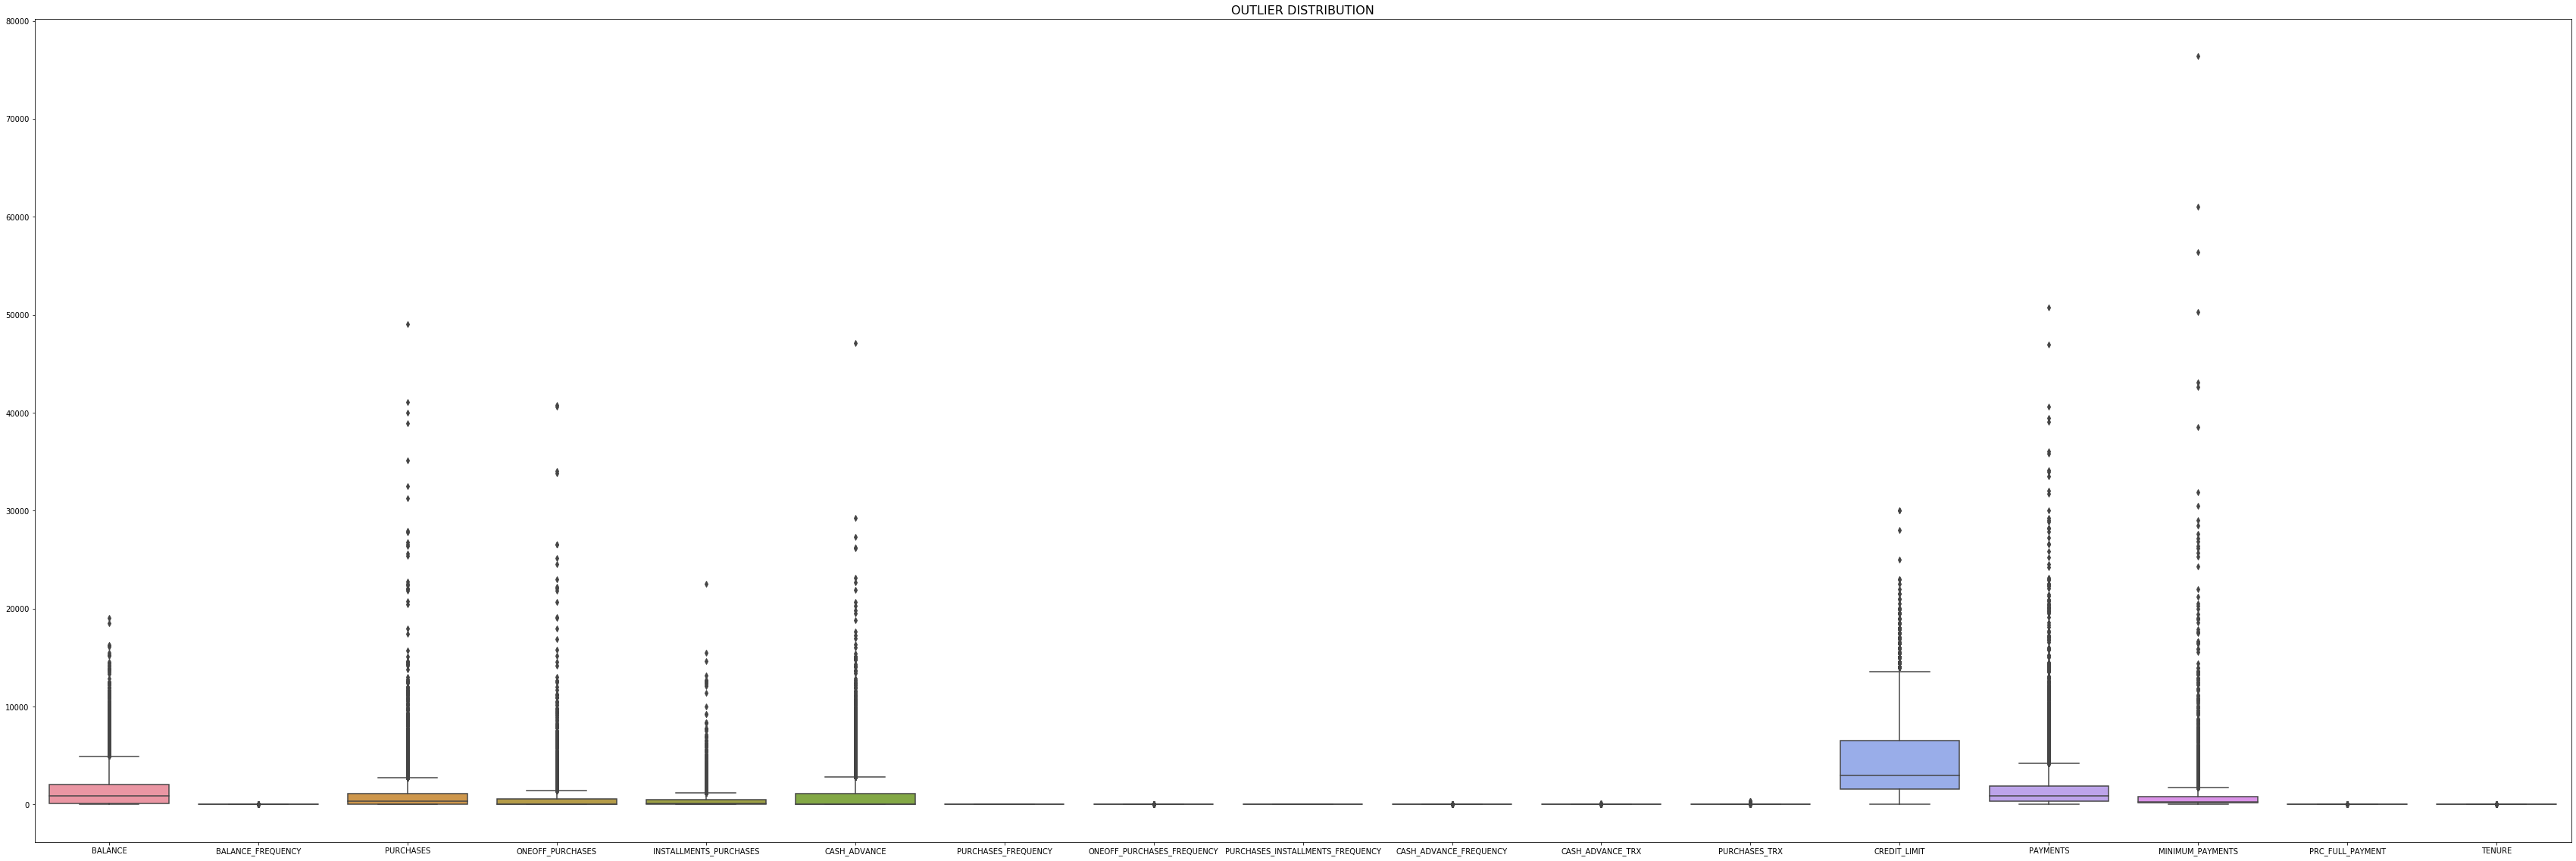

In [18]:
    #Draw Outlier distribution for the columns
    plt.figure(figsize=(60, 20))
    plt.title('OUTLIER DISTRIBUTION', fontsize=16)
    sns.boxplot(data=df_final_data_1)
    plt.show()

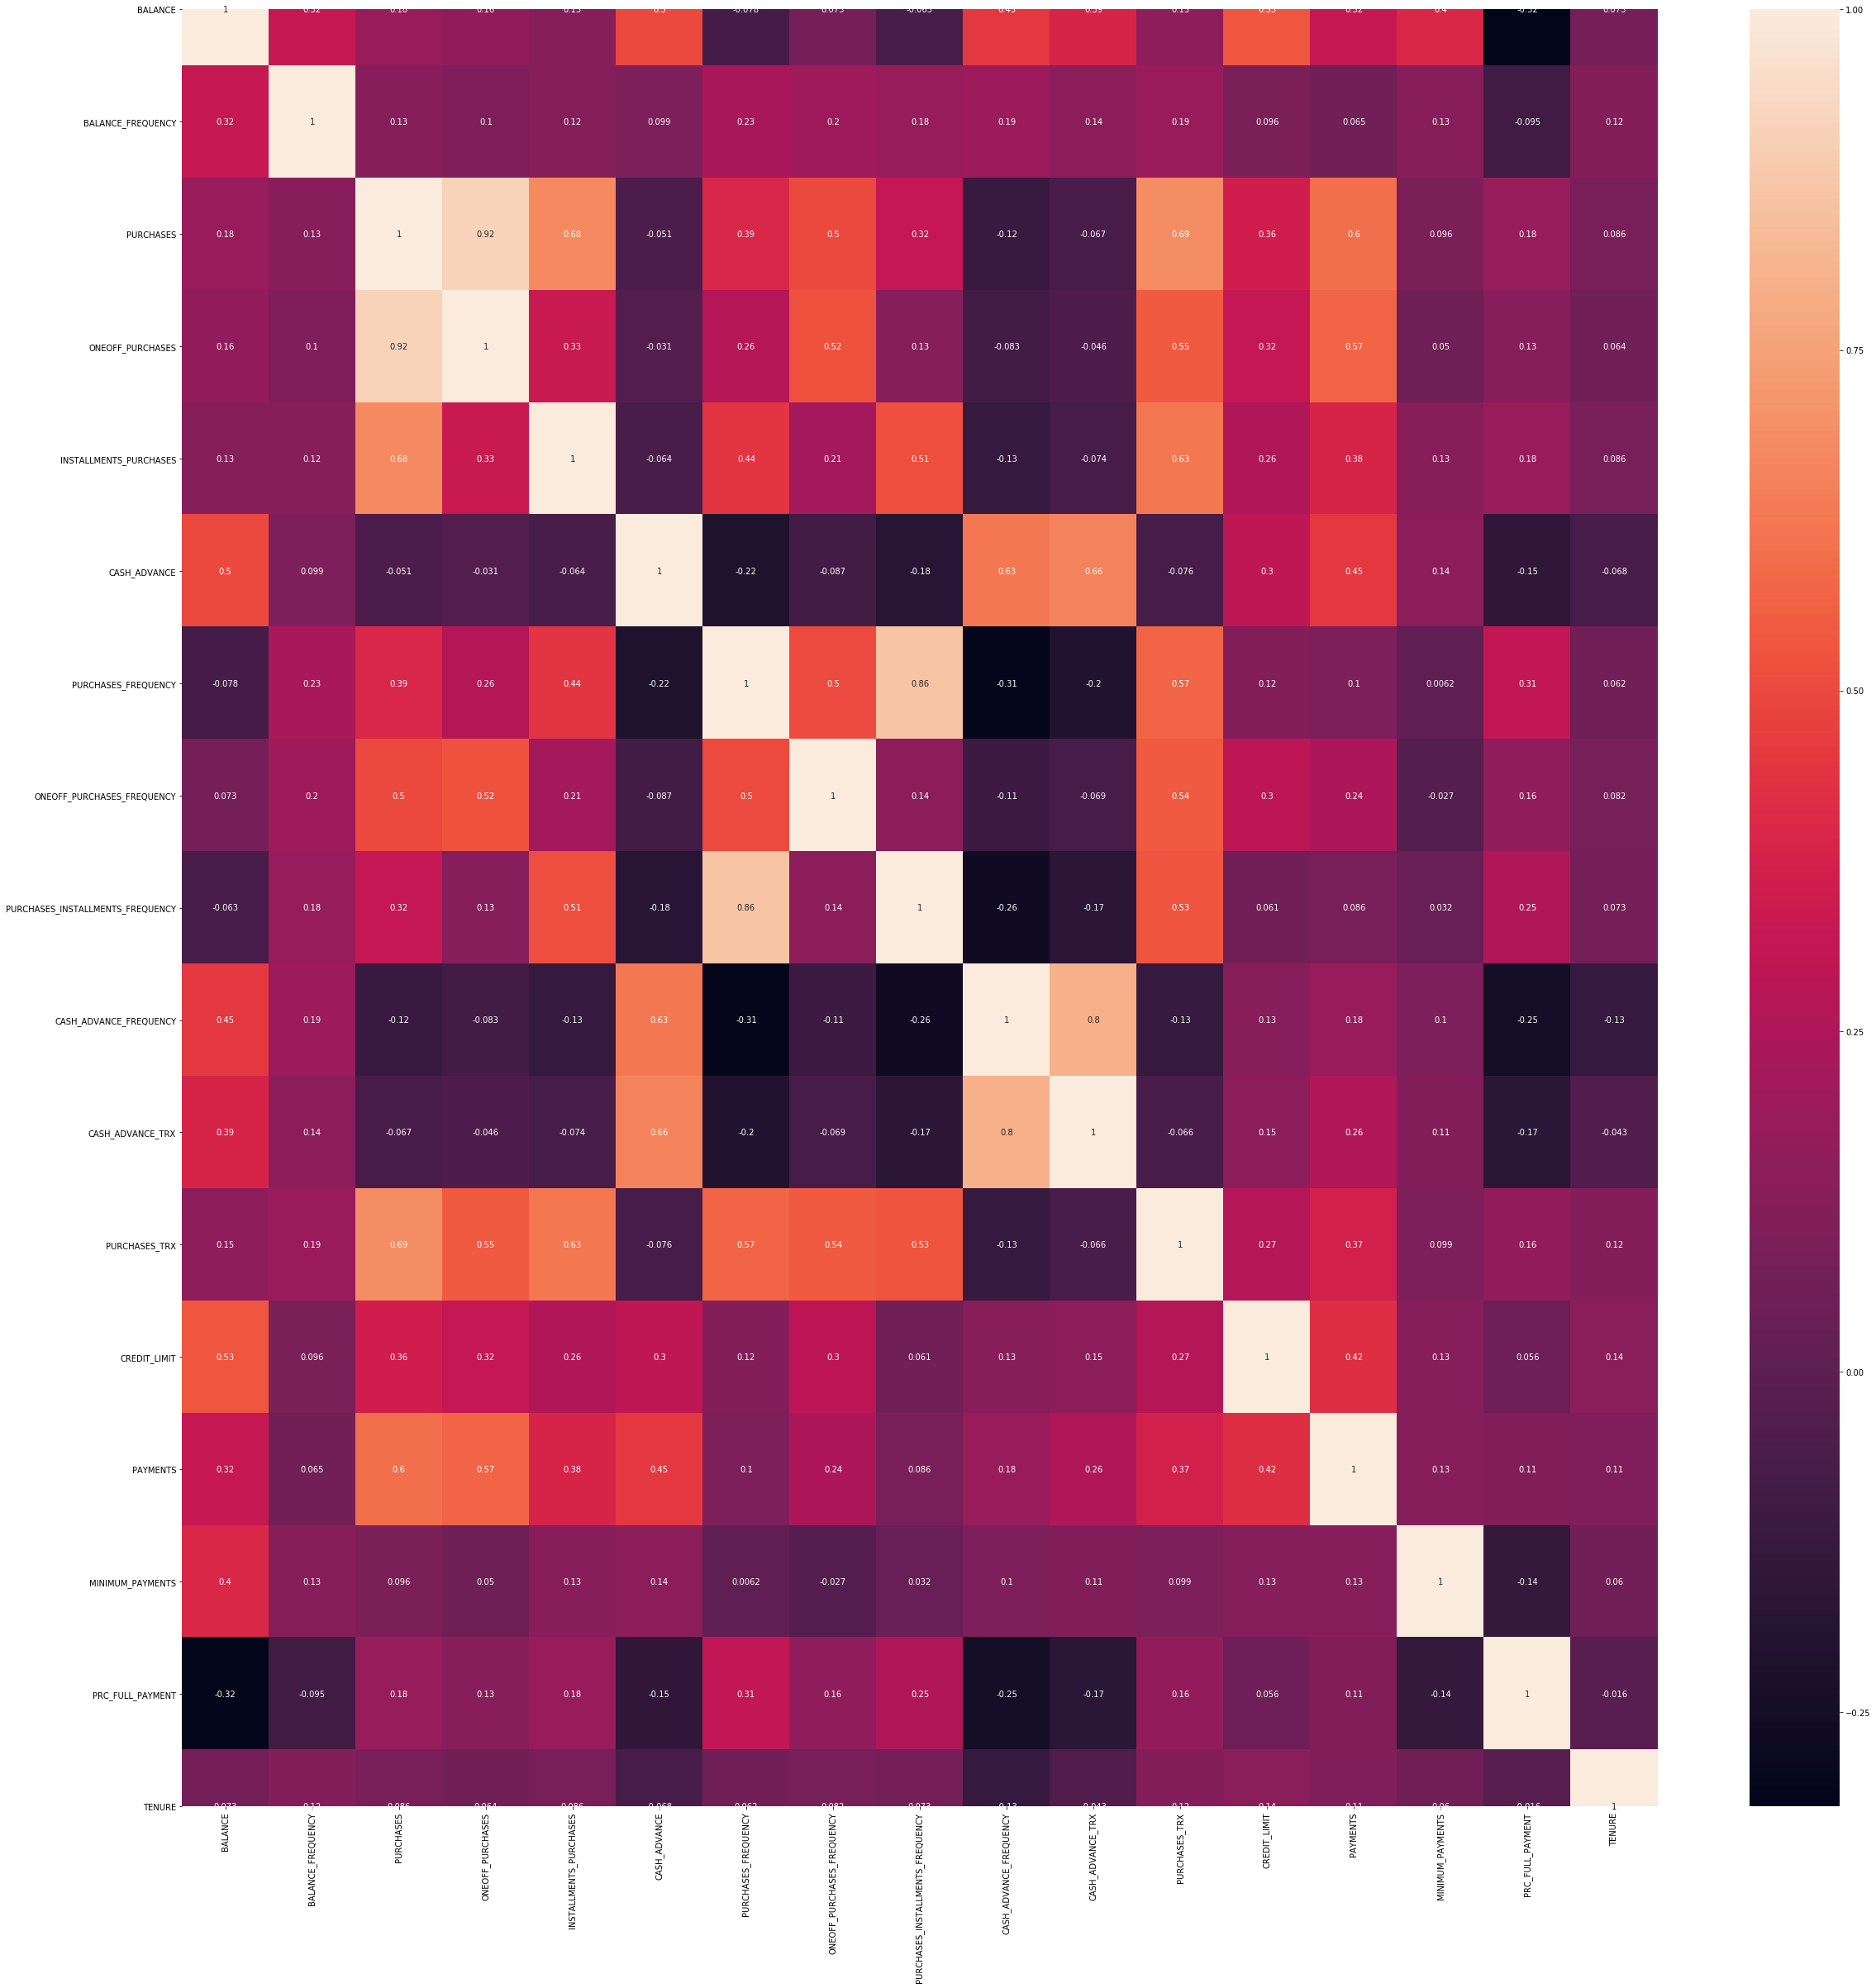

In [19]:
######## Check feature correlation #########

plt.figure(figsize=(40, 40))
snplot = sns.heatmap(df_final_data_1.corr(), annot=True)
plt.show()
snplot.get_figure().savefig('TransformedFeaturesPearsonCorrelation.pdf')

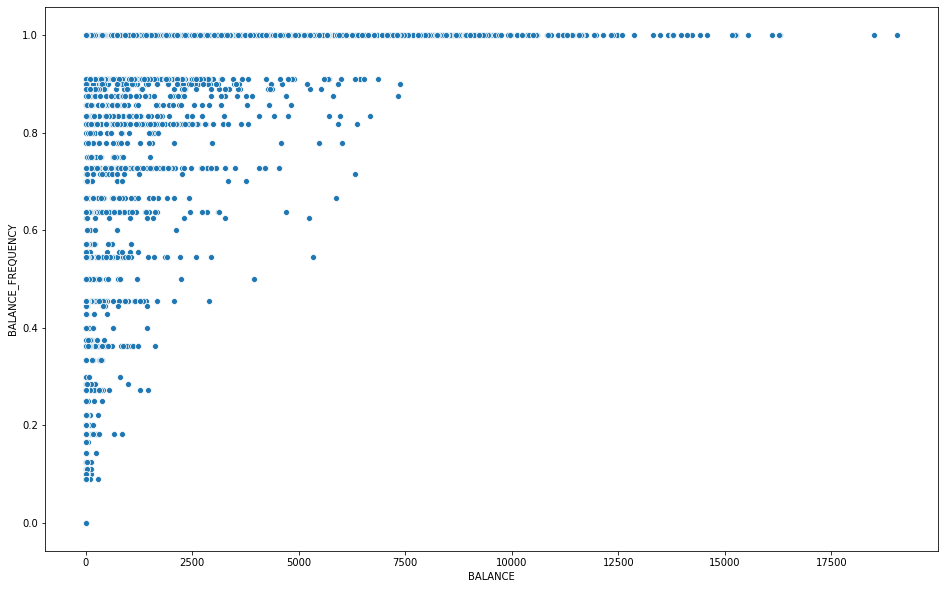

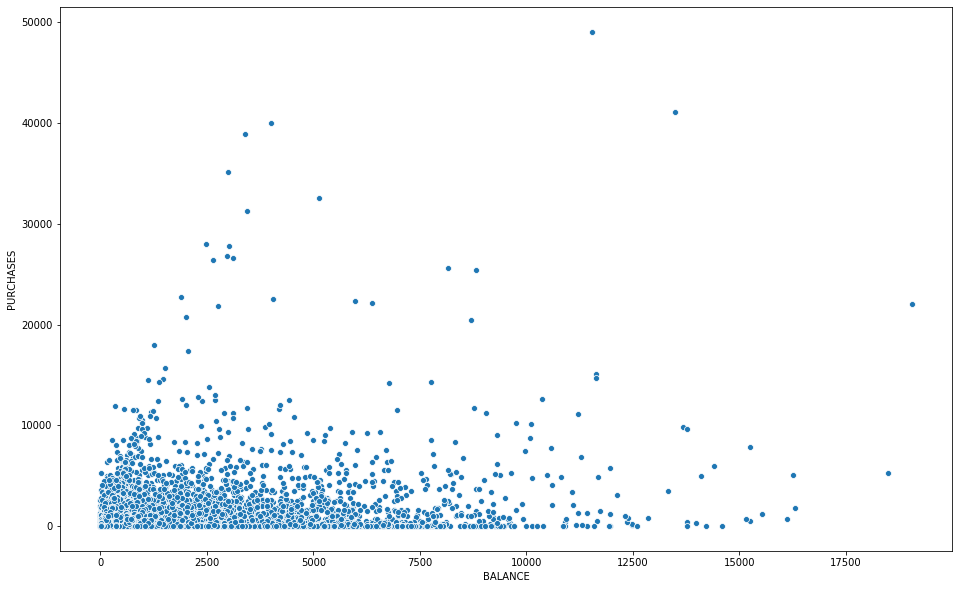

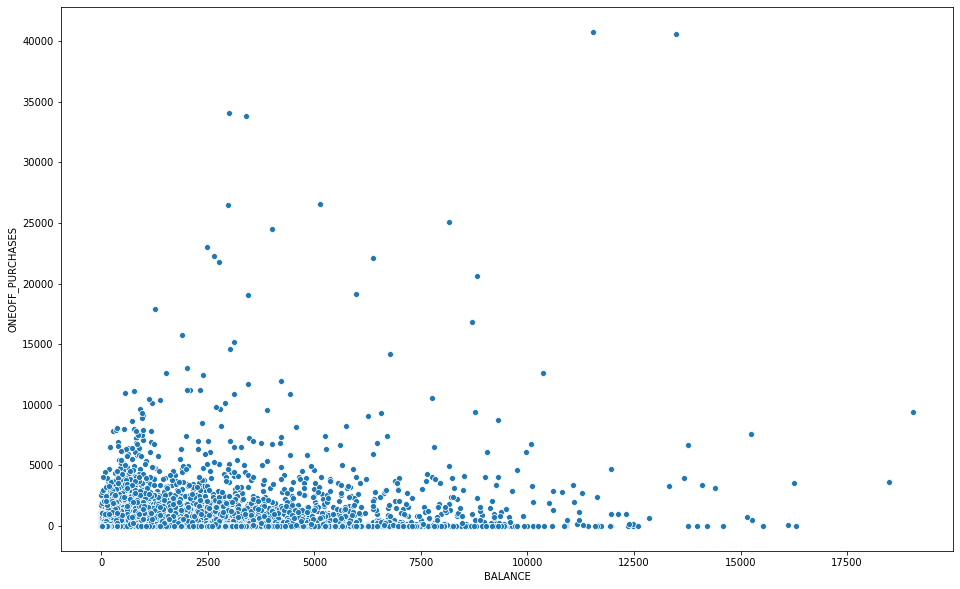

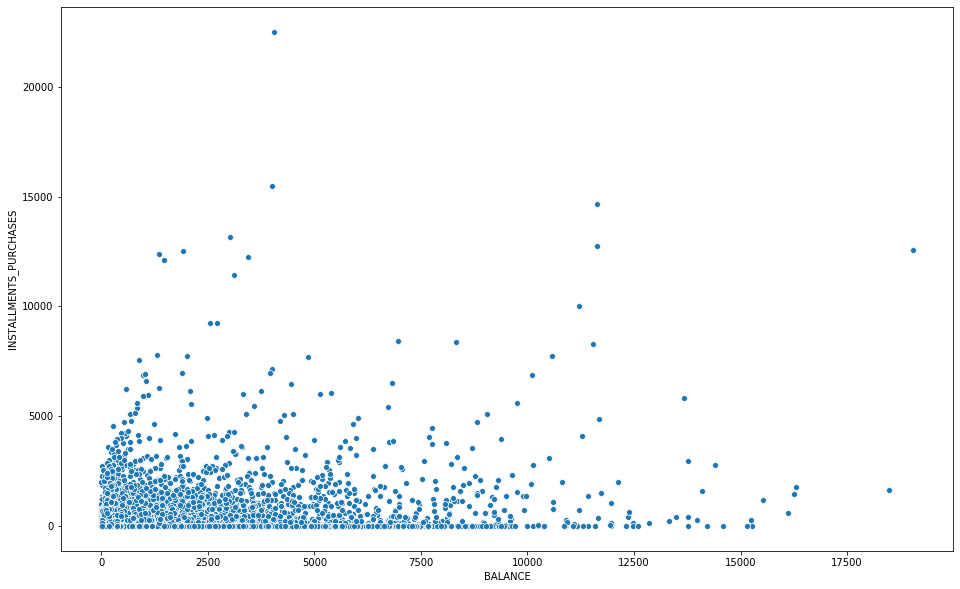

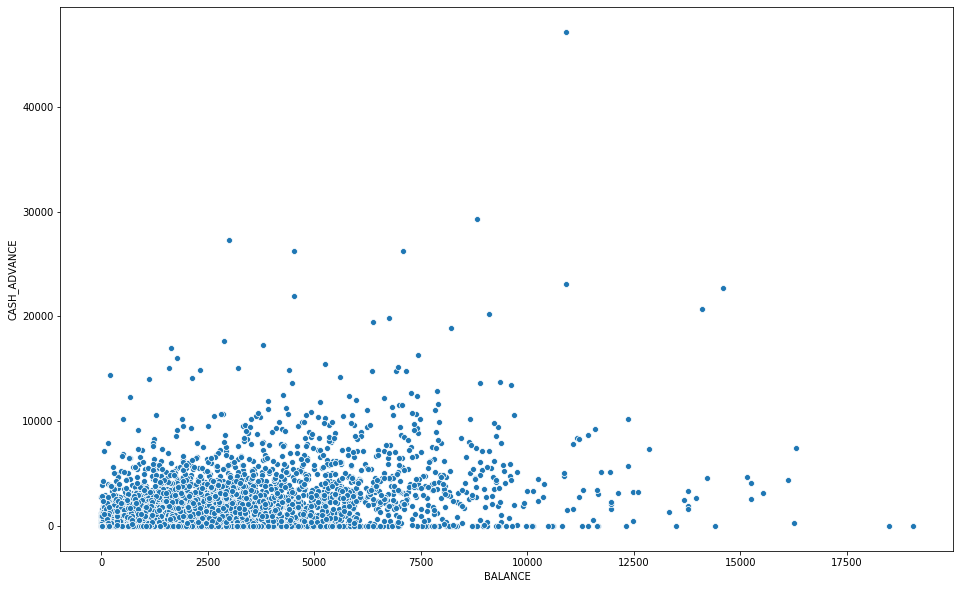

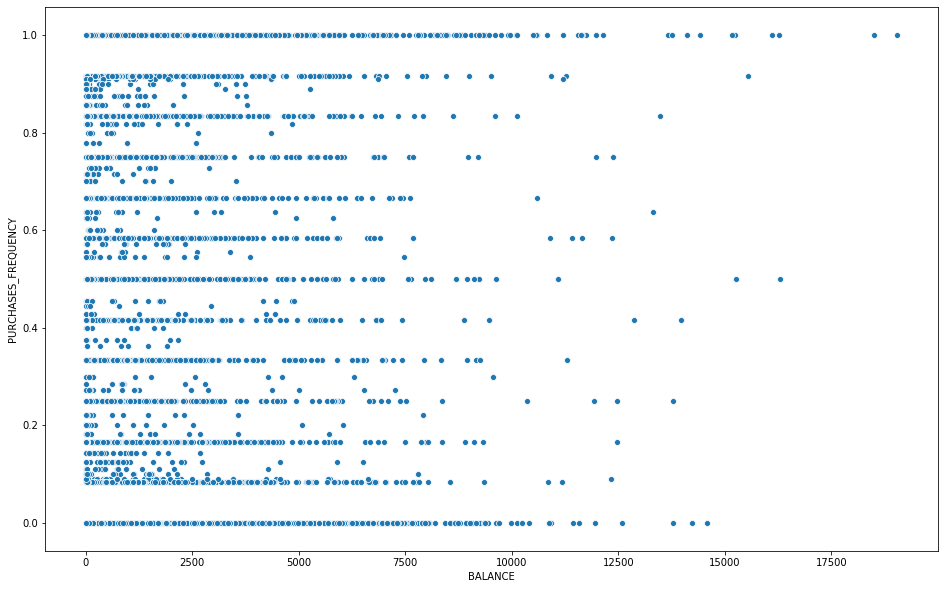

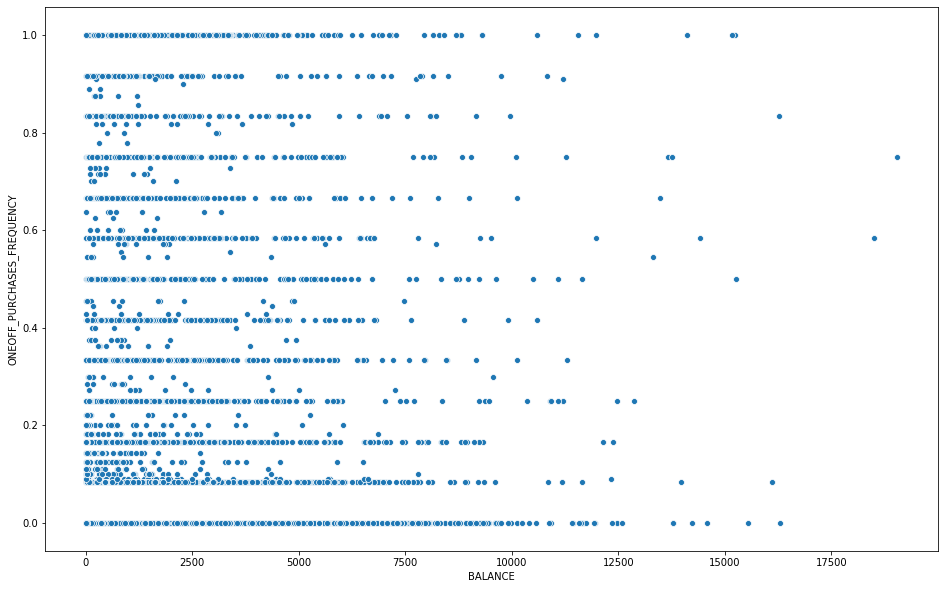

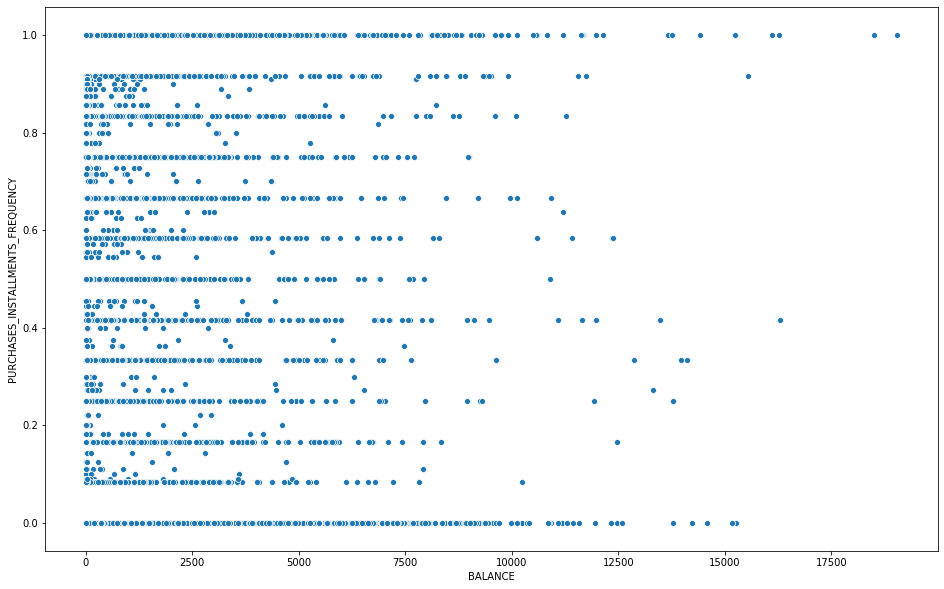

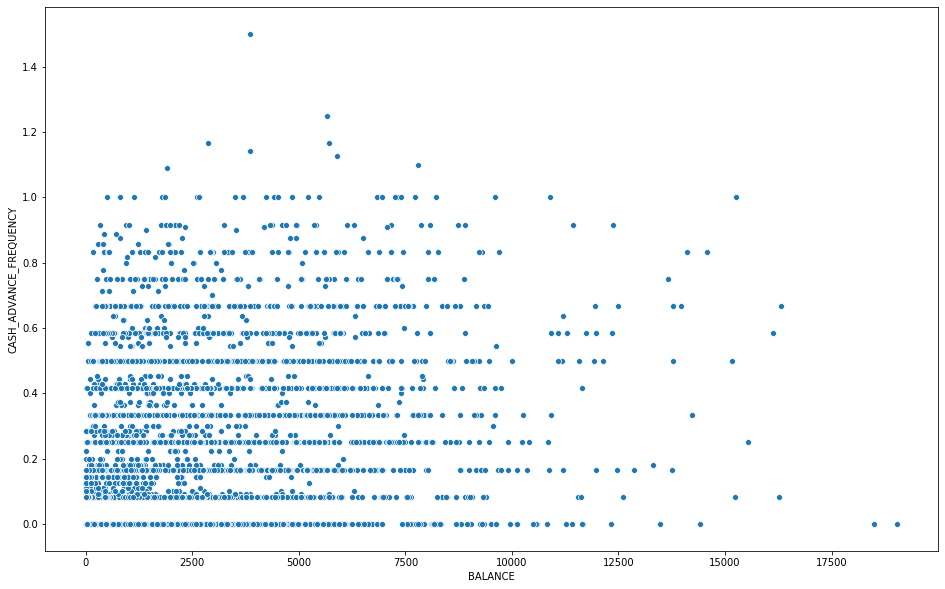

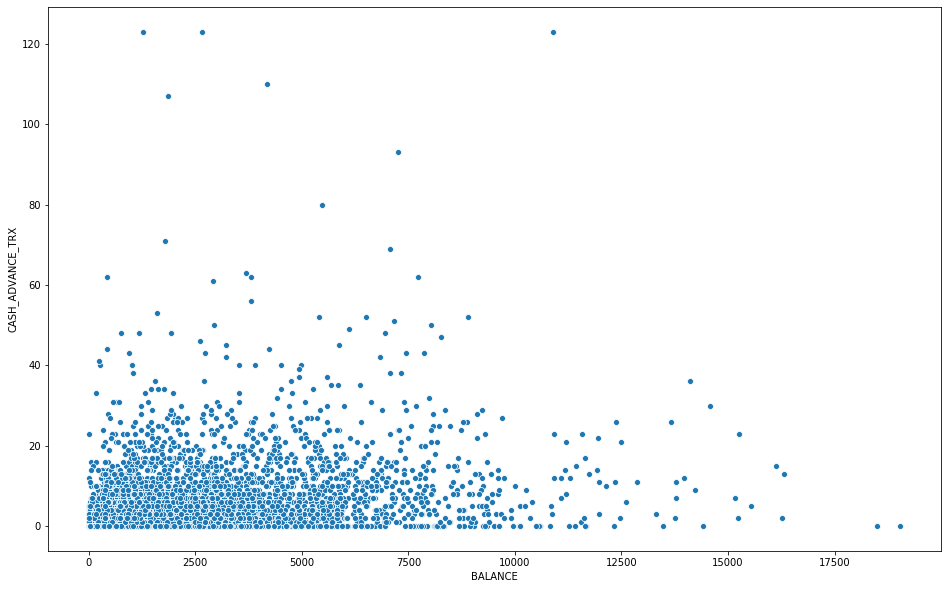

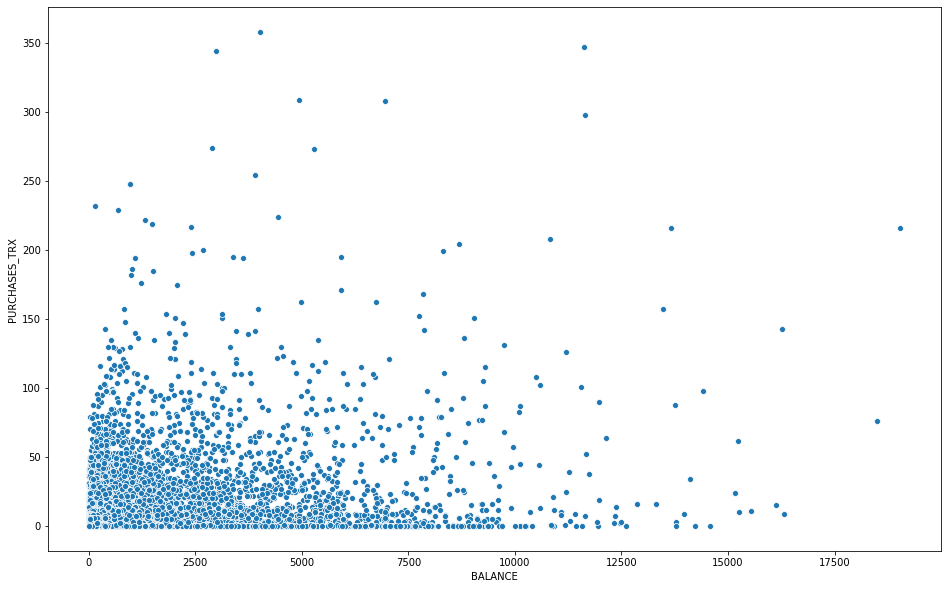

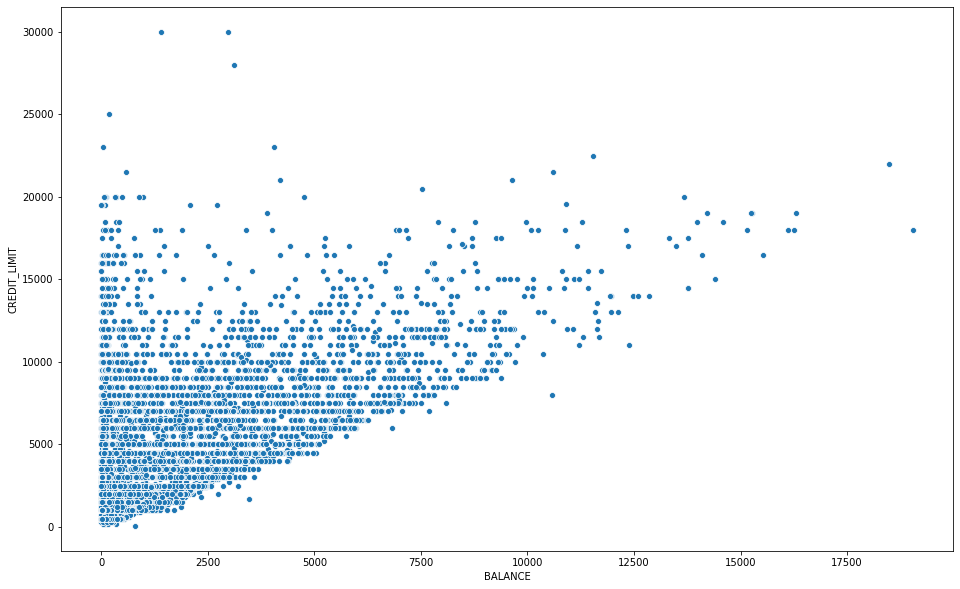

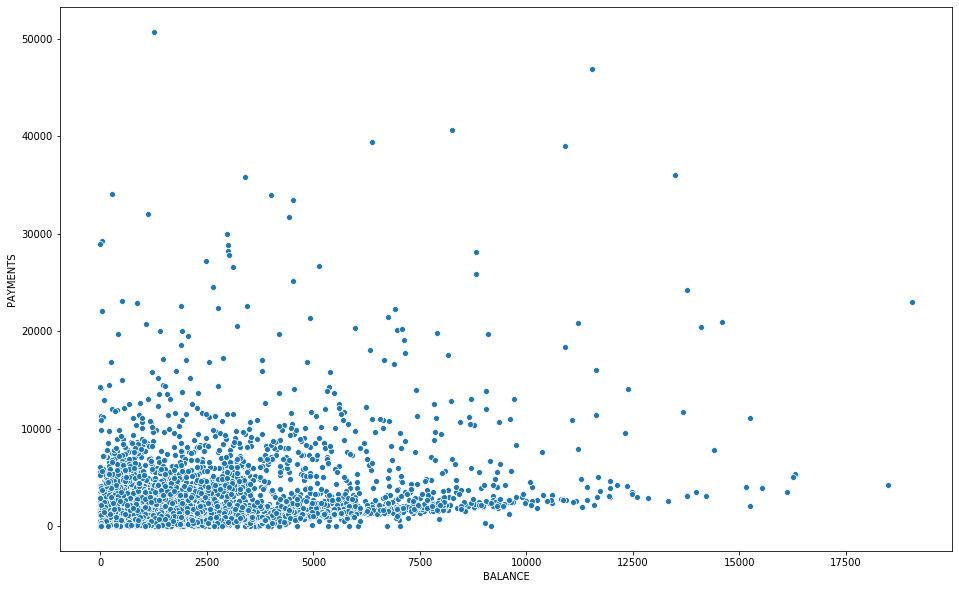

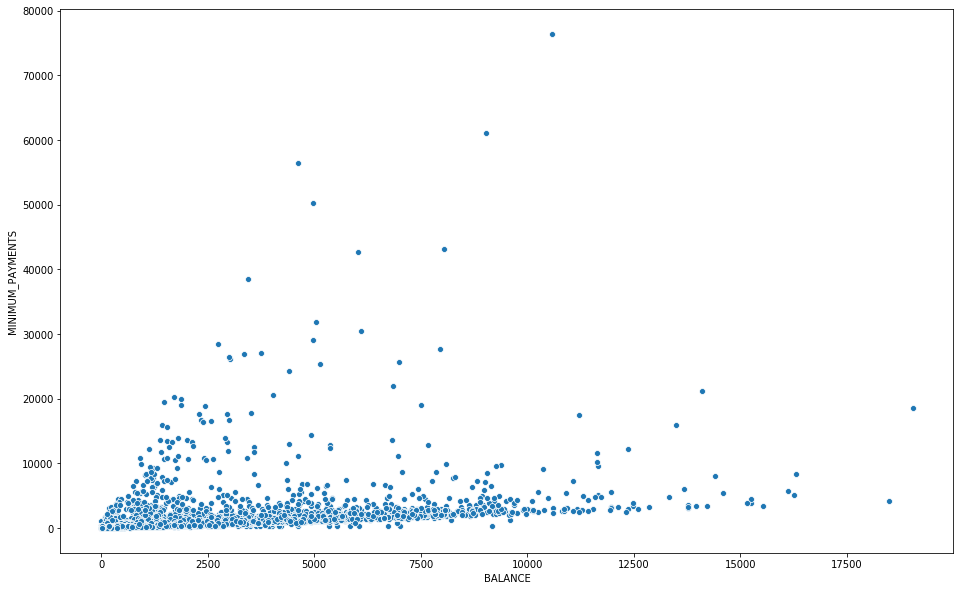

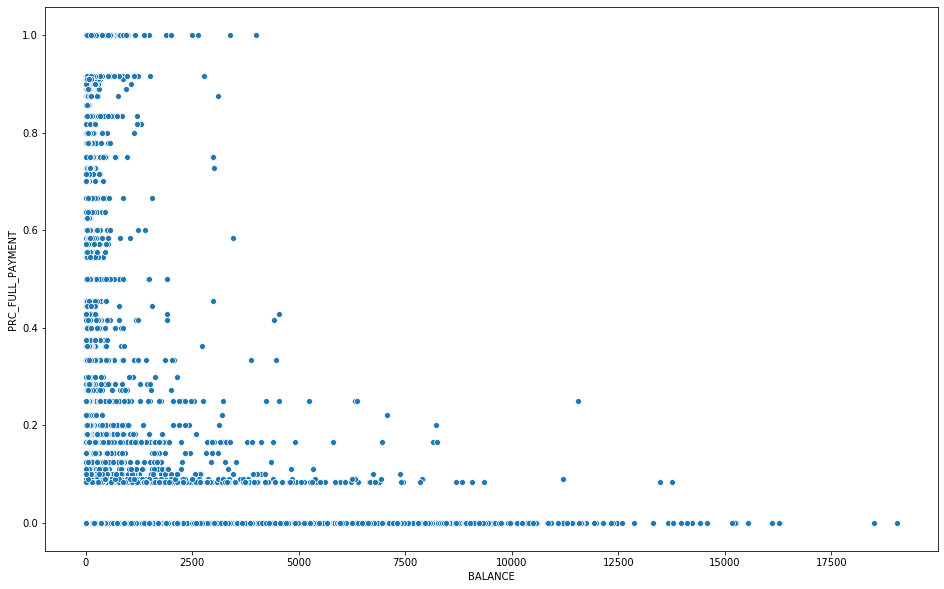

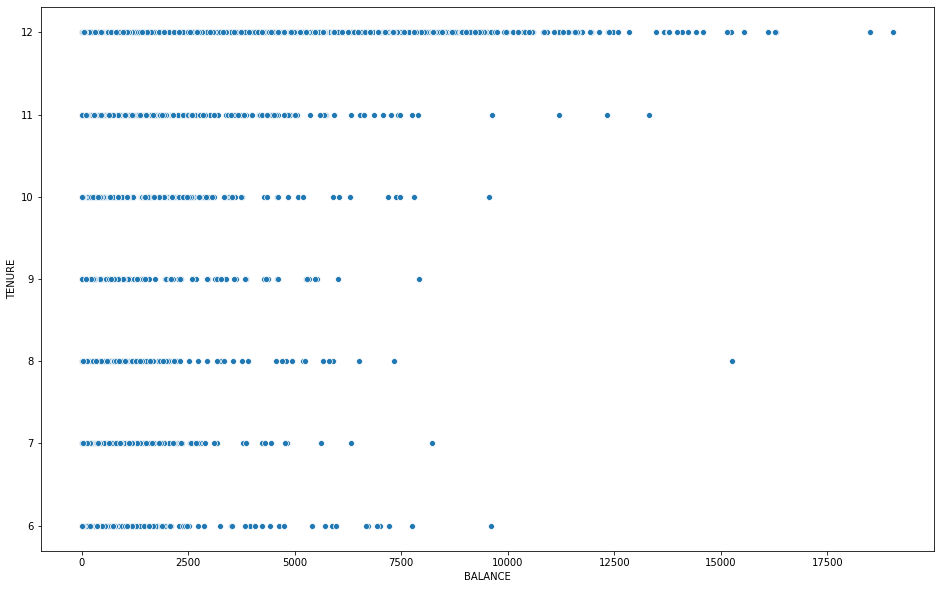

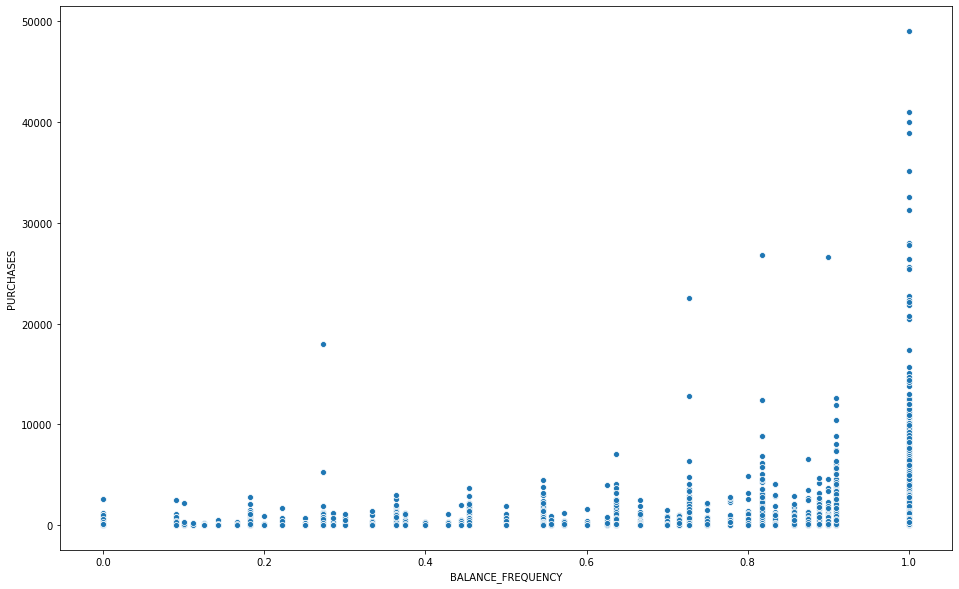

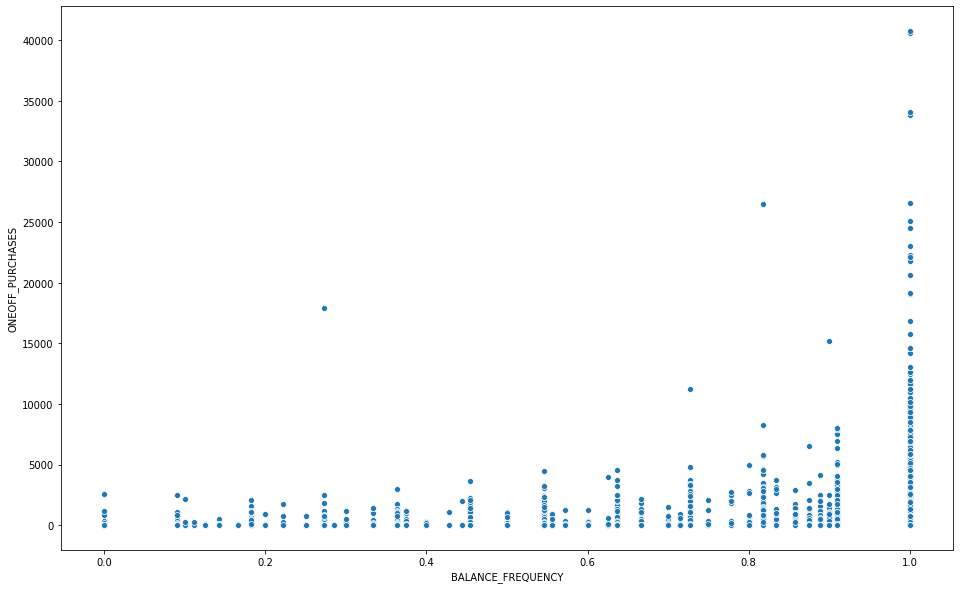

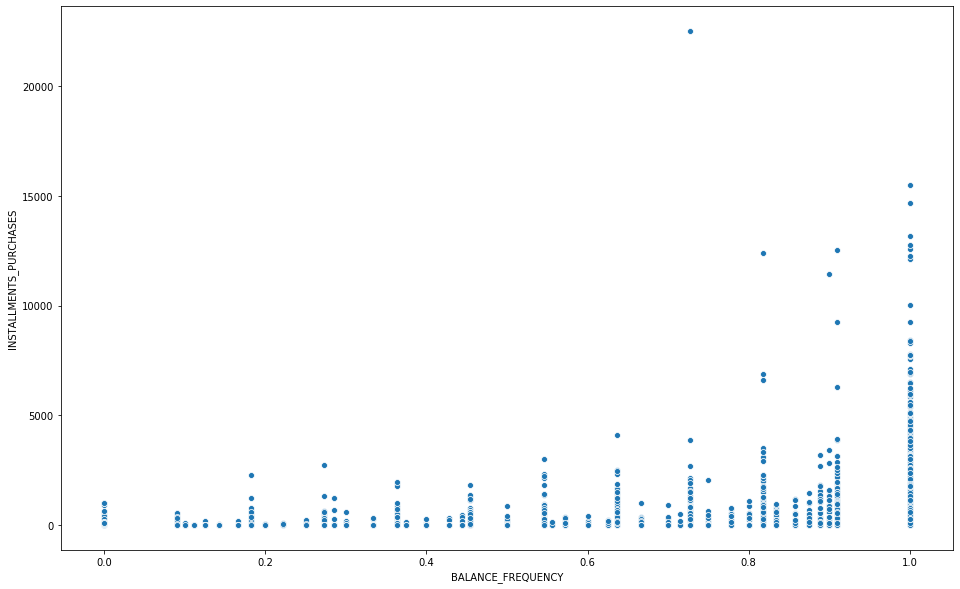

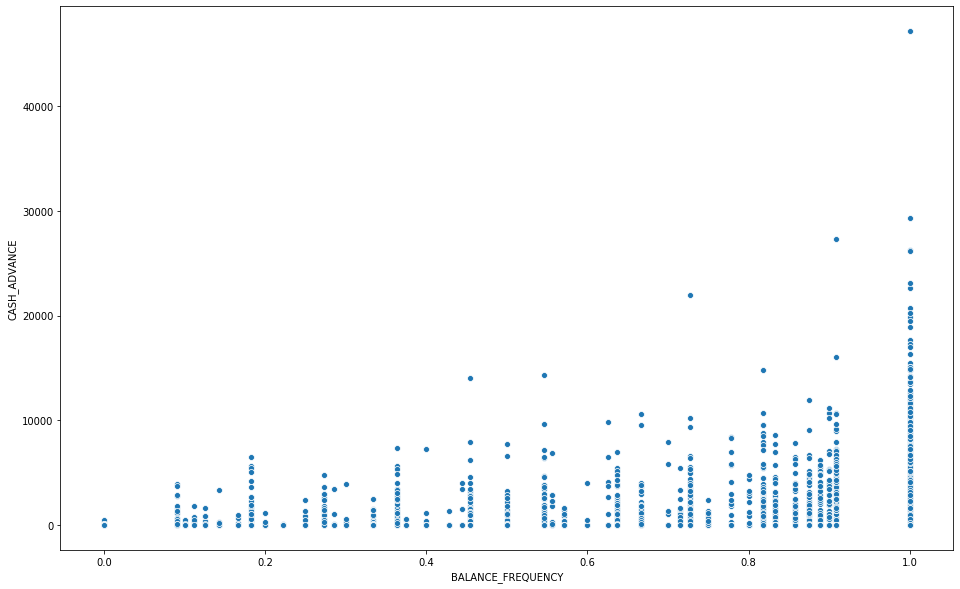

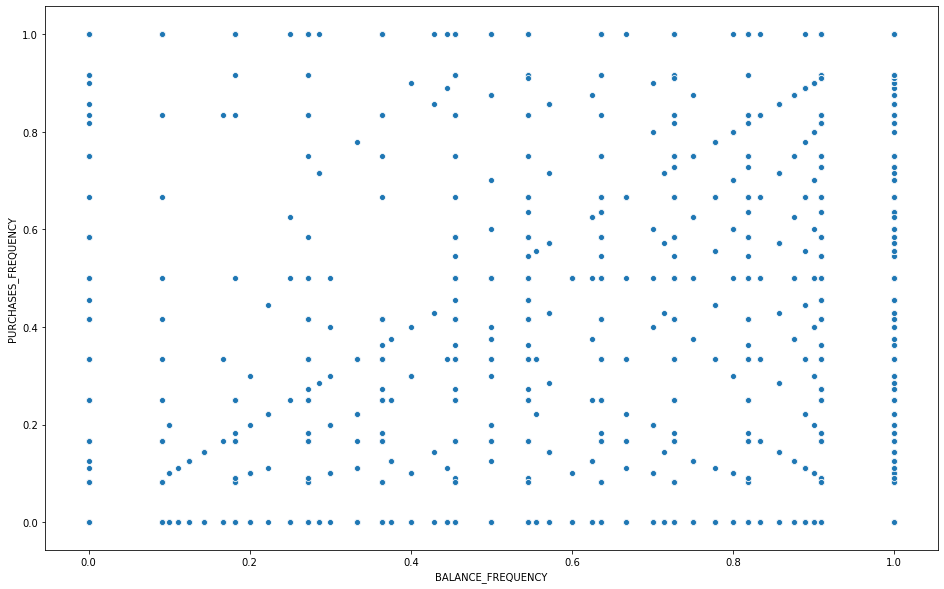

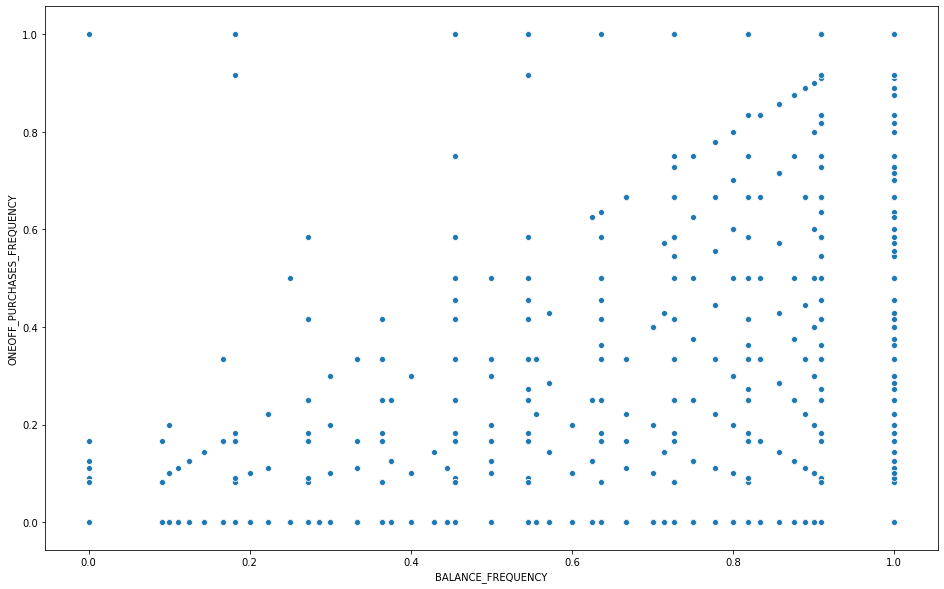

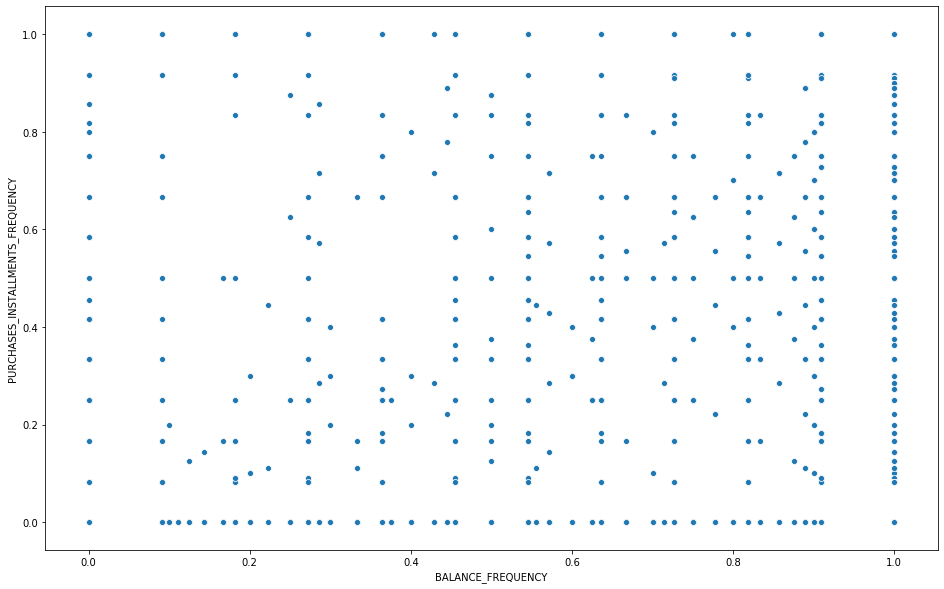

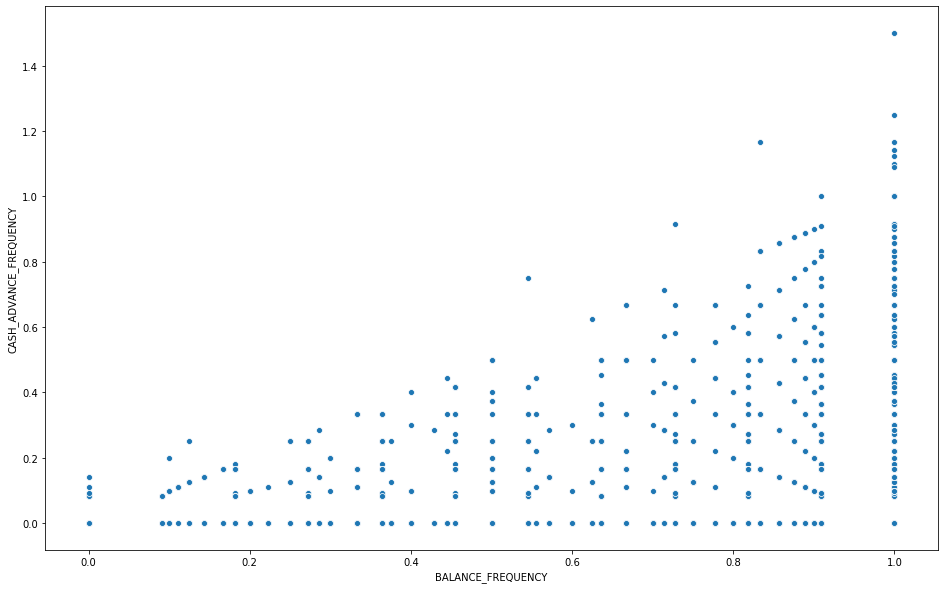

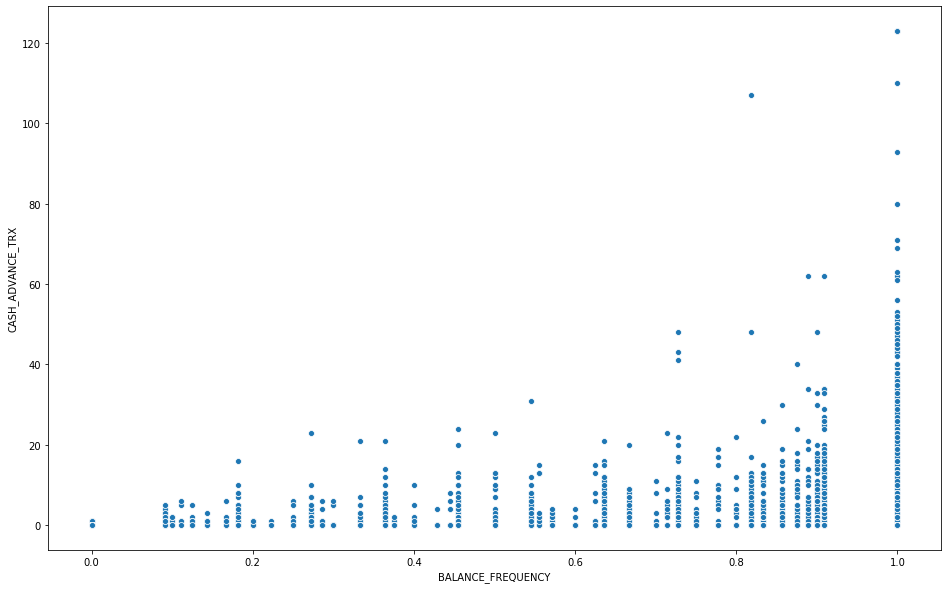

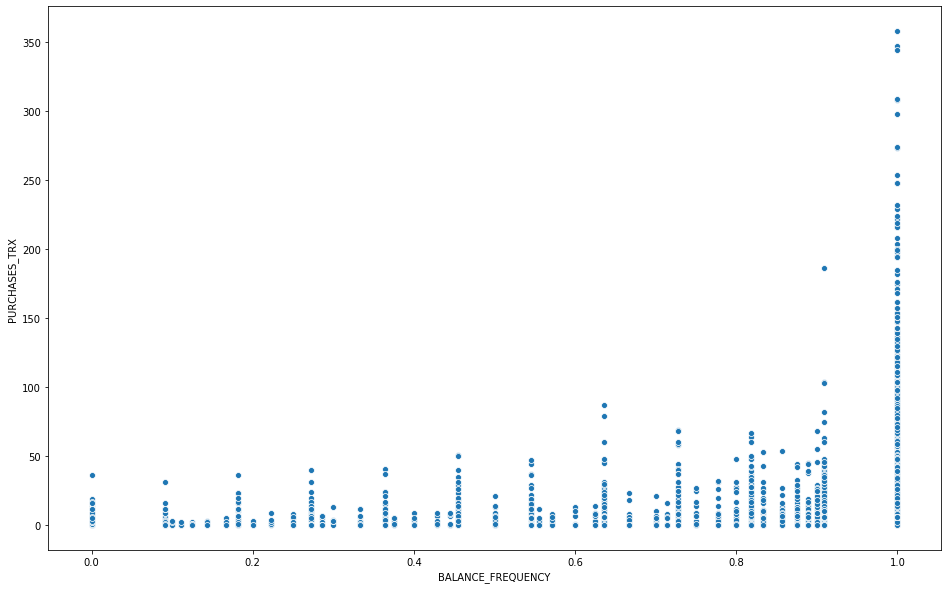

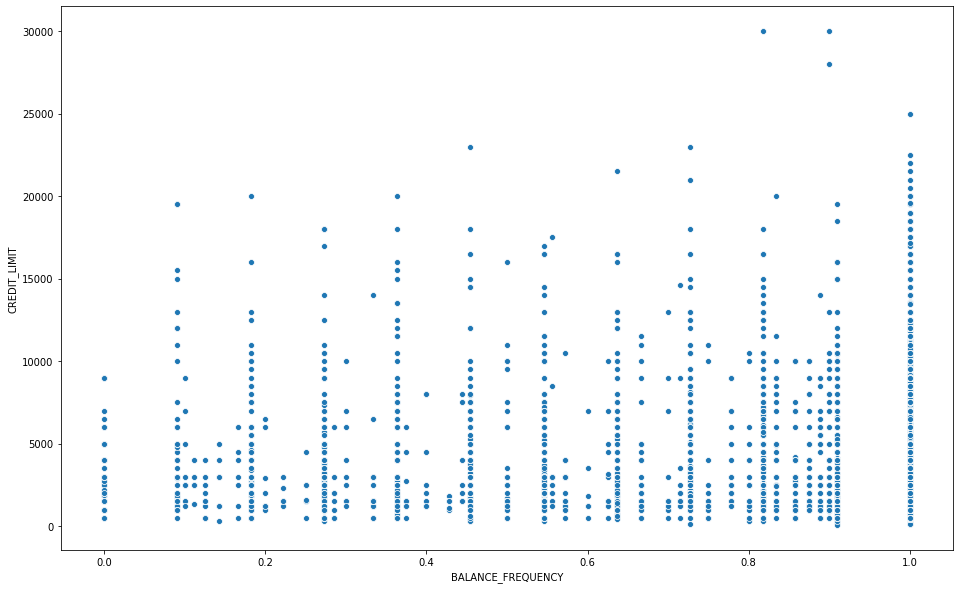

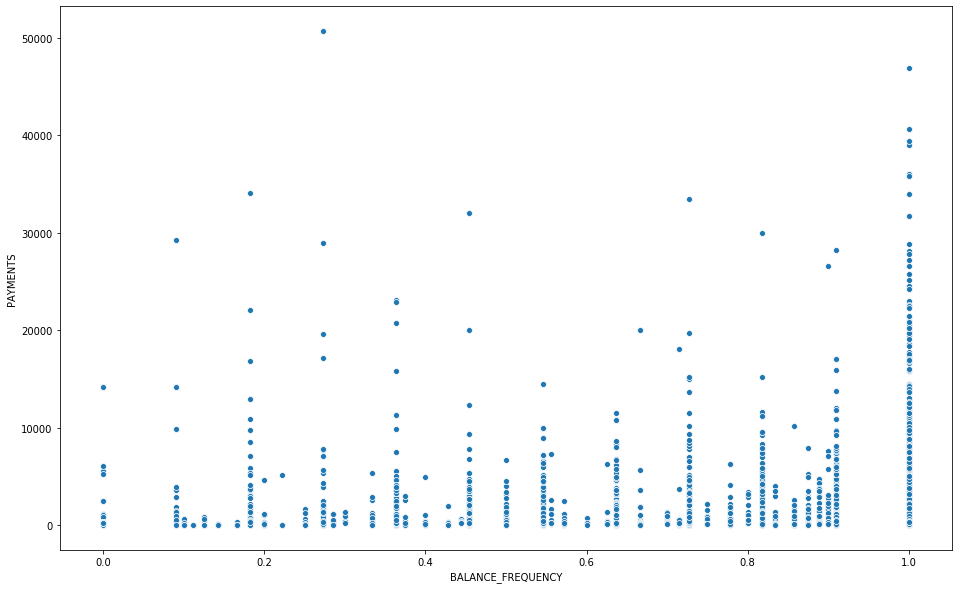

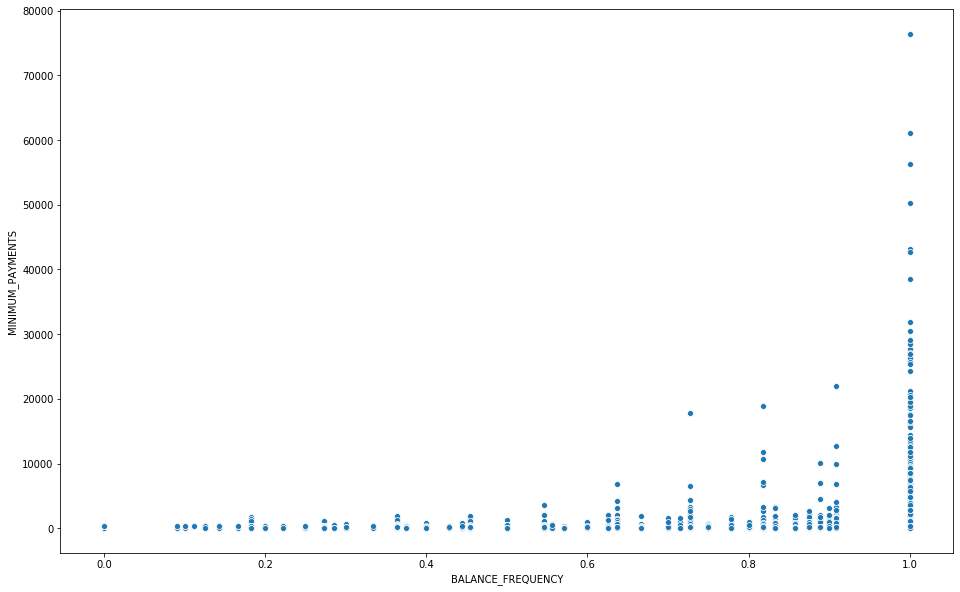

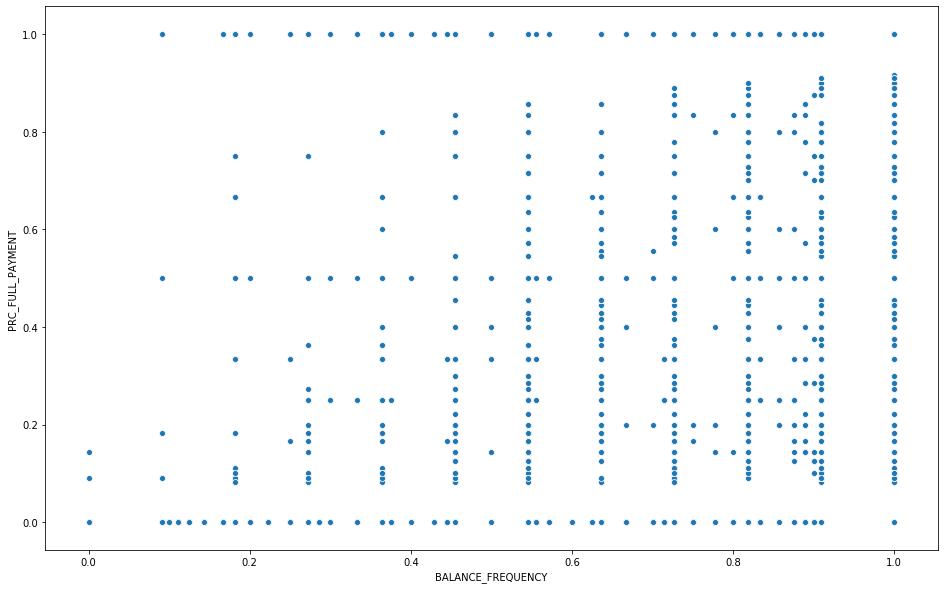

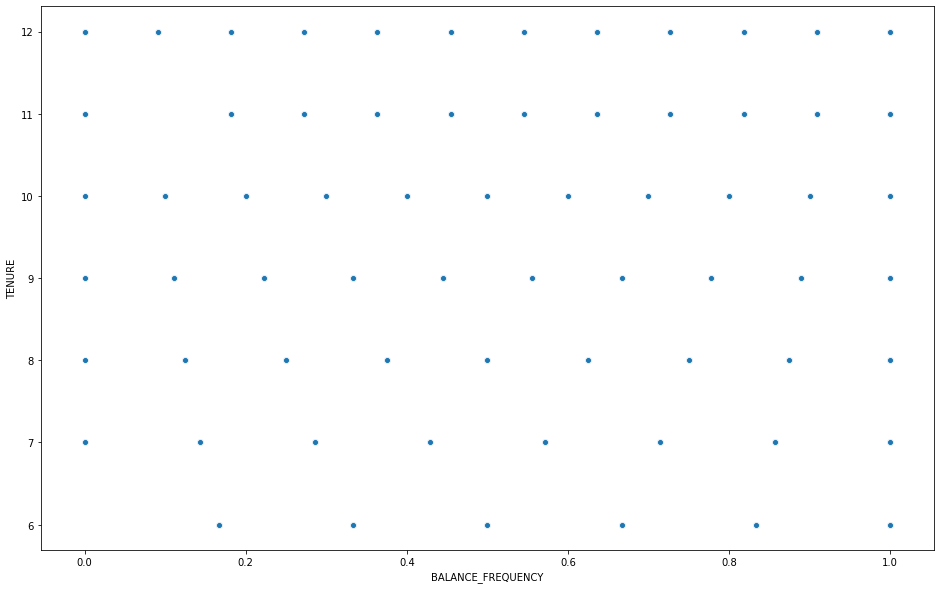

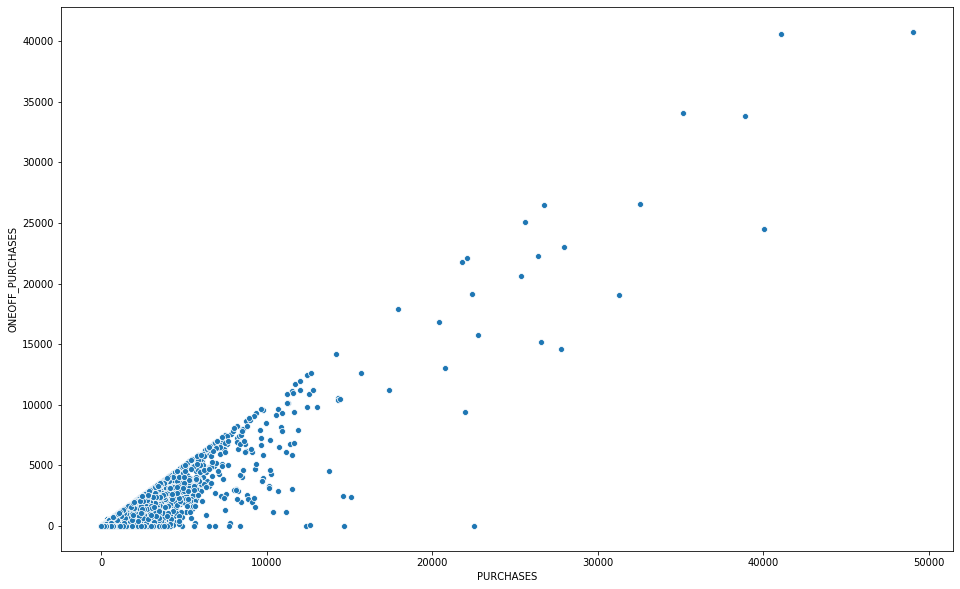

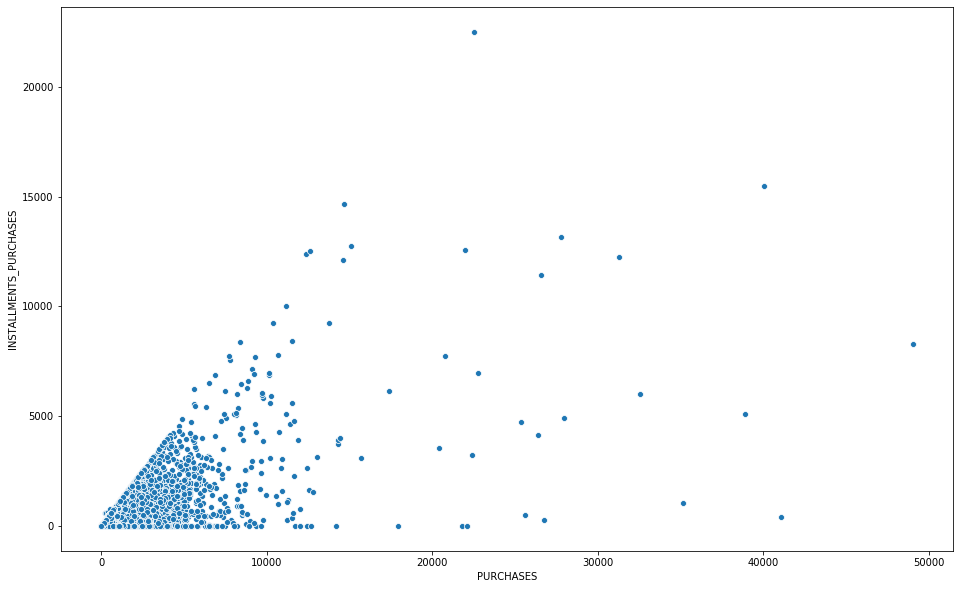

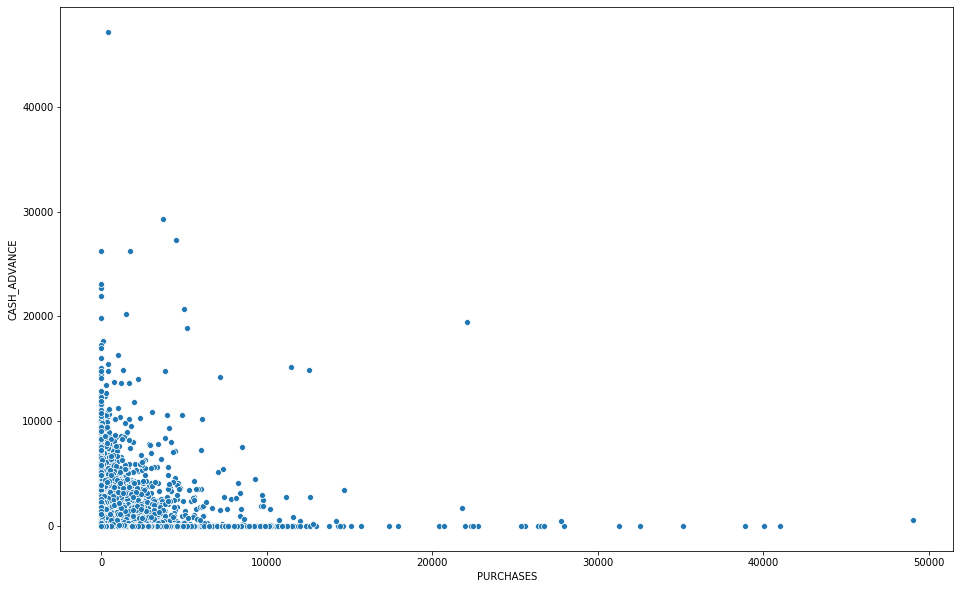

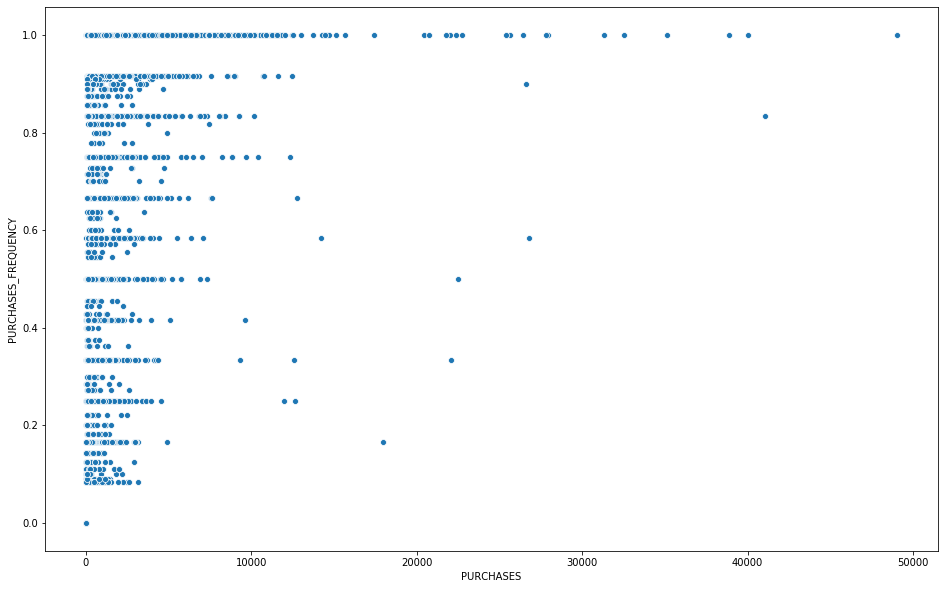

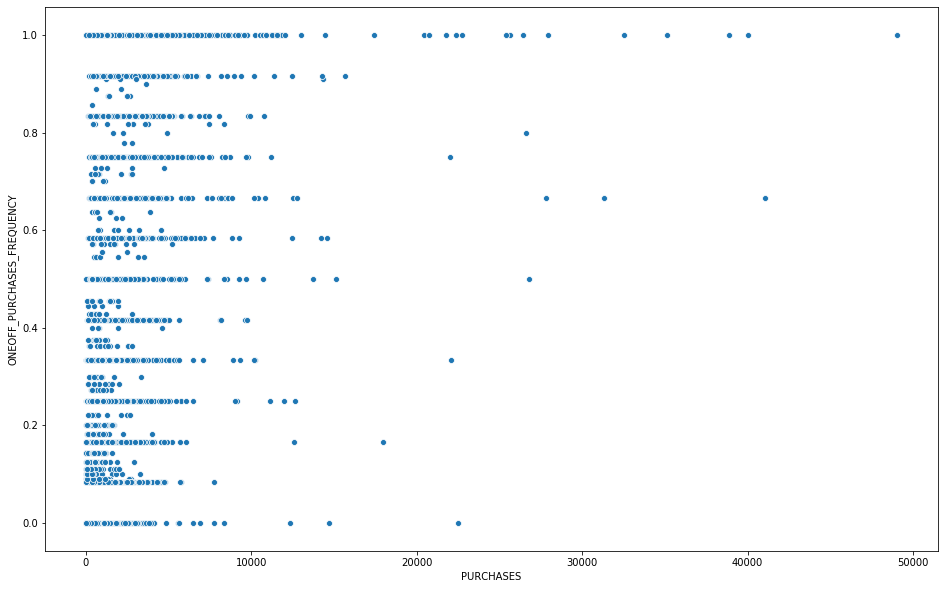

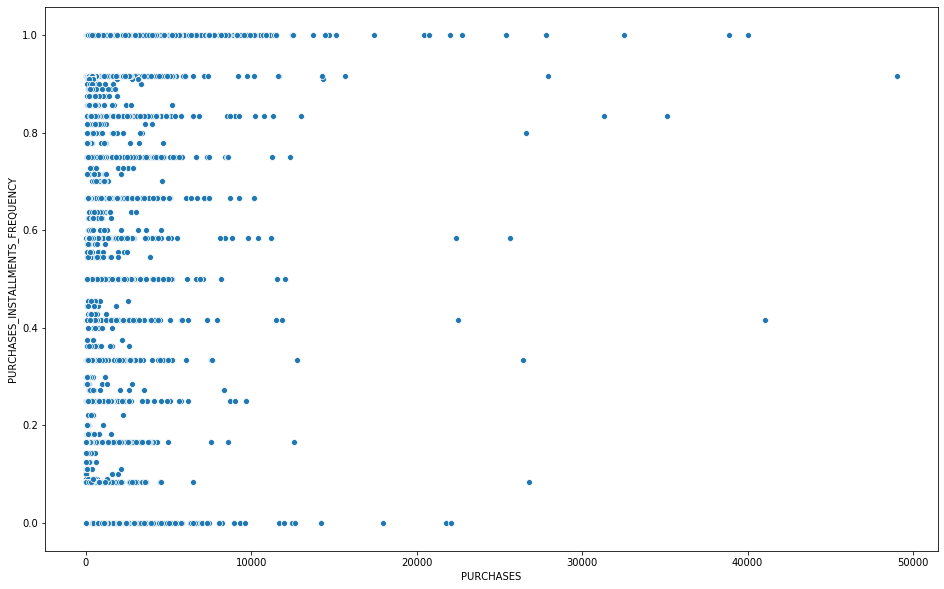

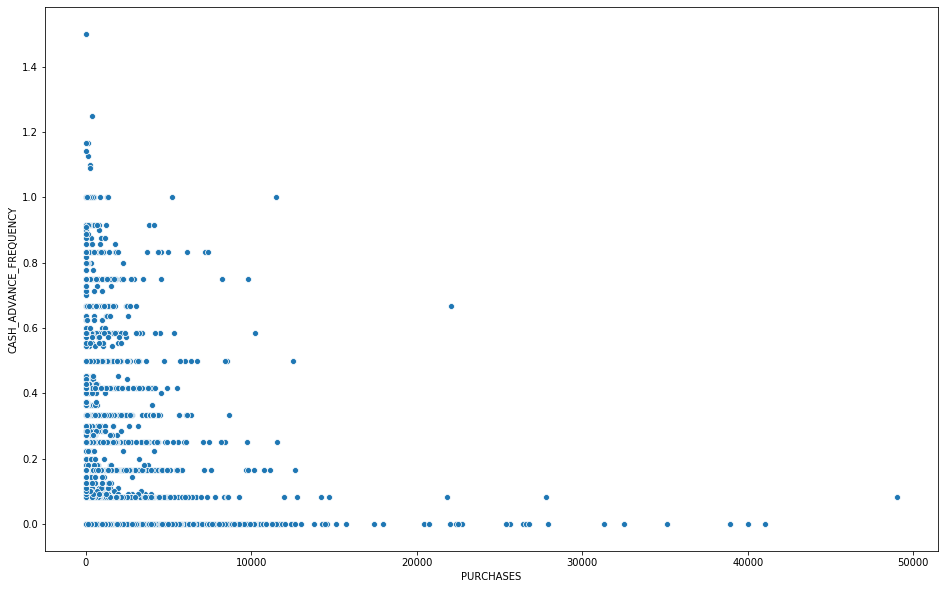

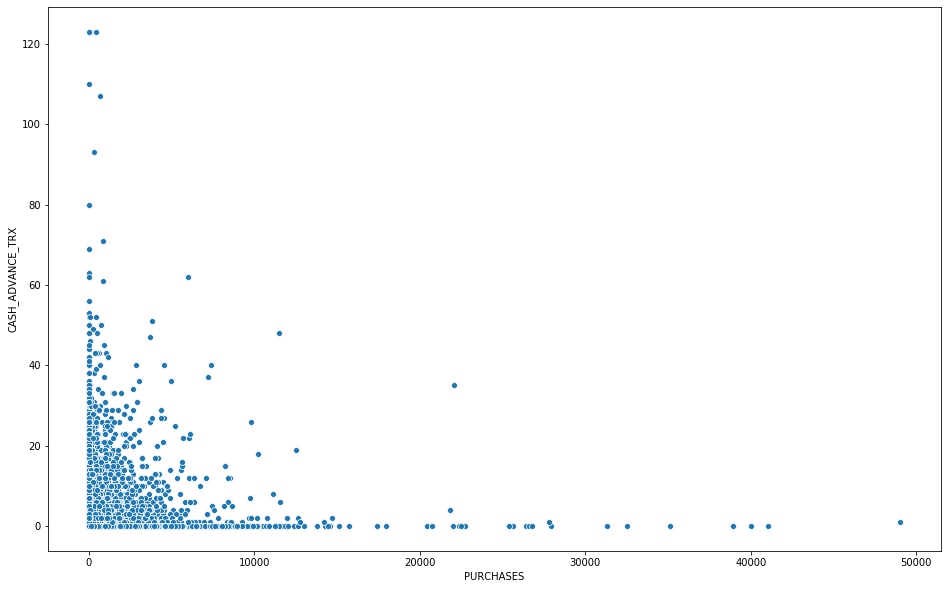

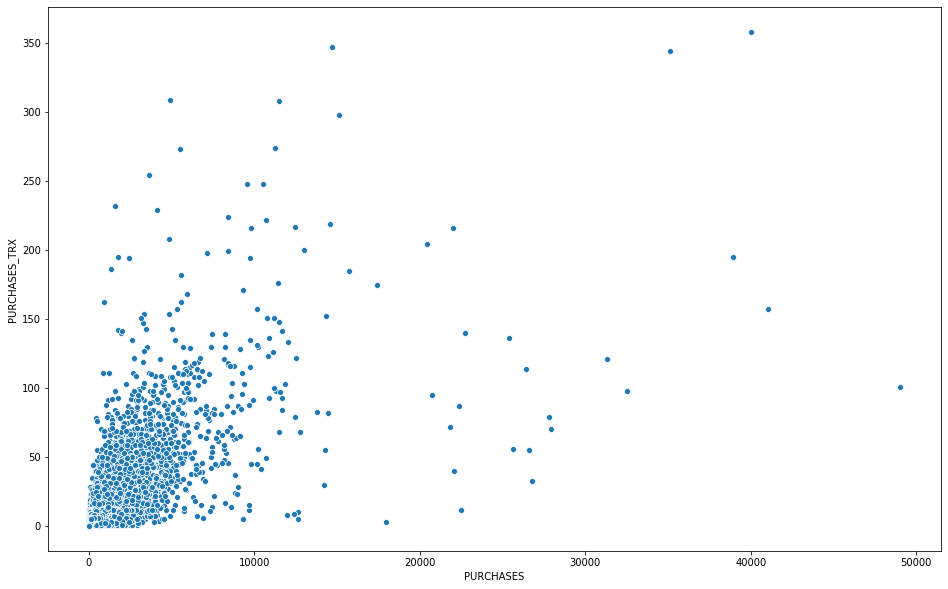

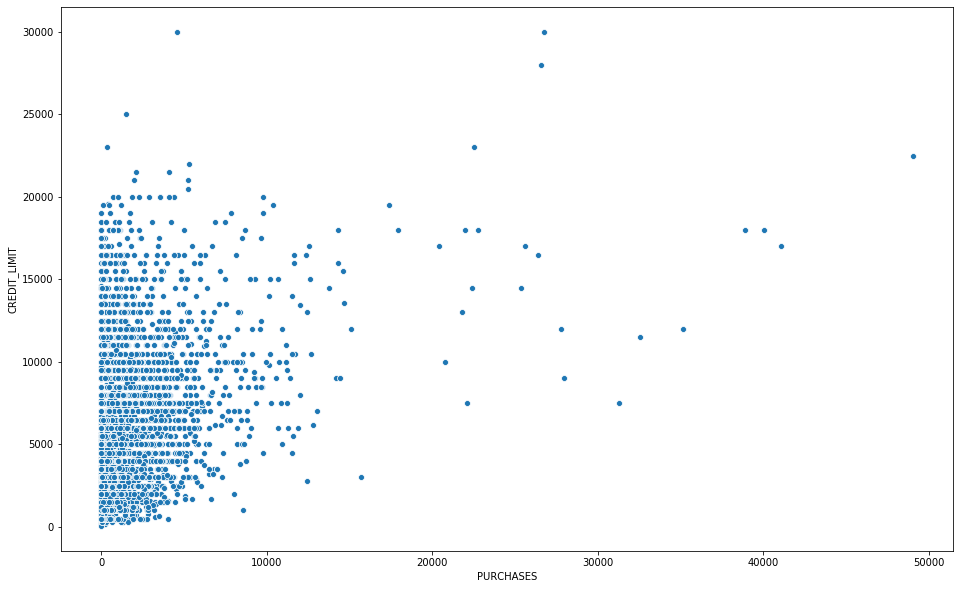

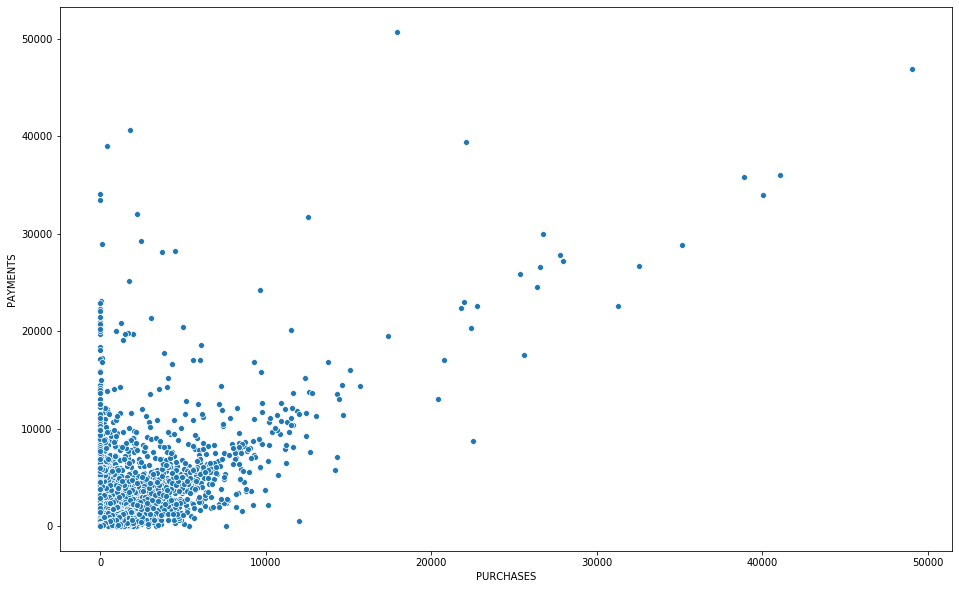

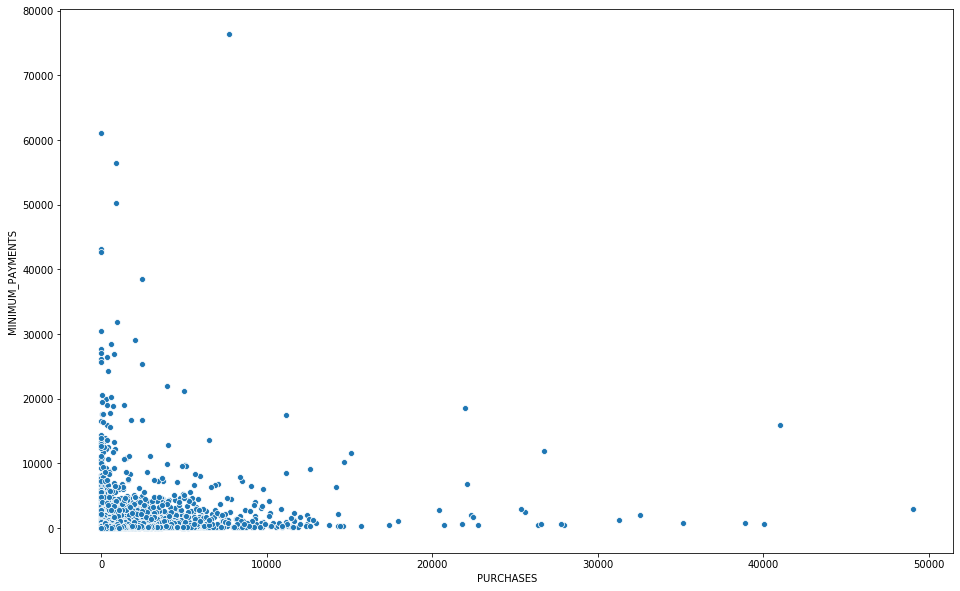

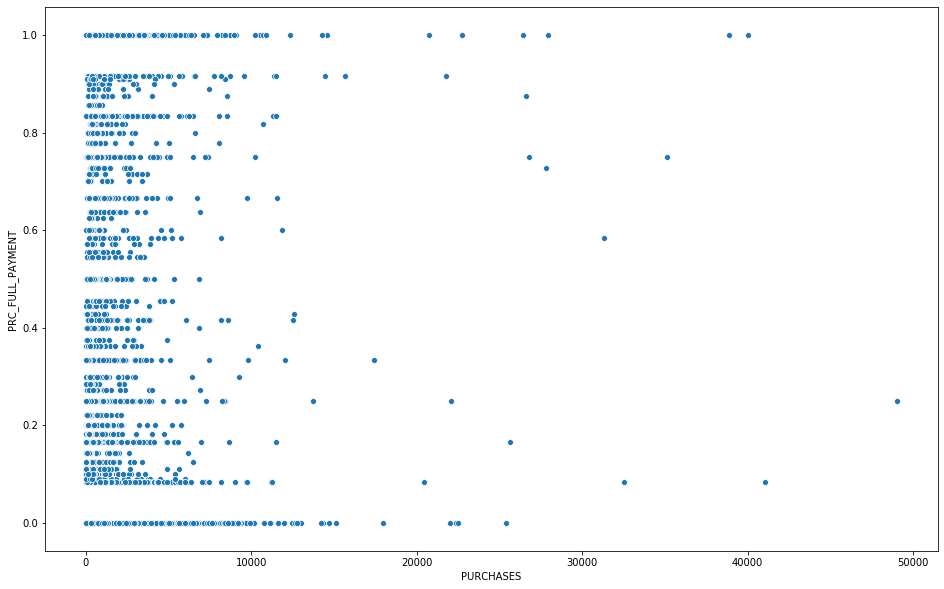

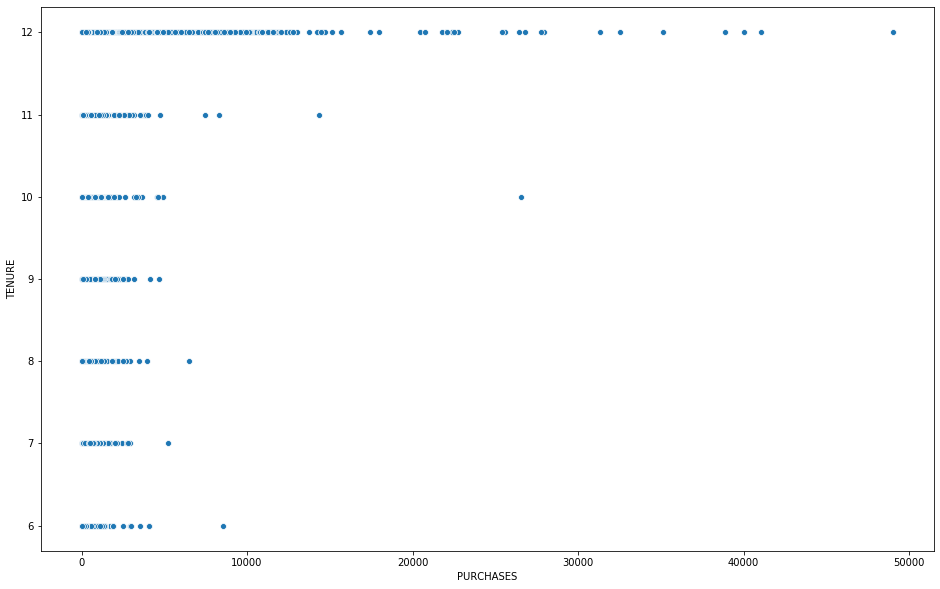

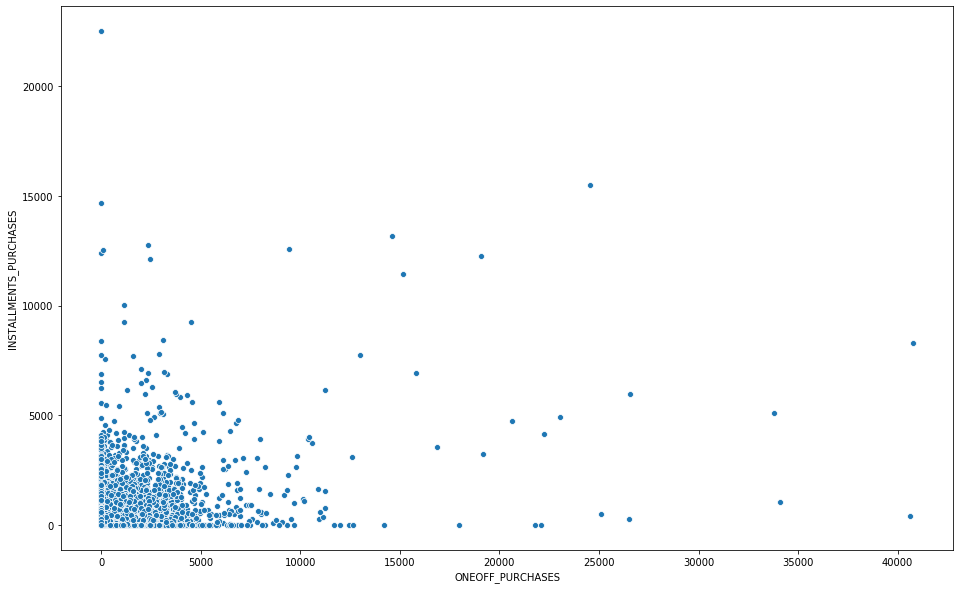

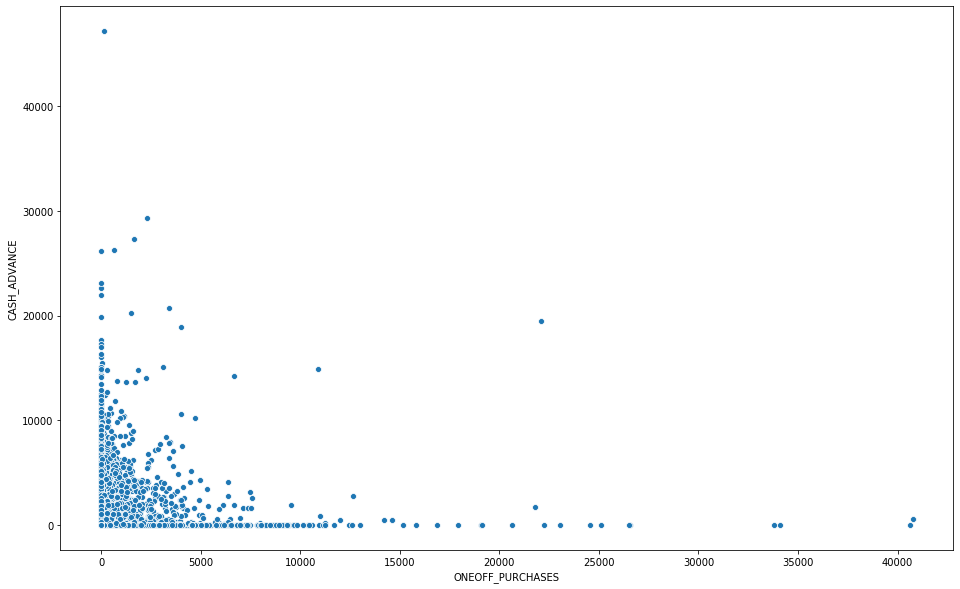

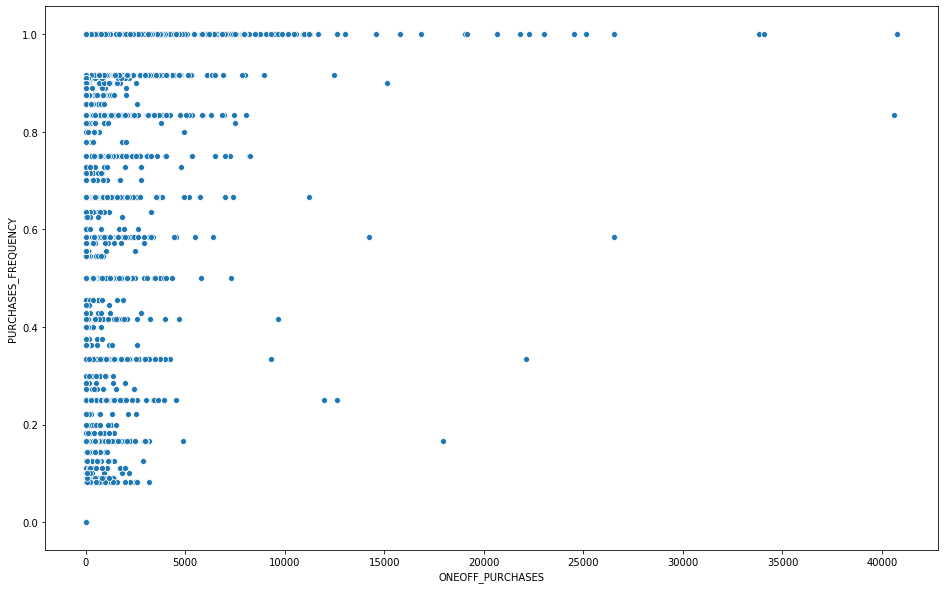

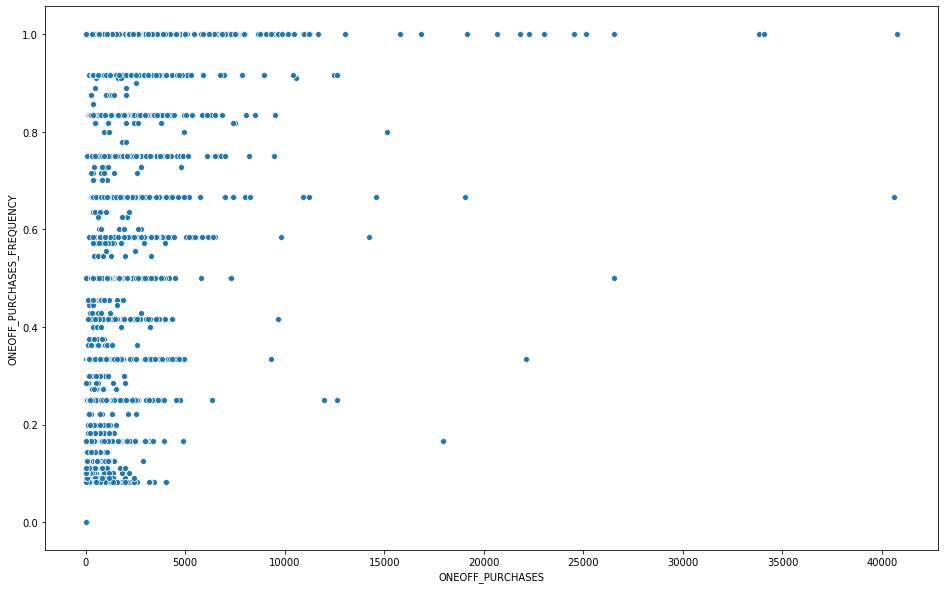

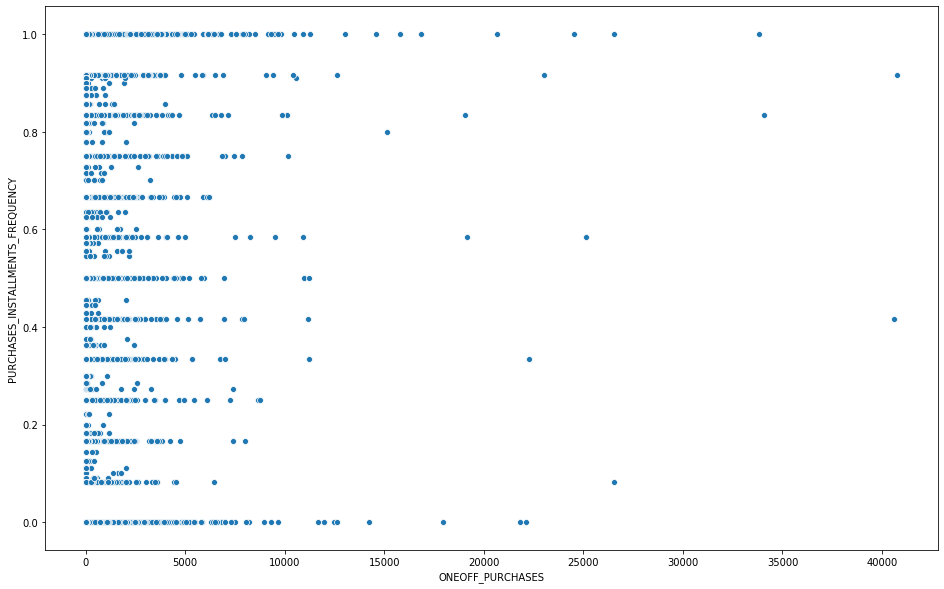

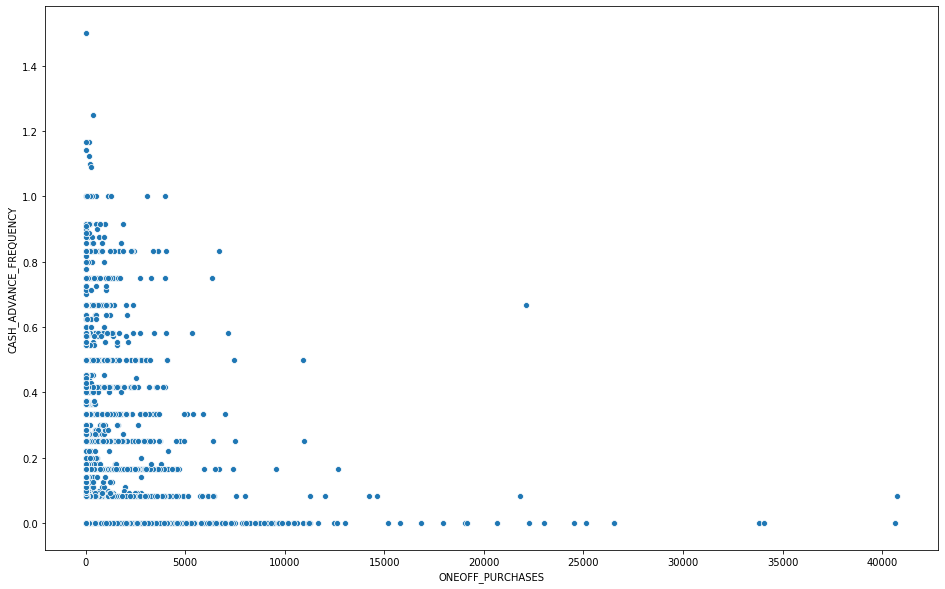

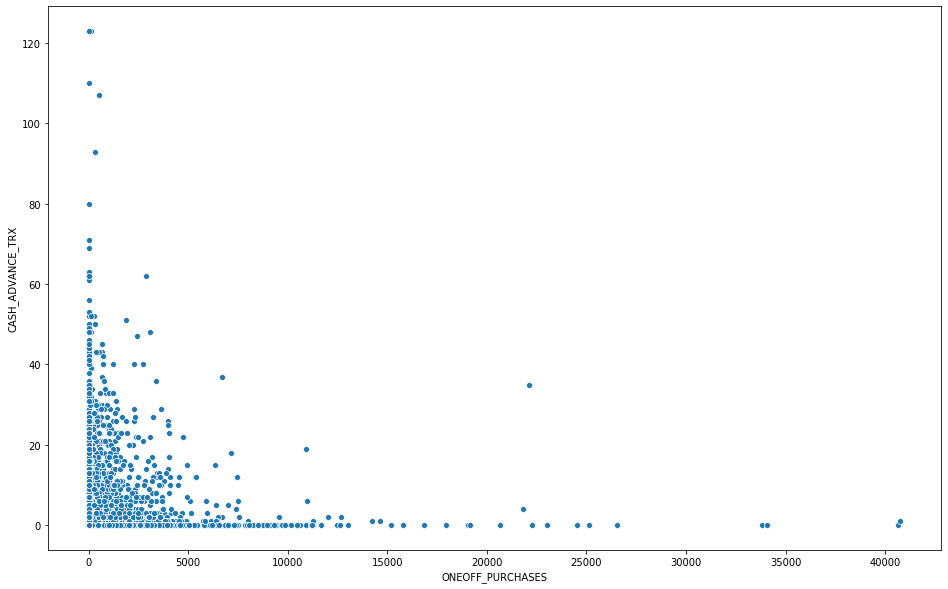

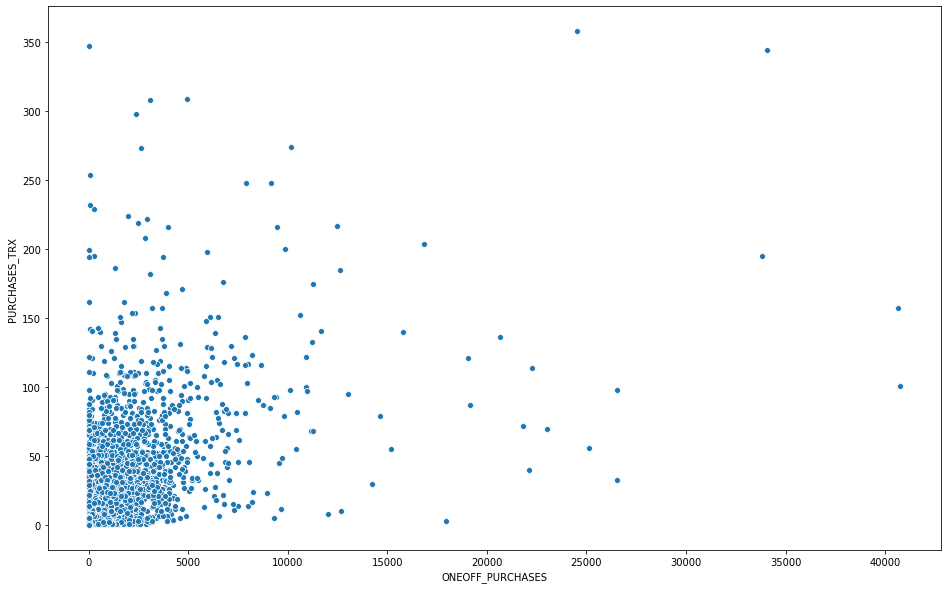

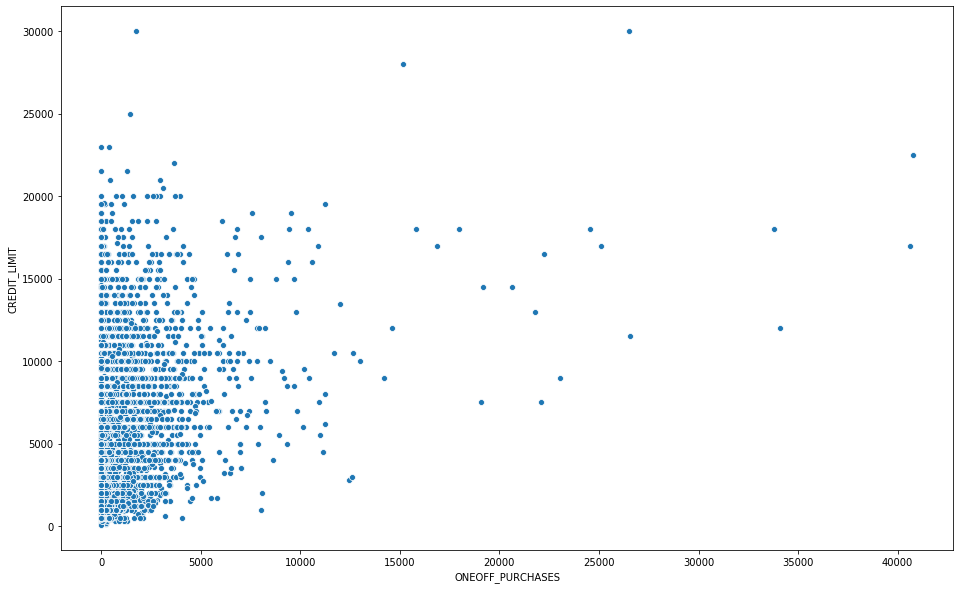

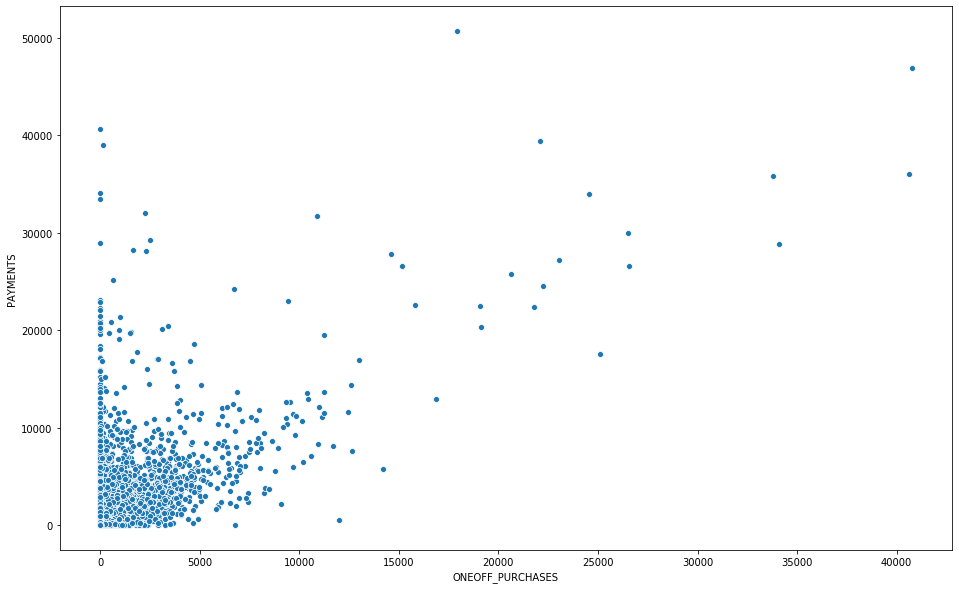

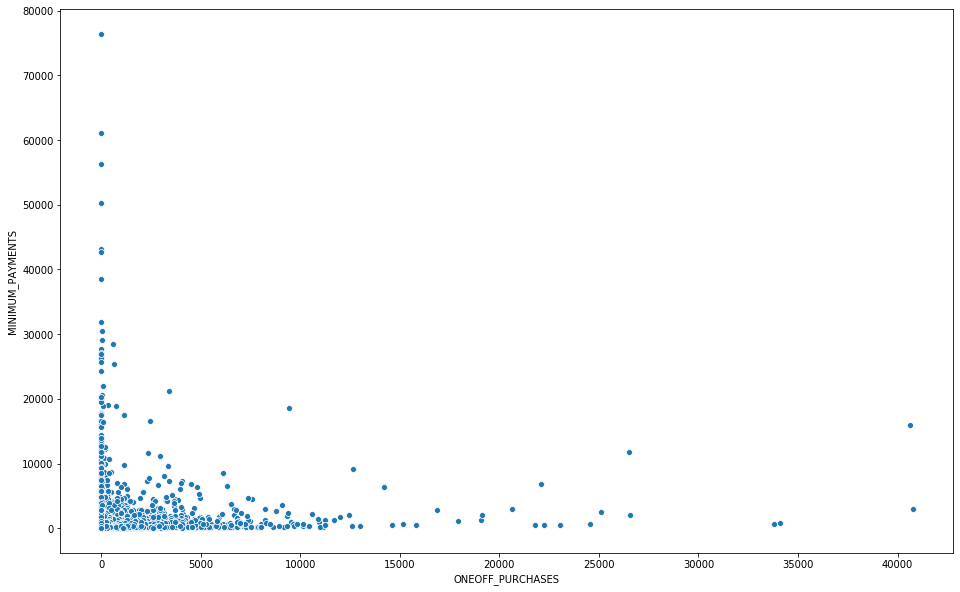

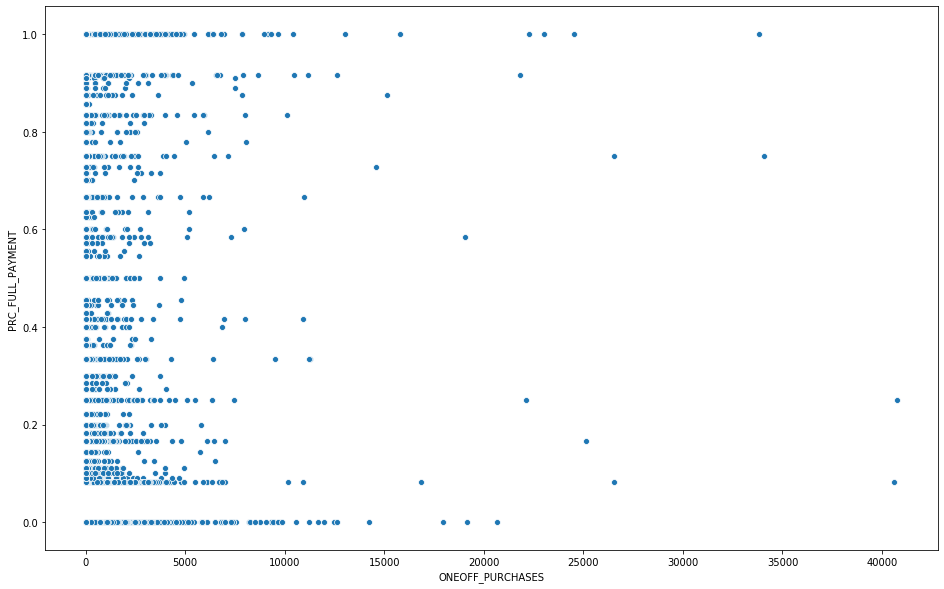

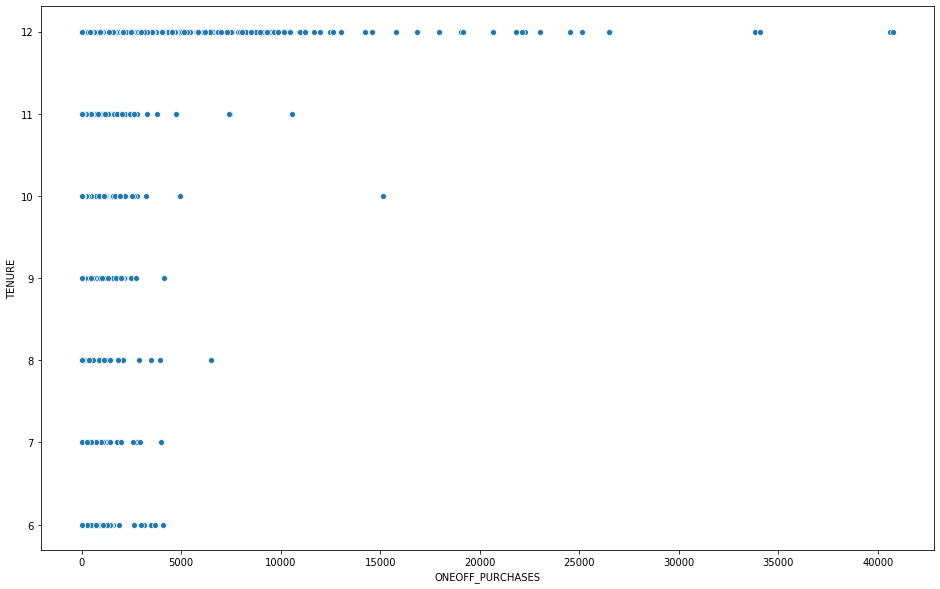

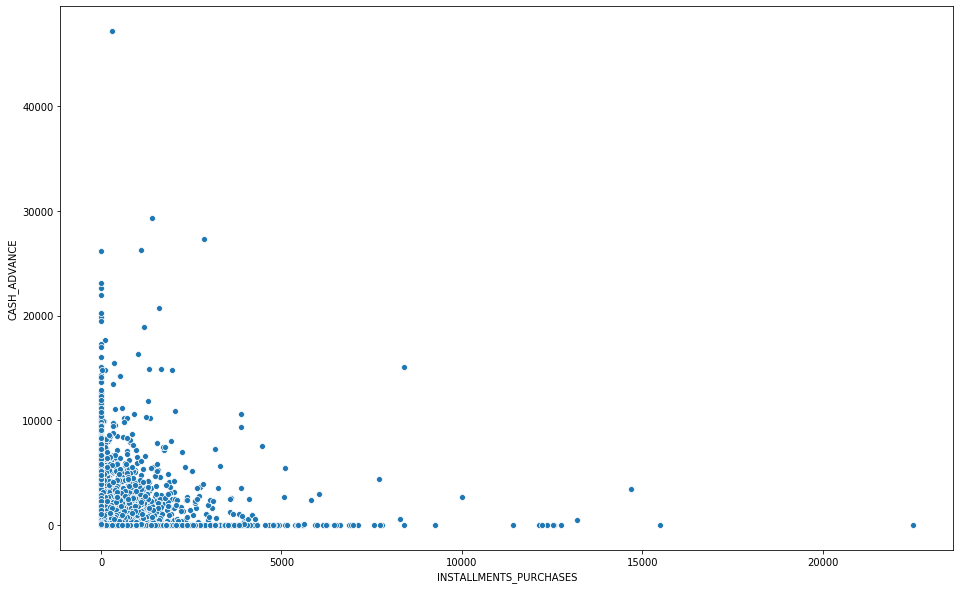

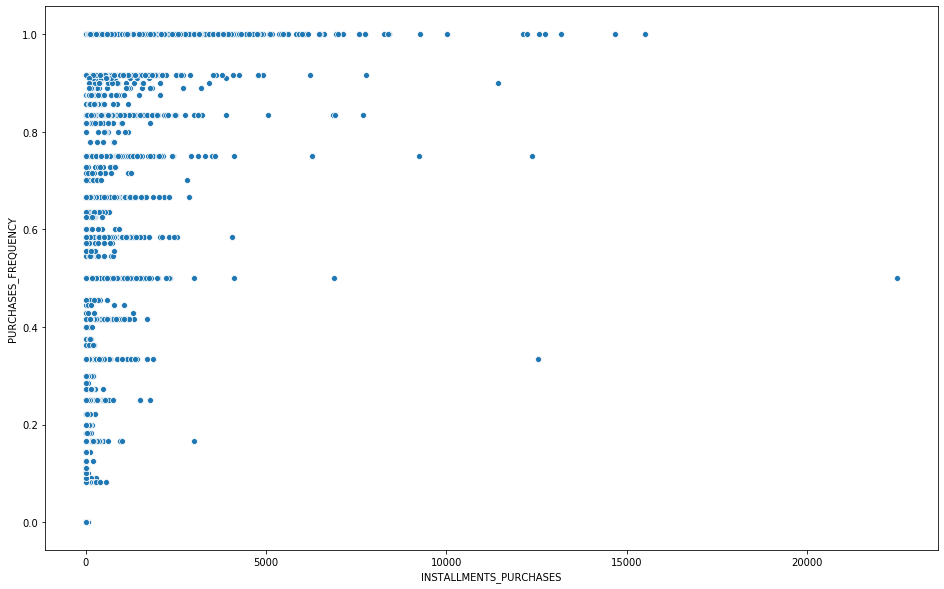

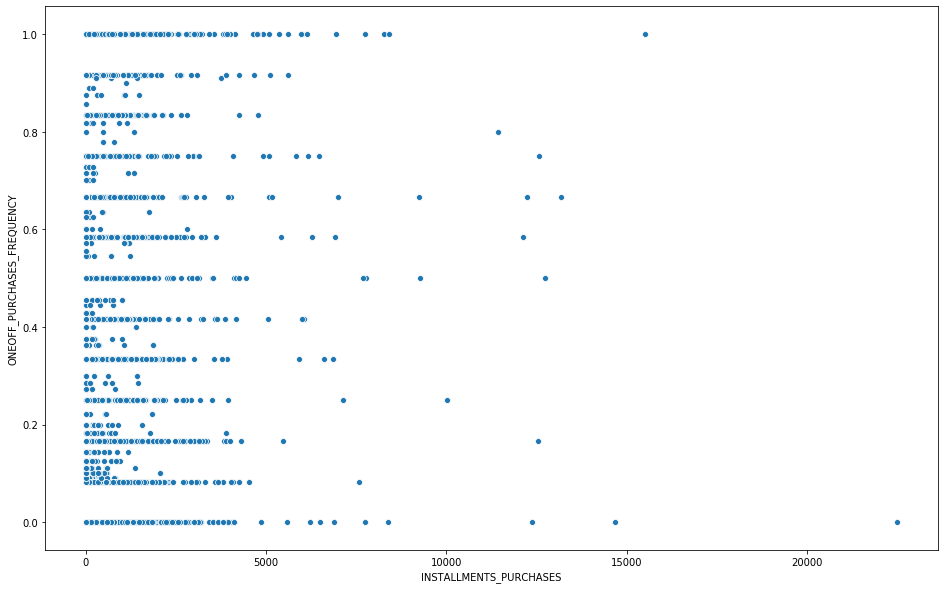

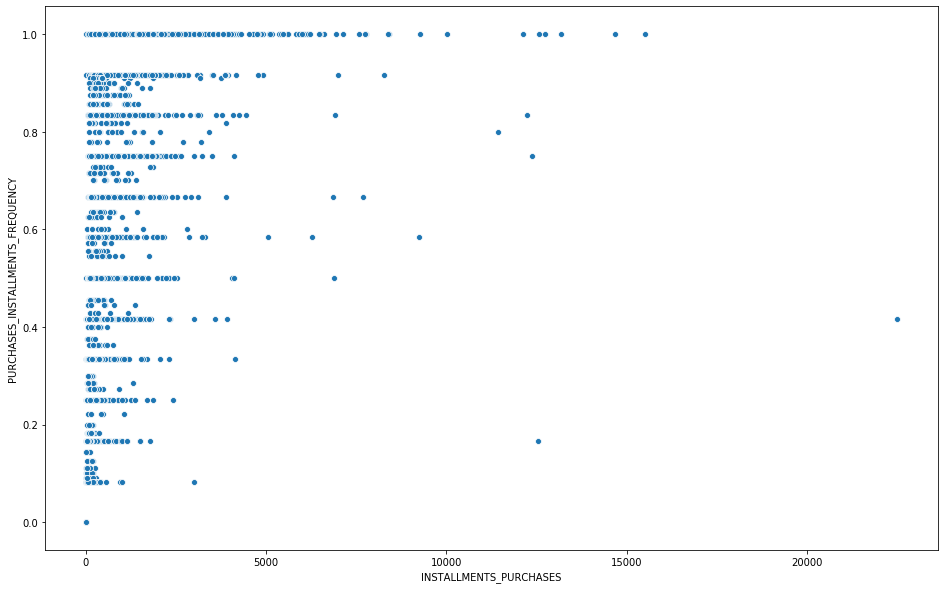

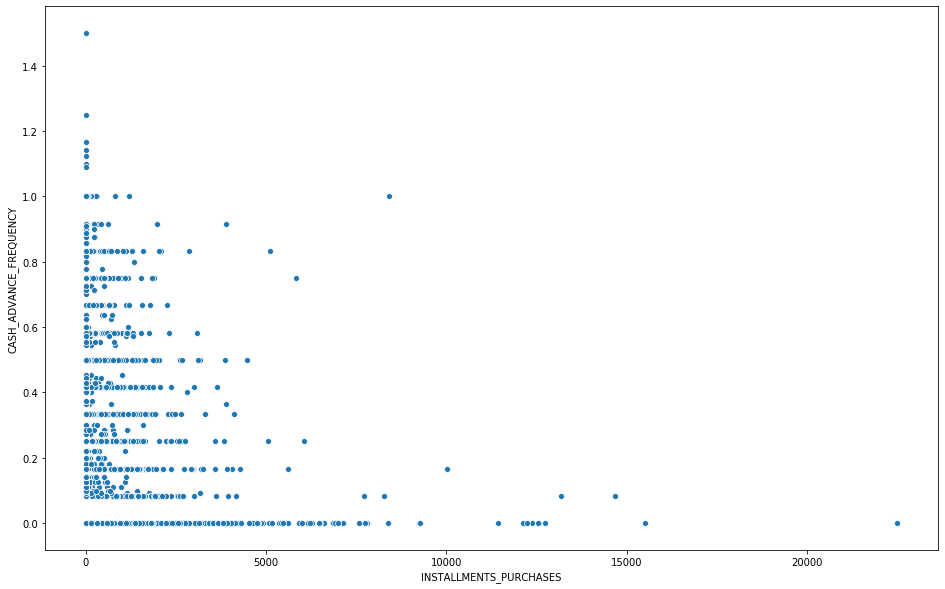

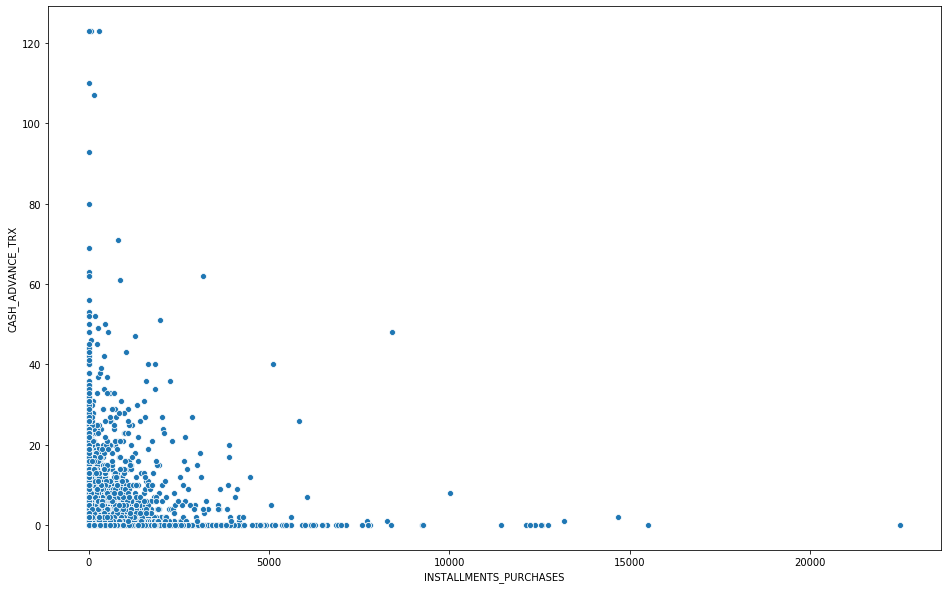

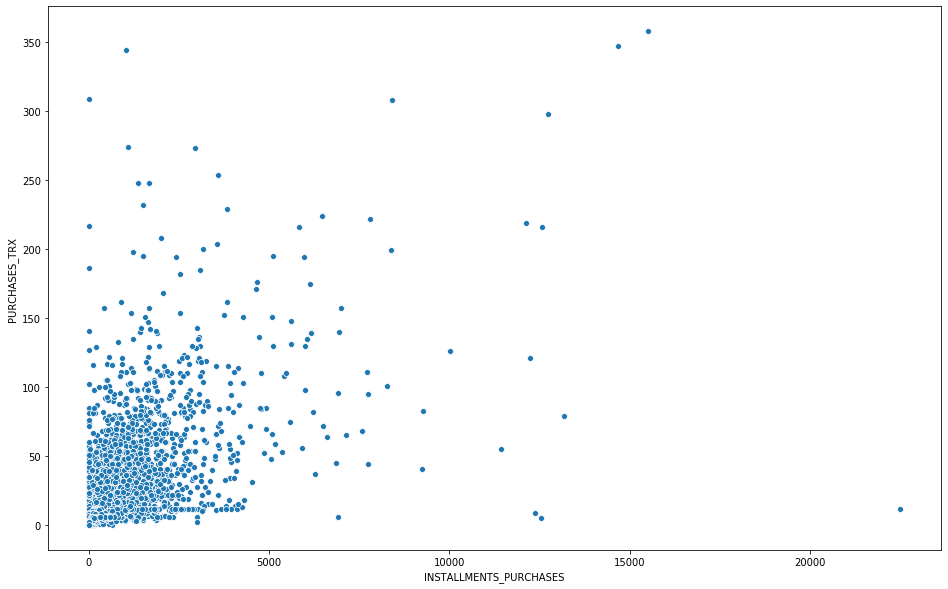

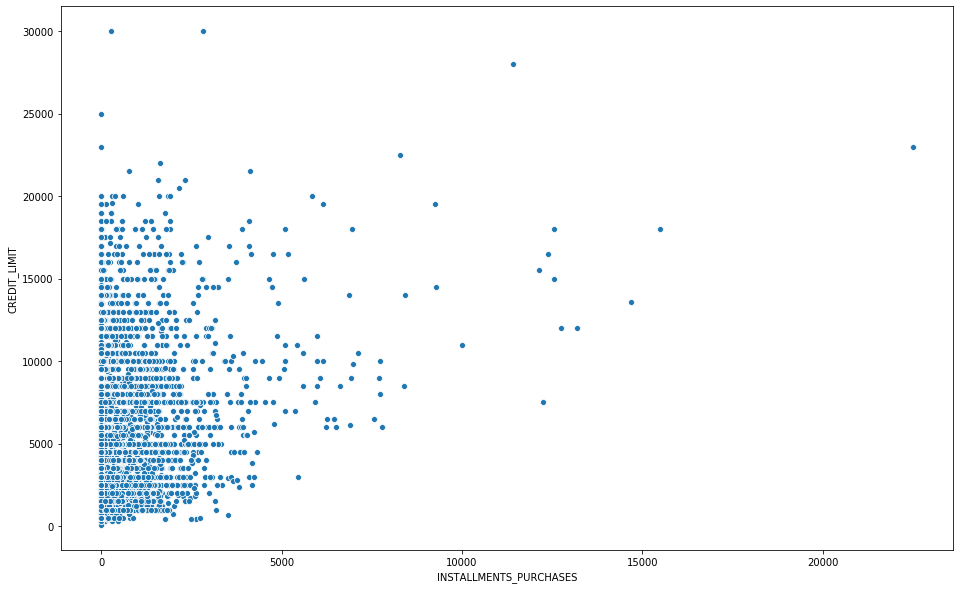

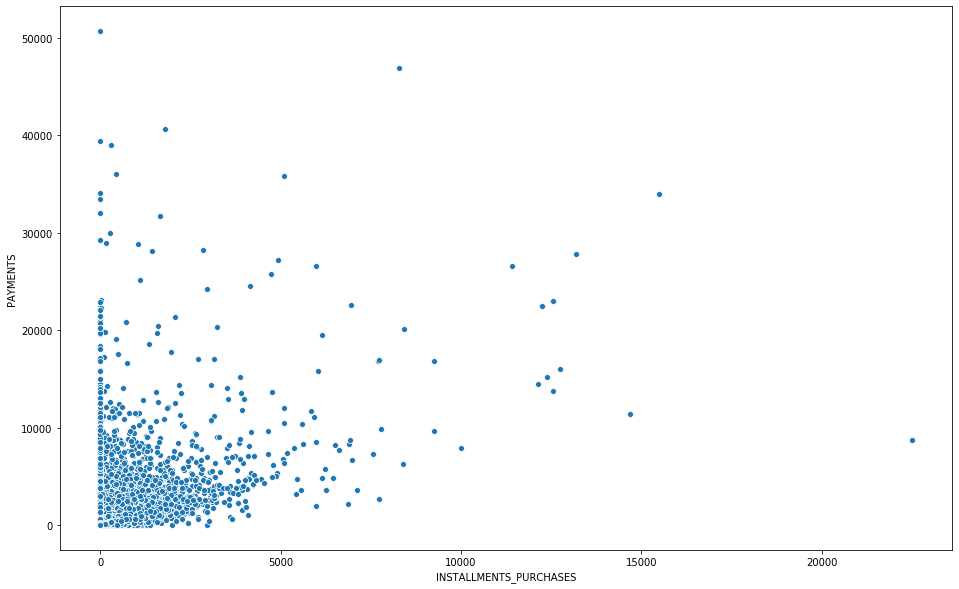

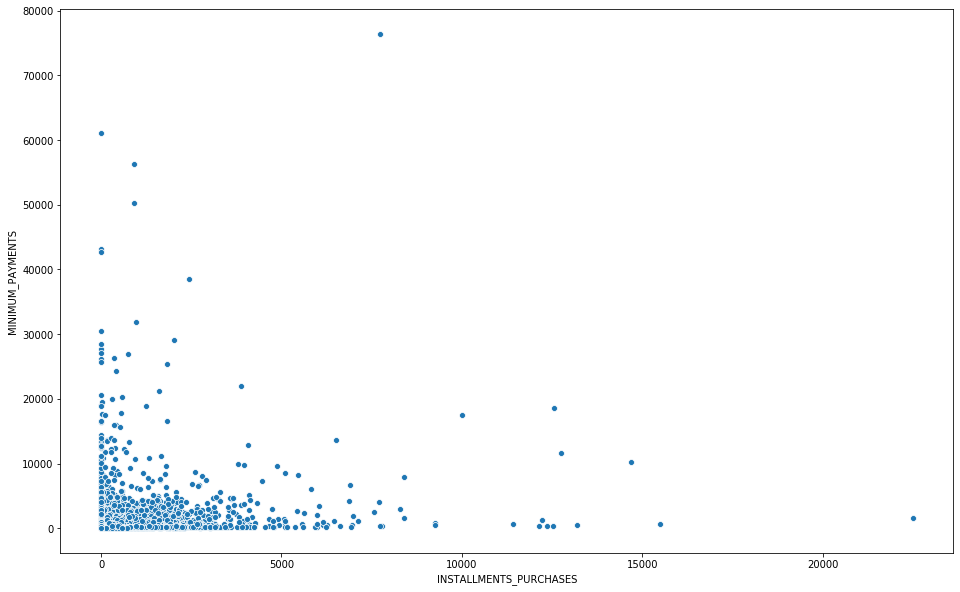

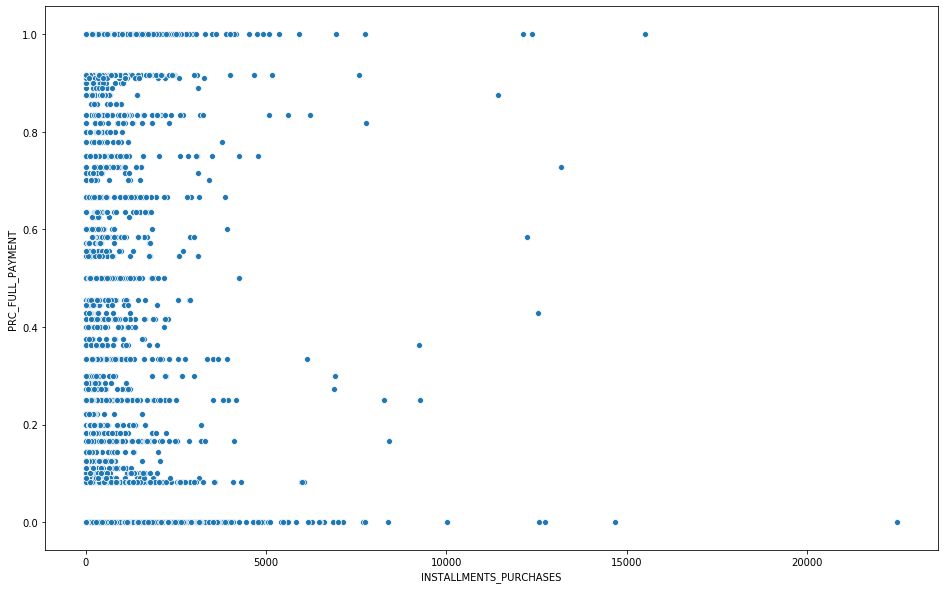

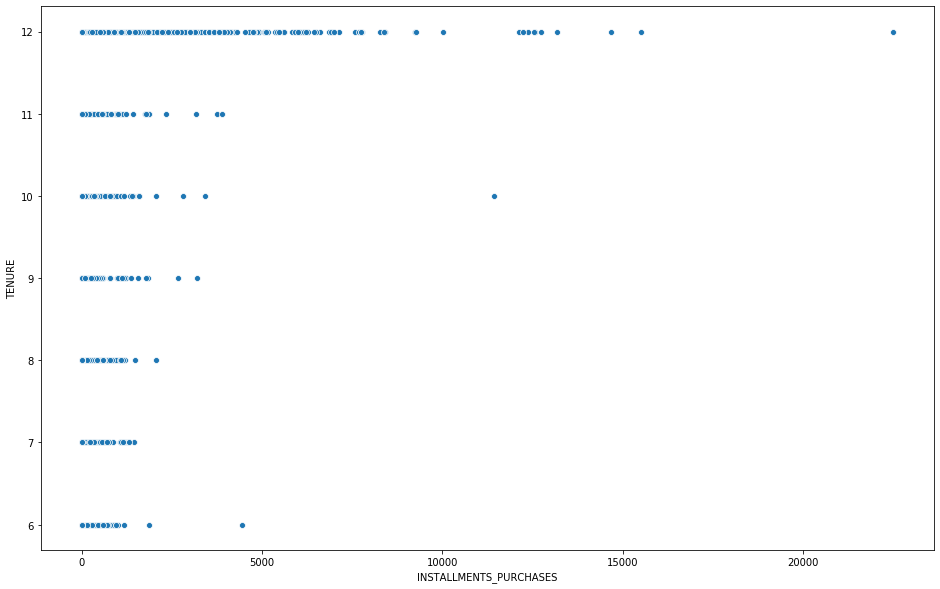

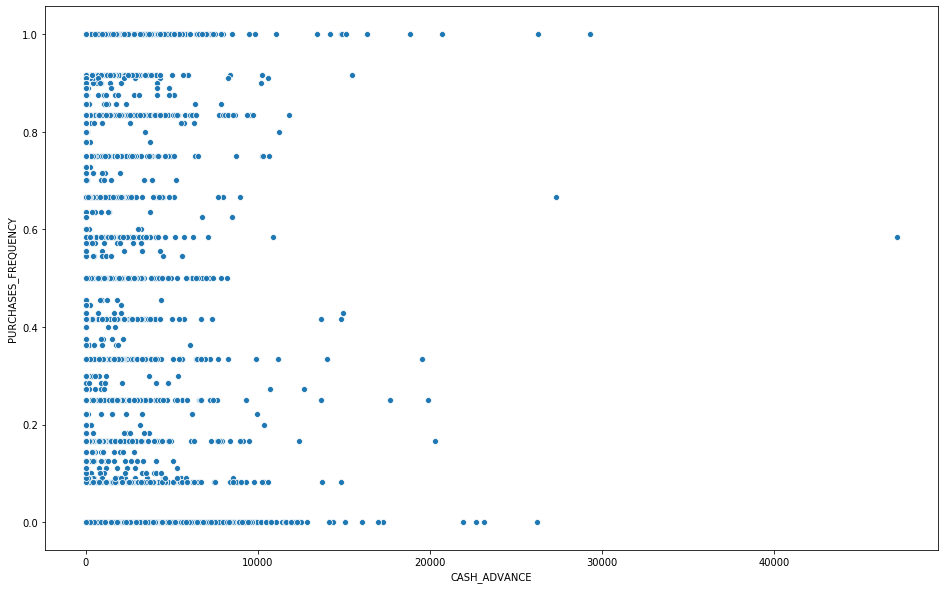

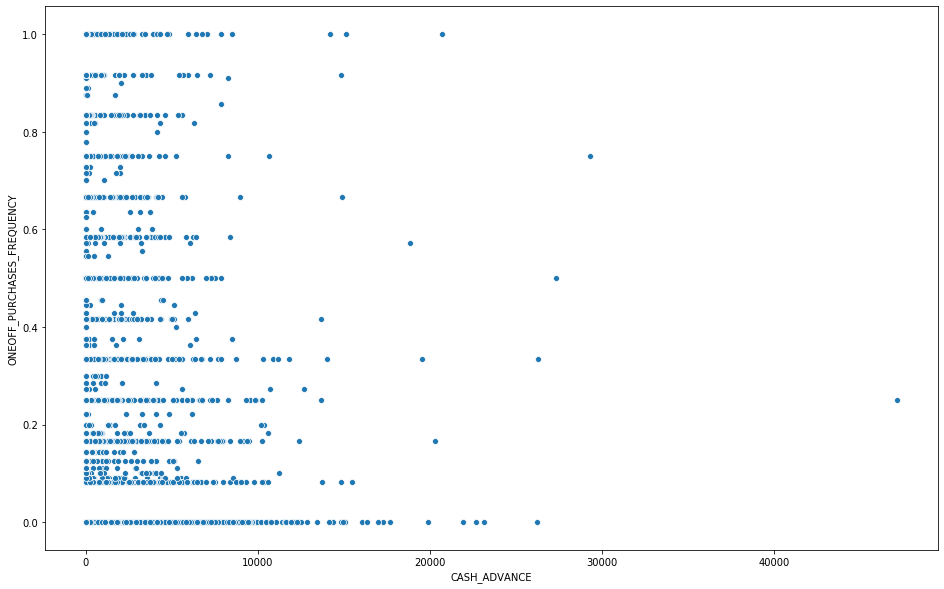

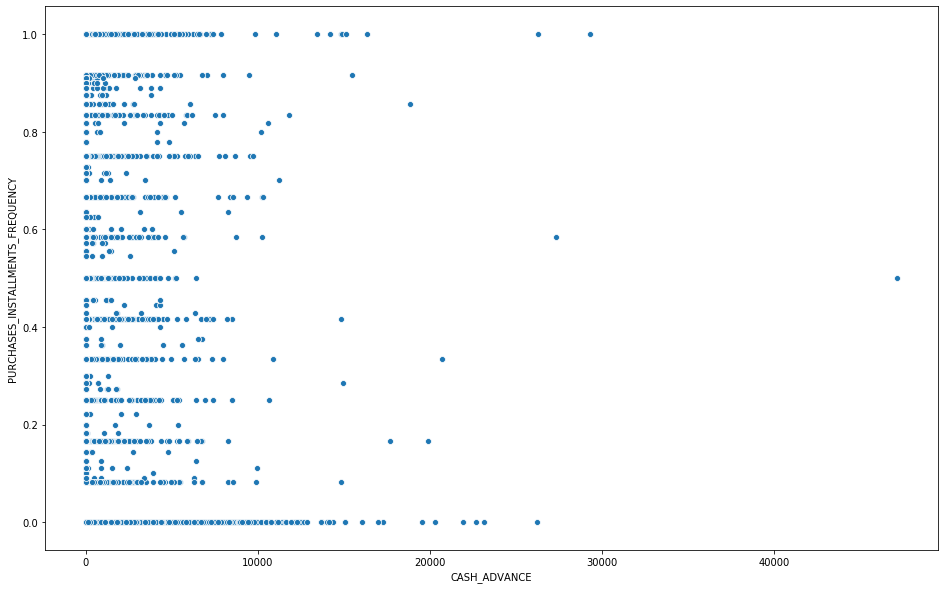

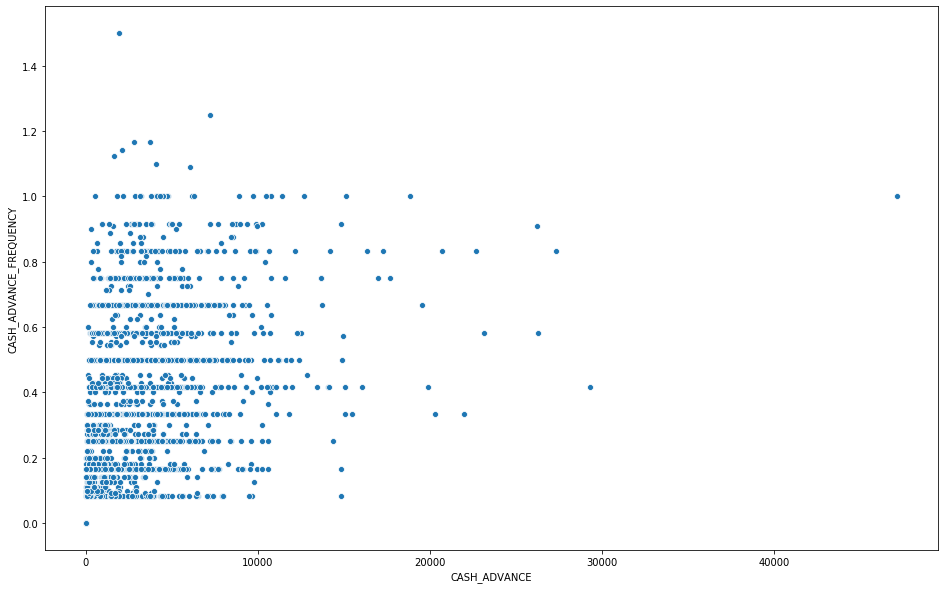

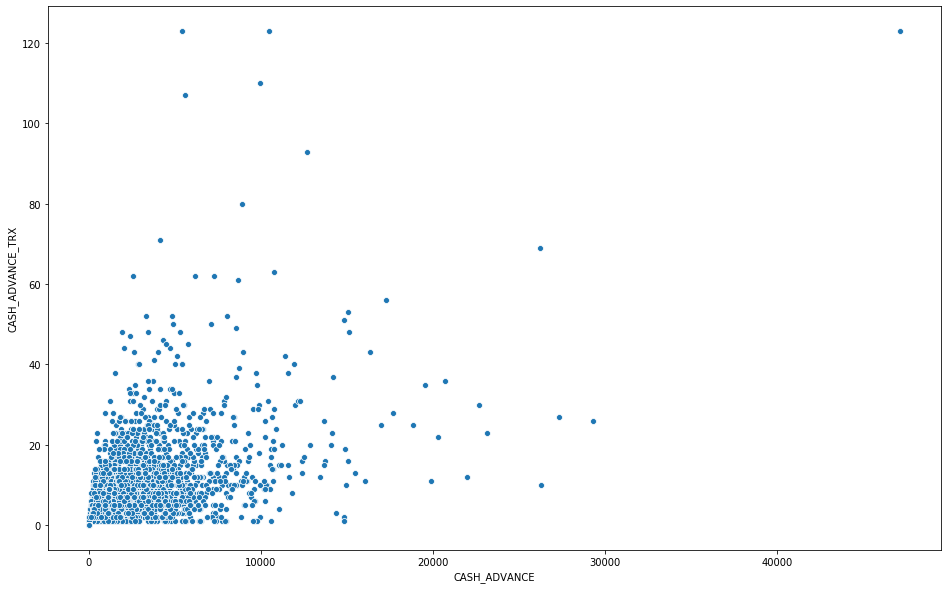

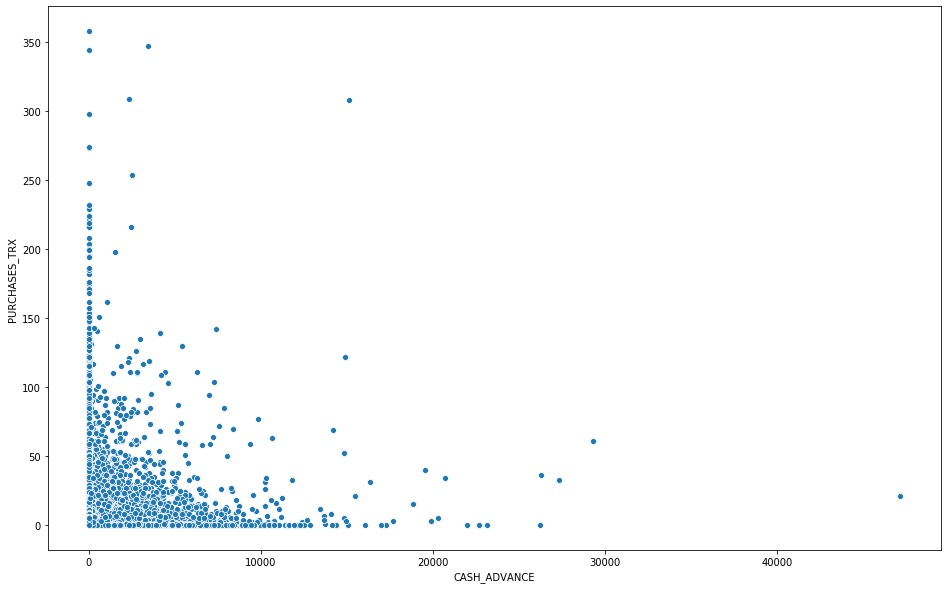

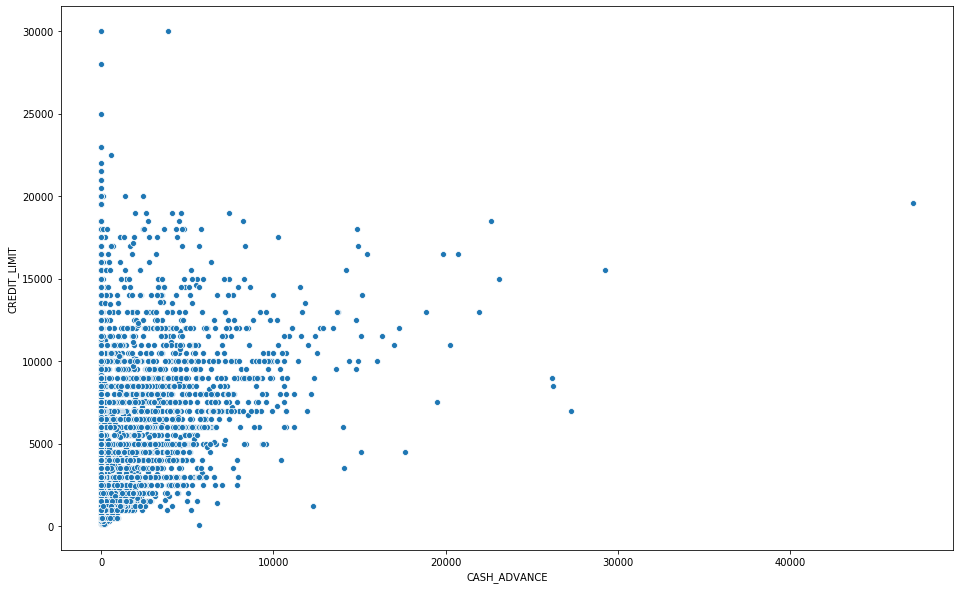

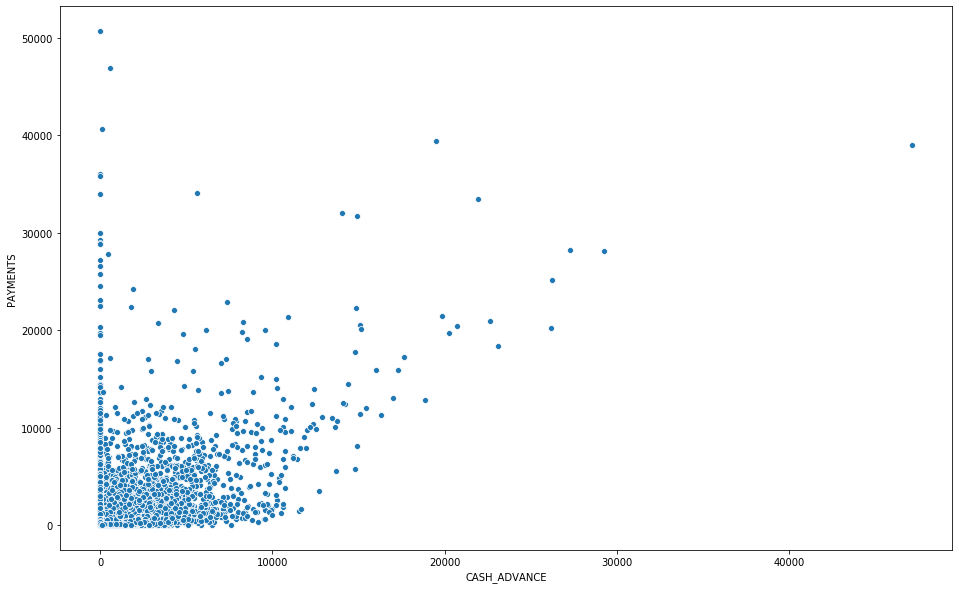

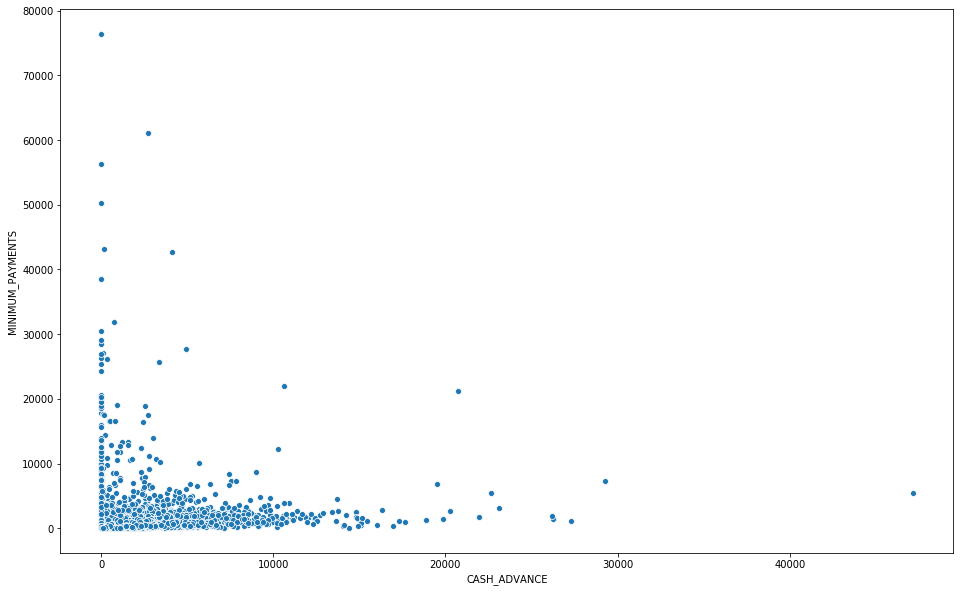

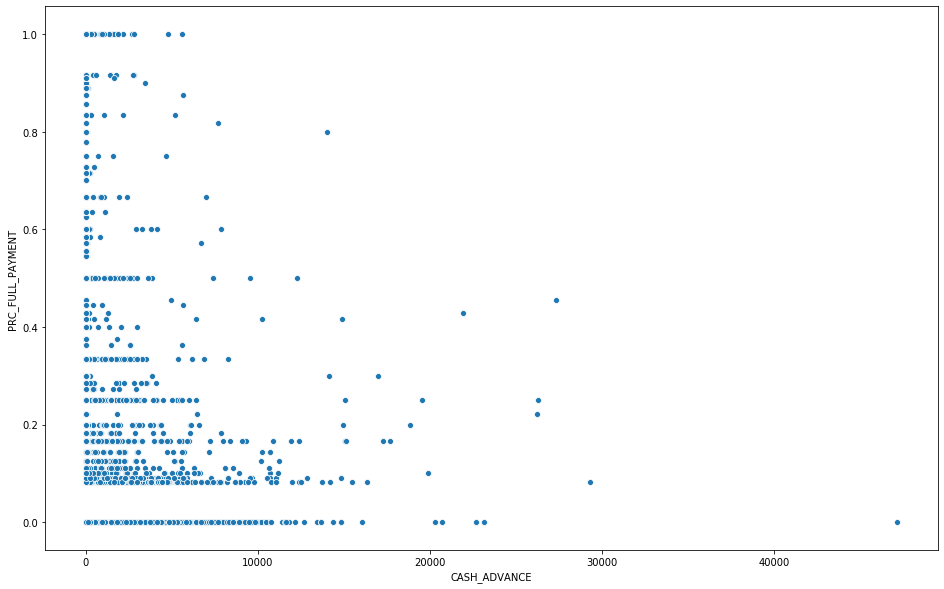

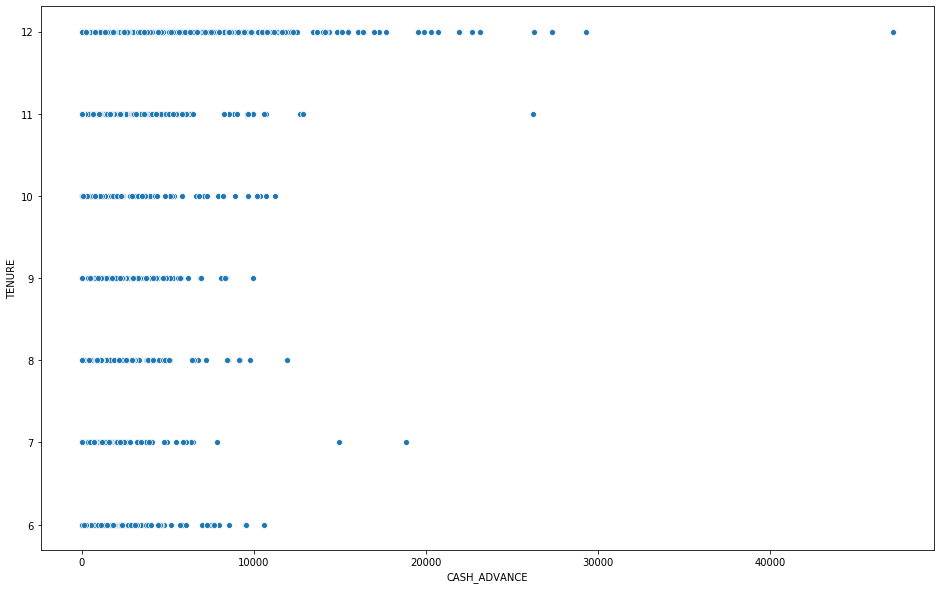

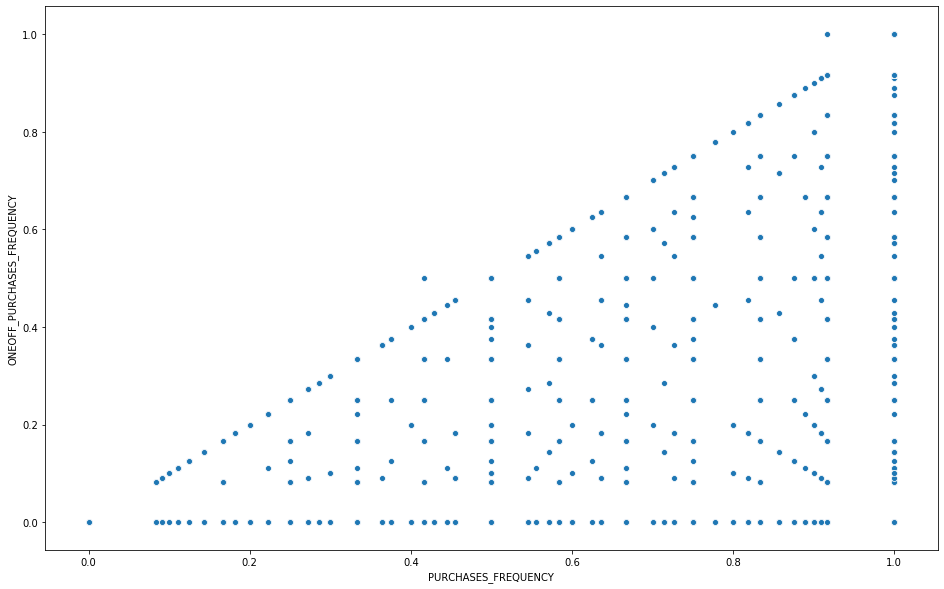

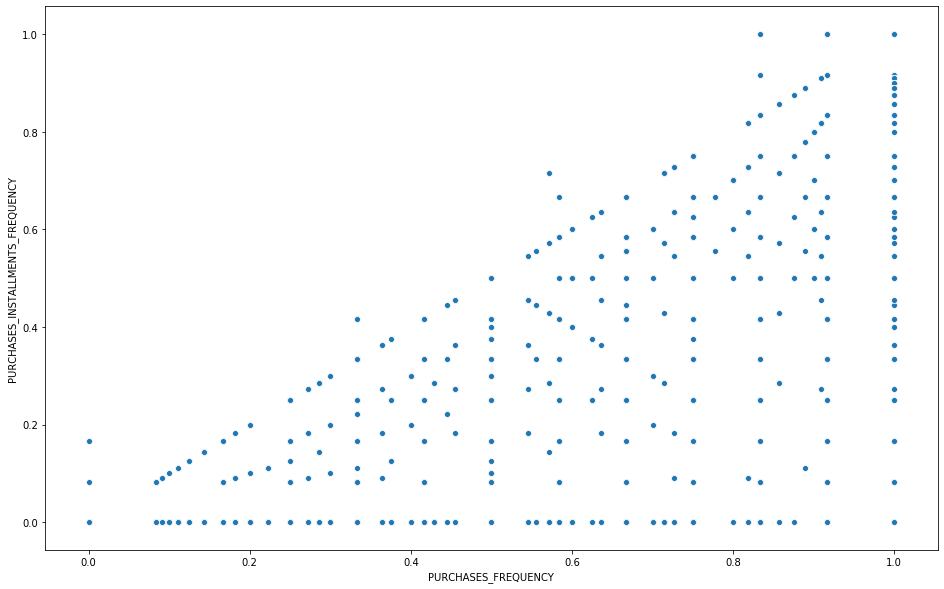

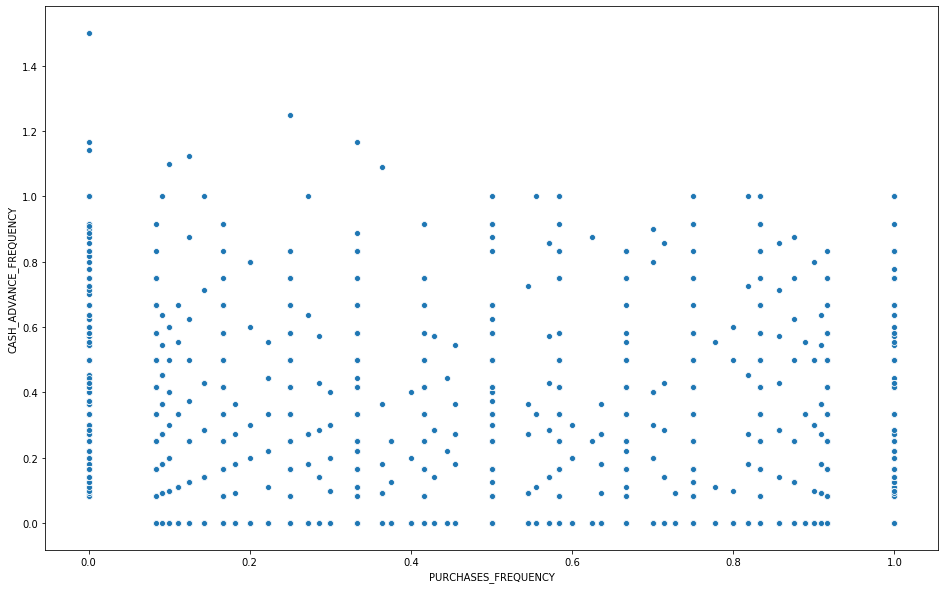

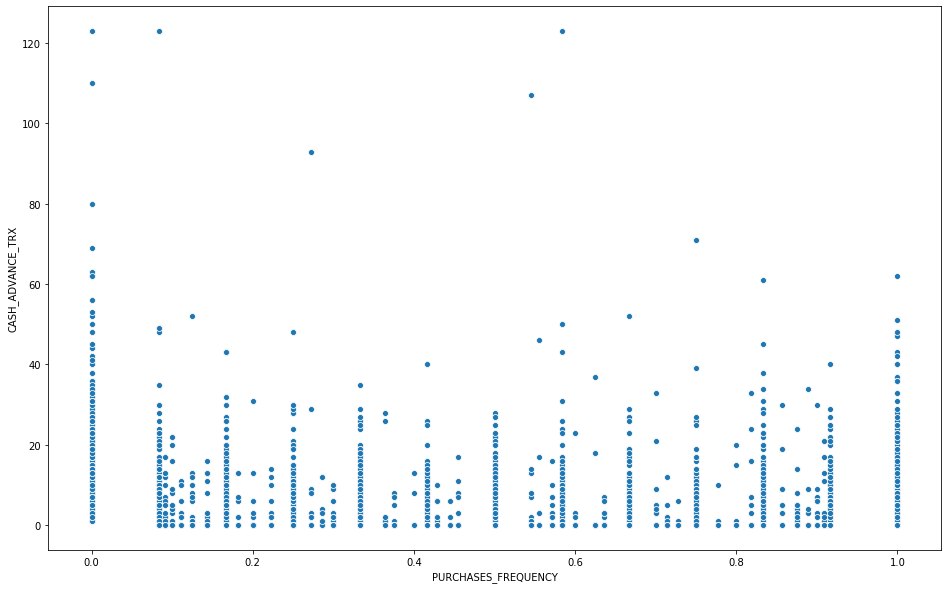

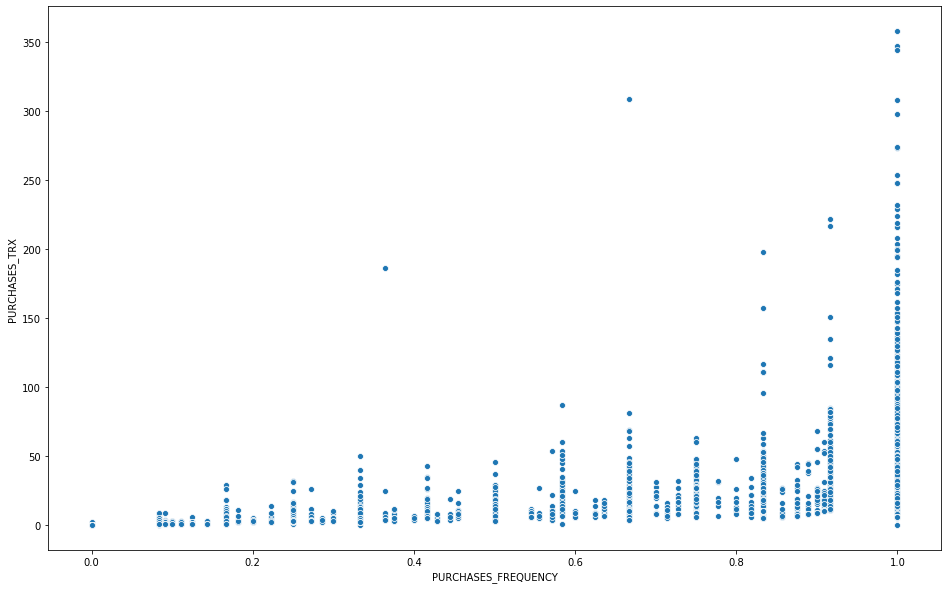

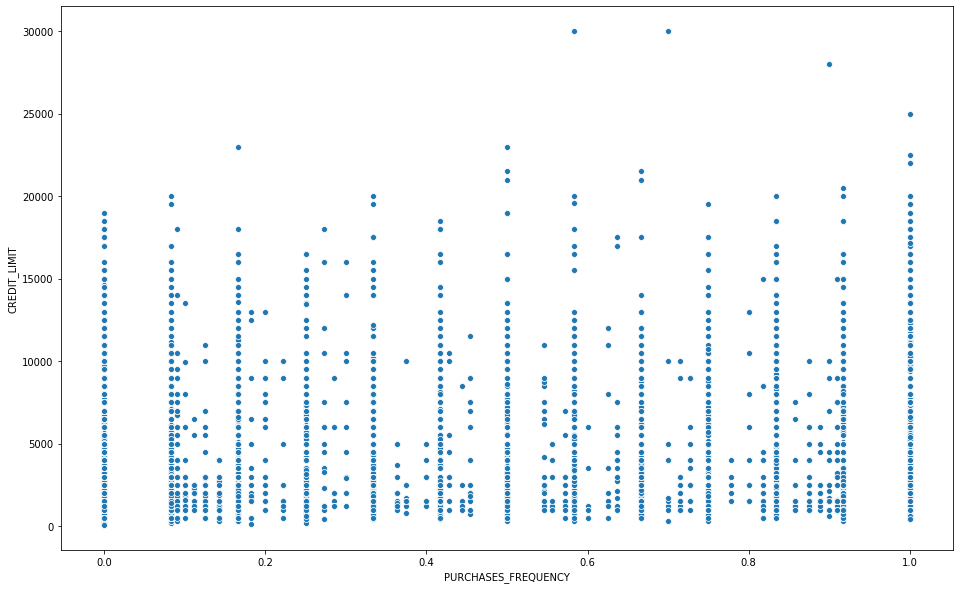

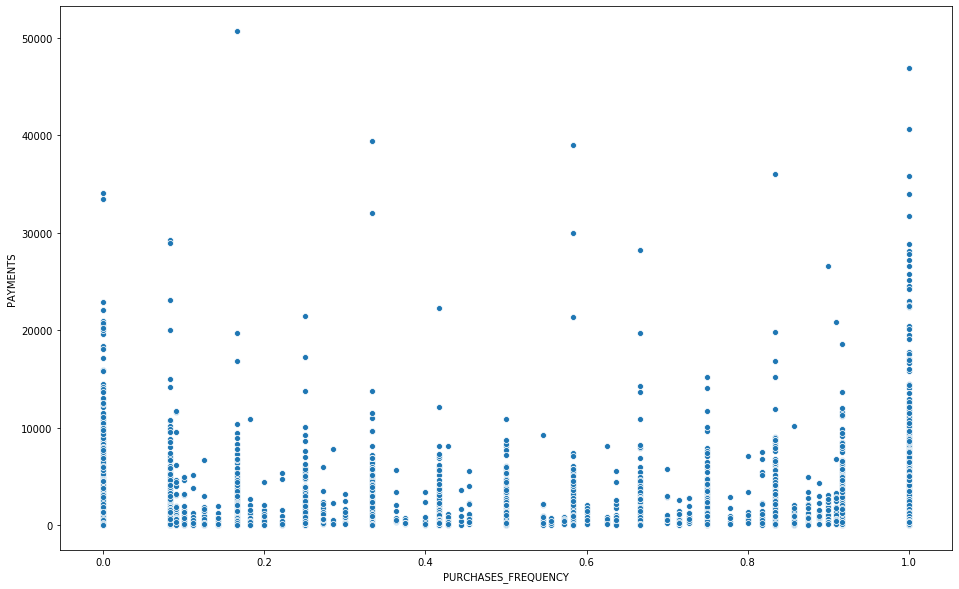

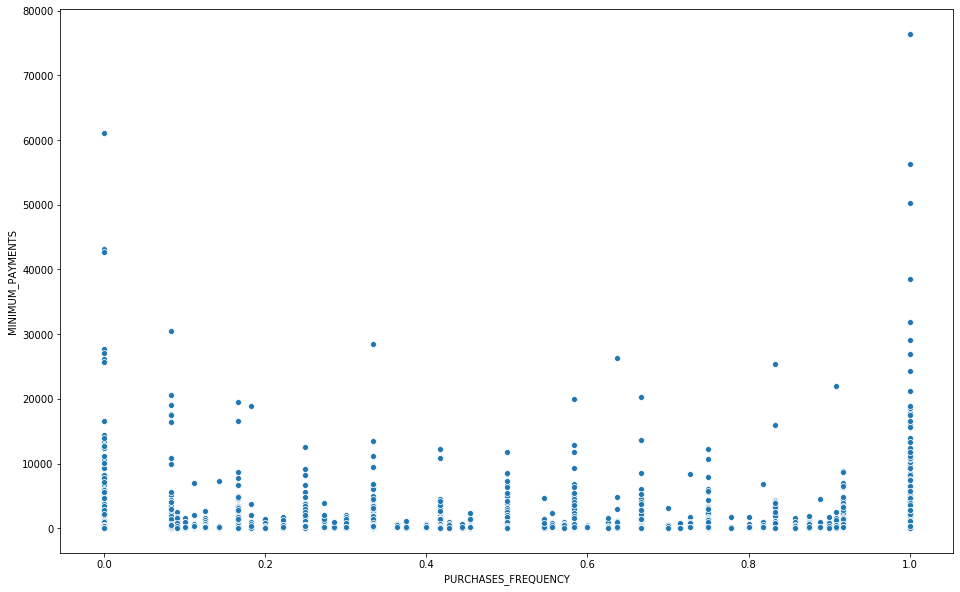

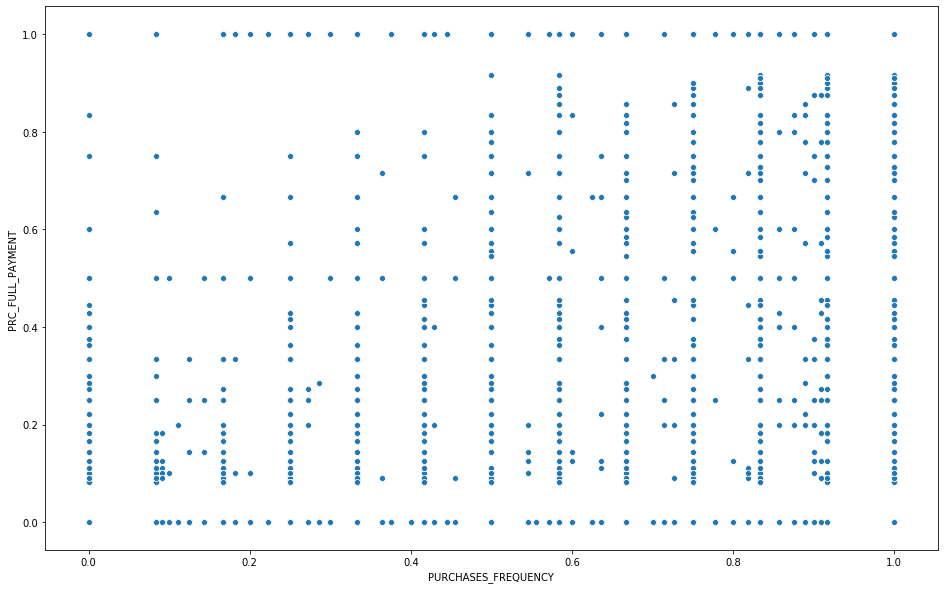

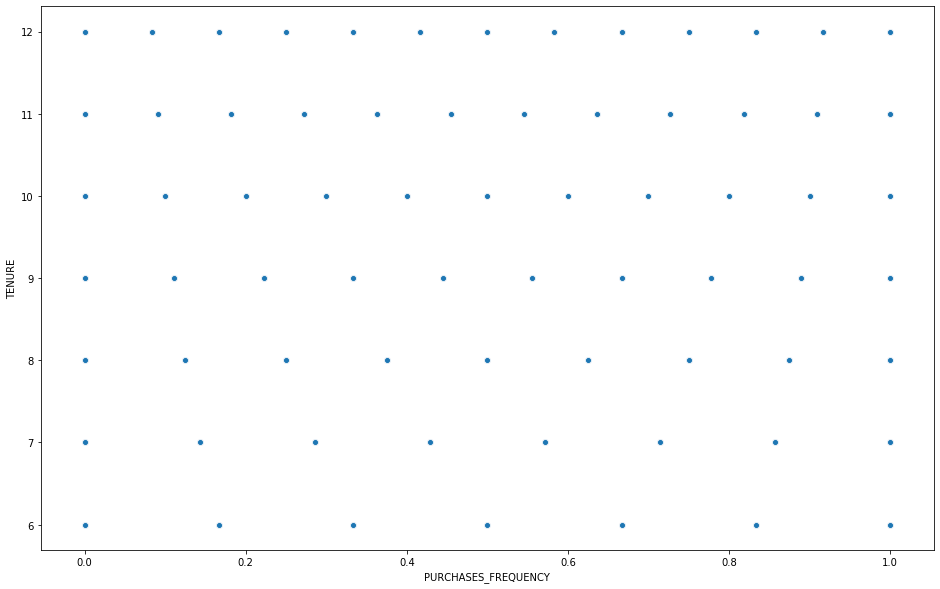

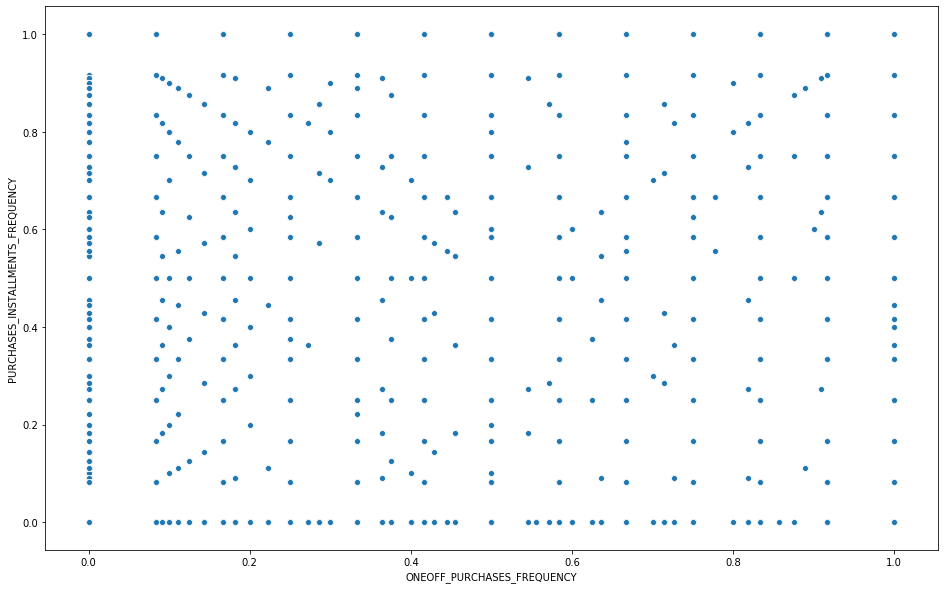

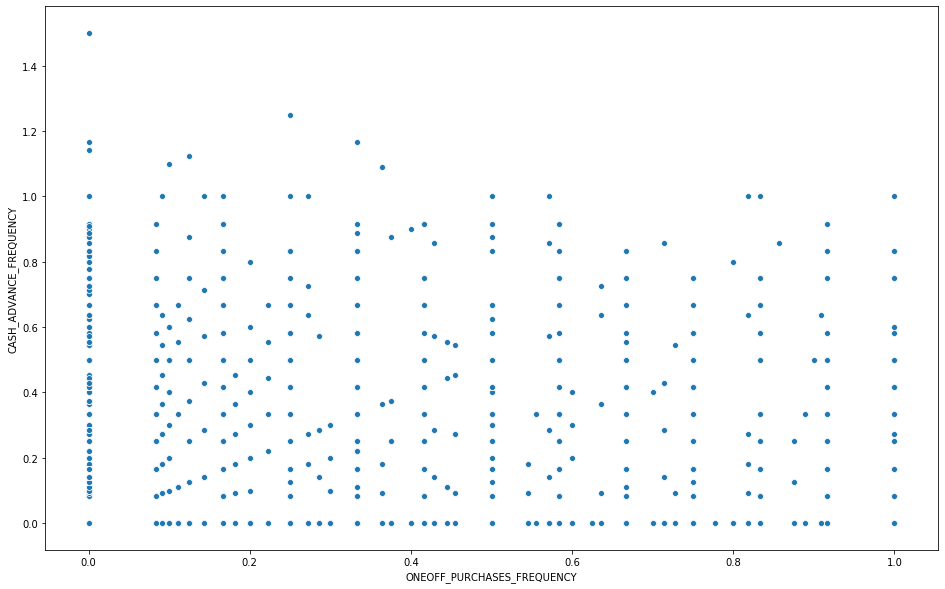

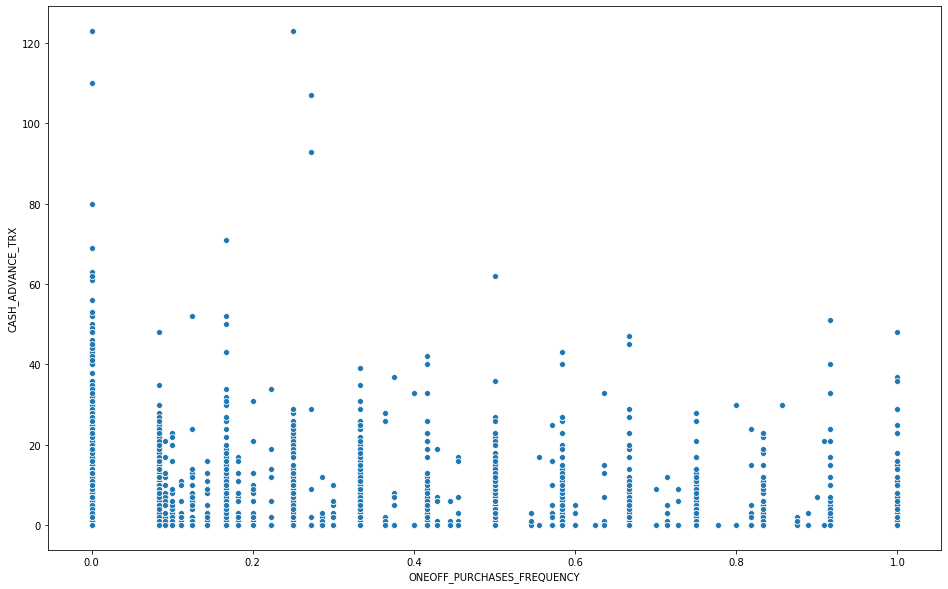

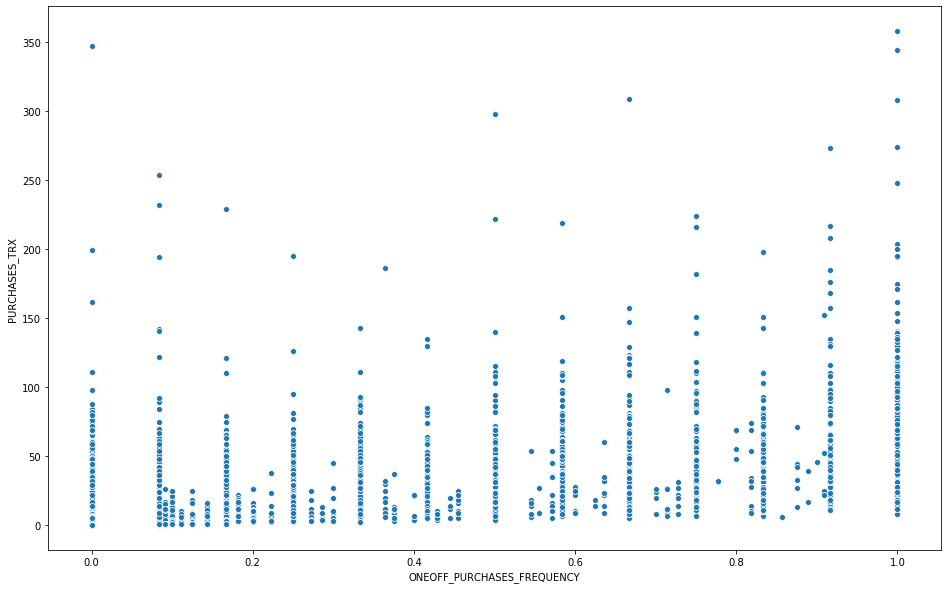

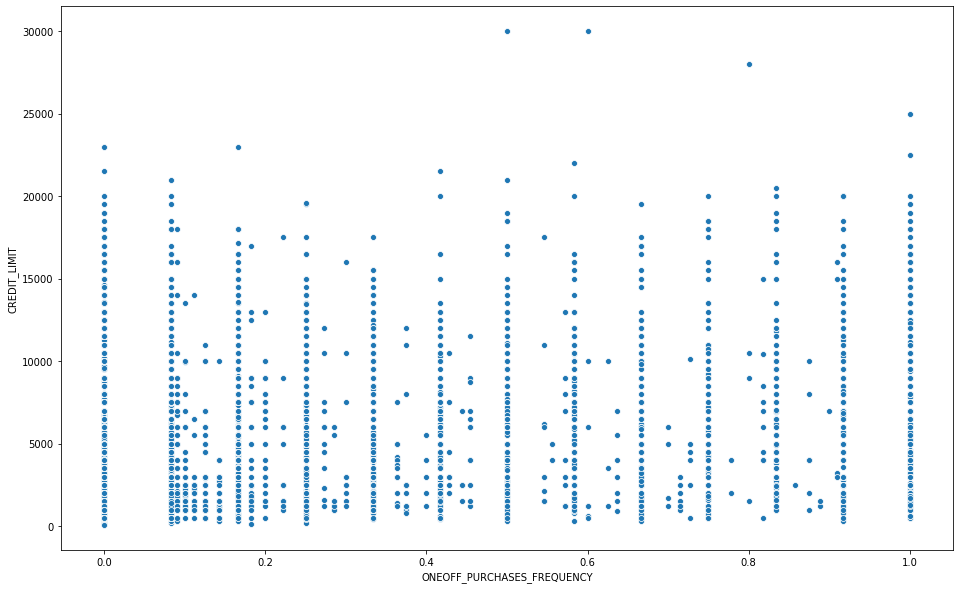

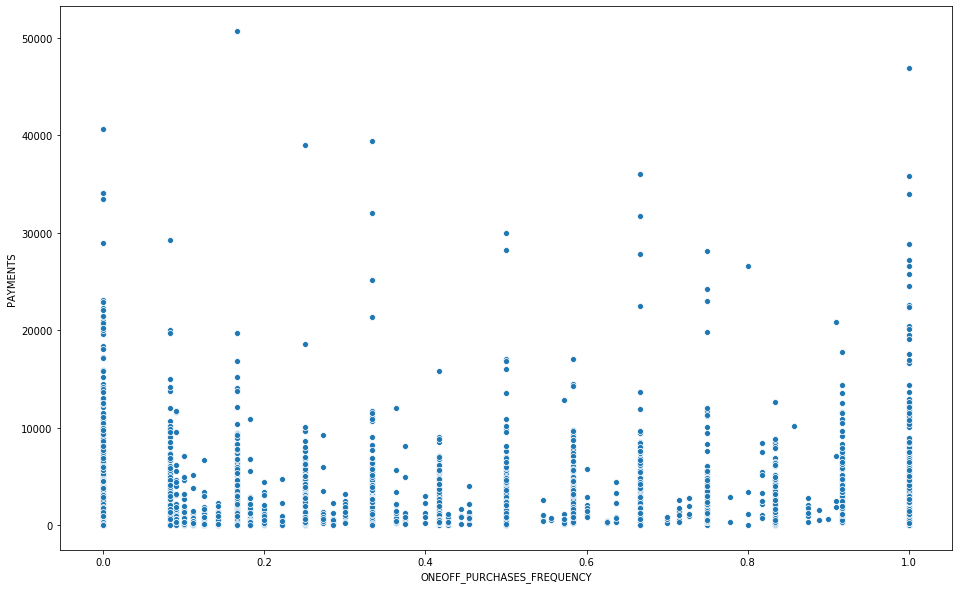

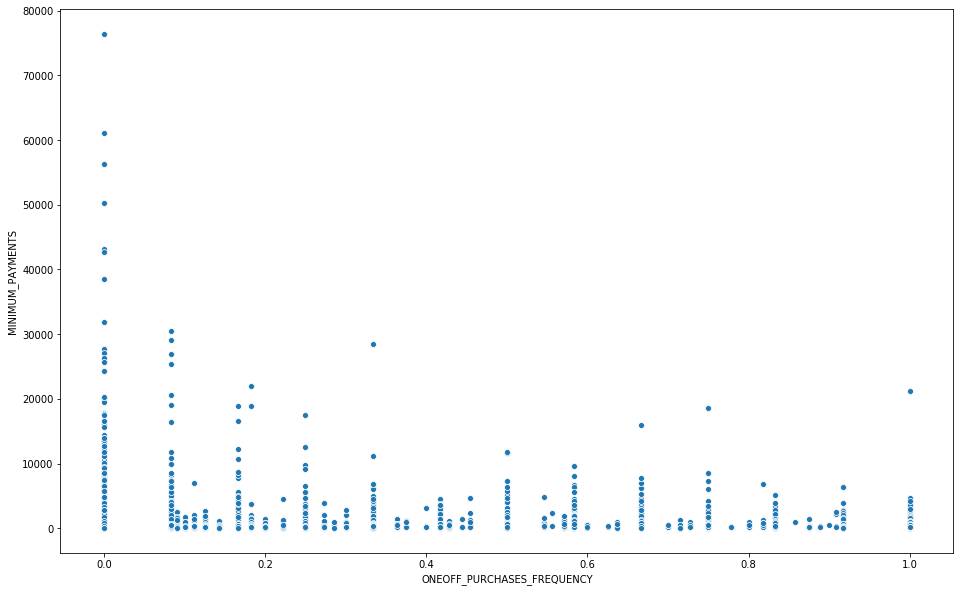

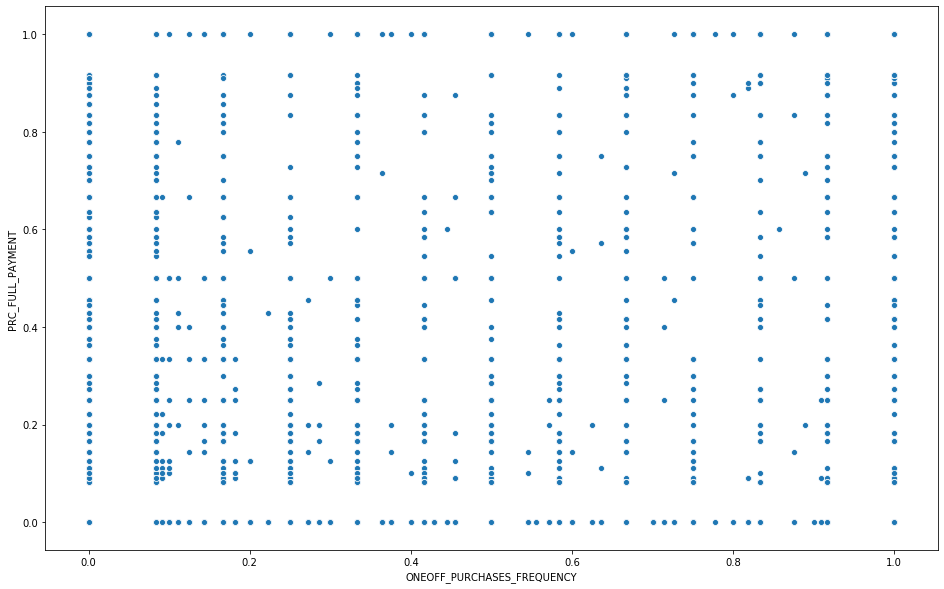

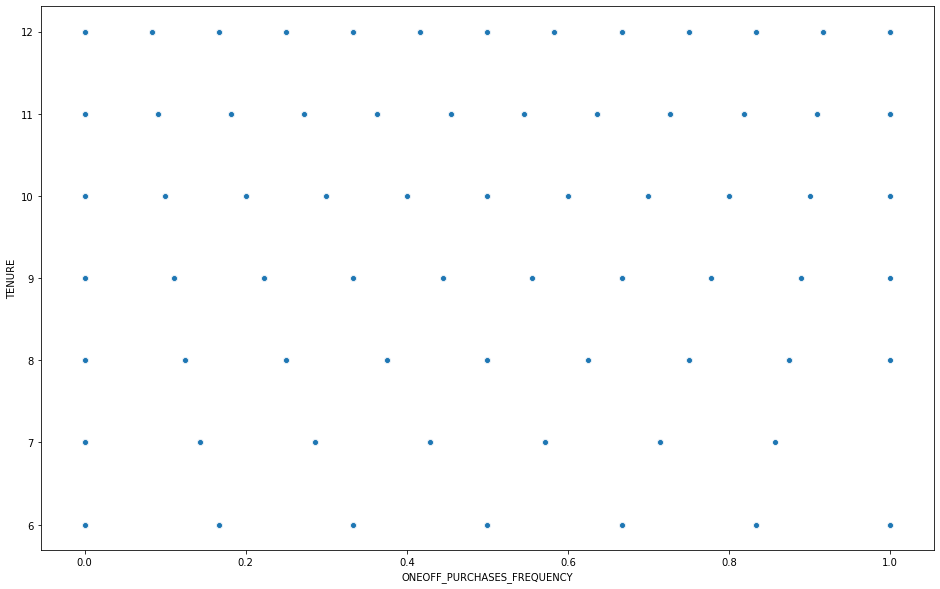

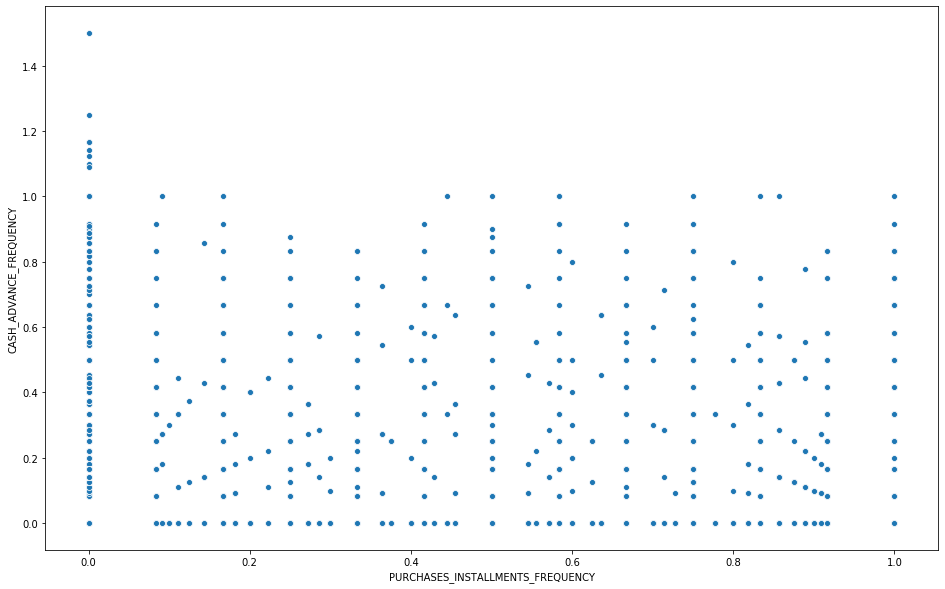

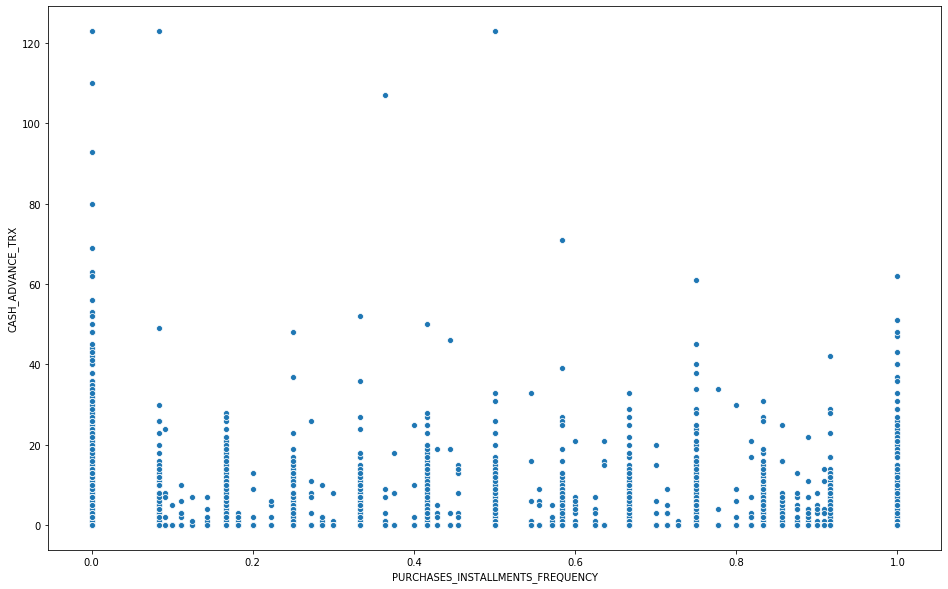

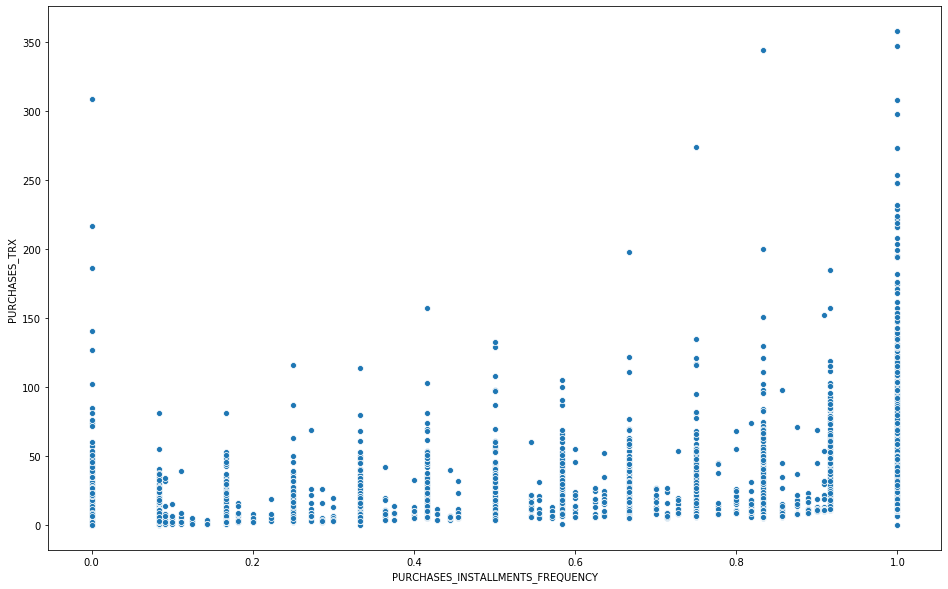

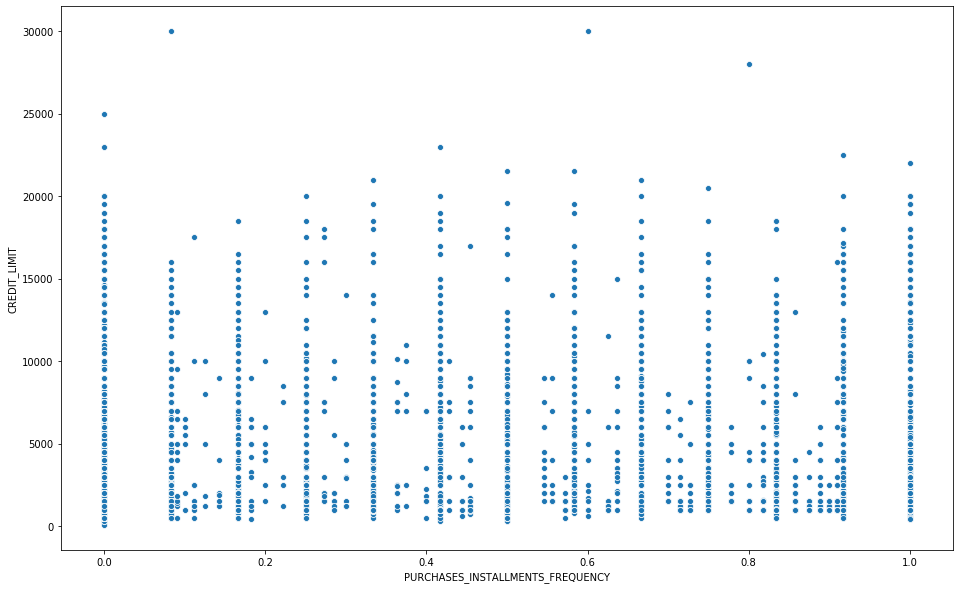

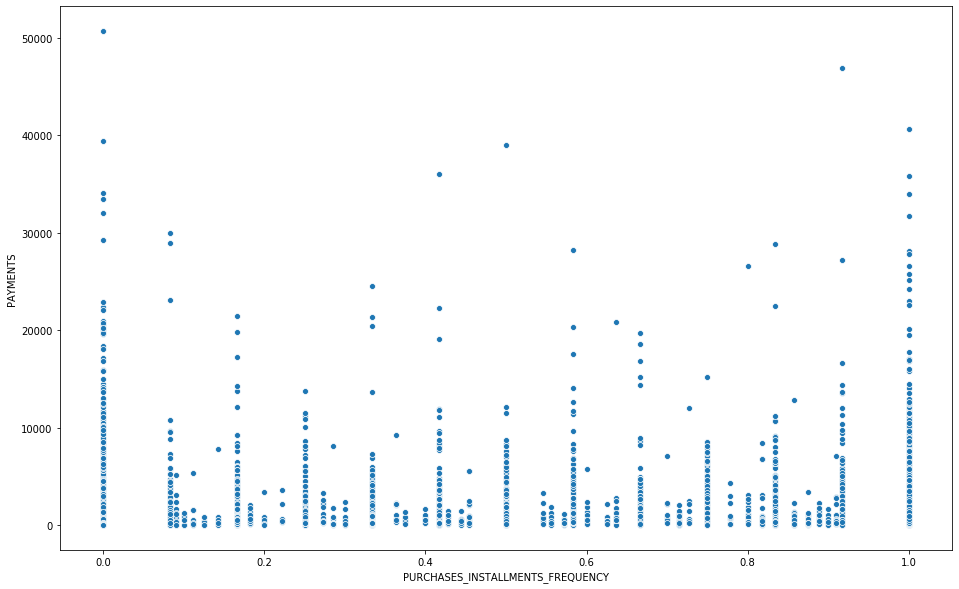

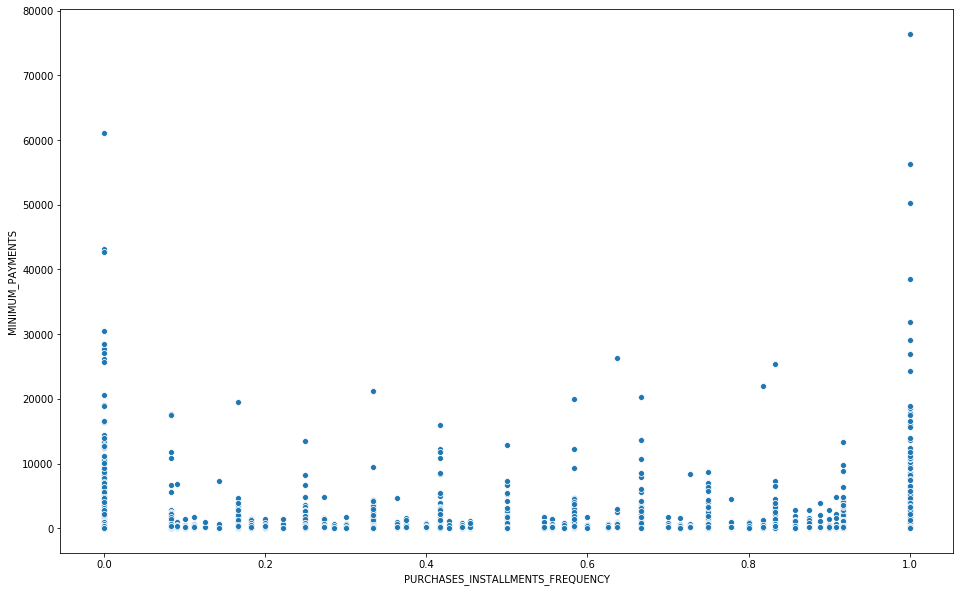

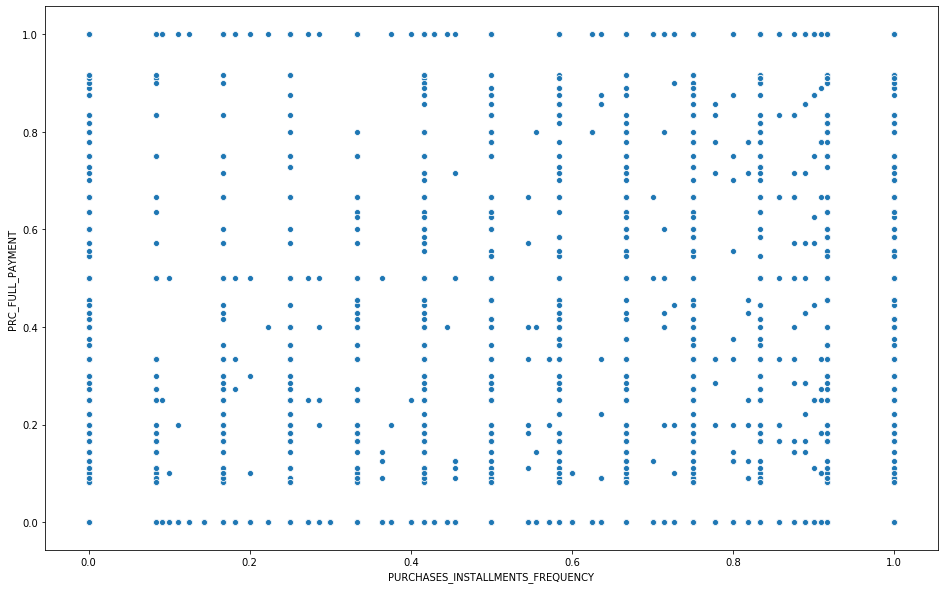

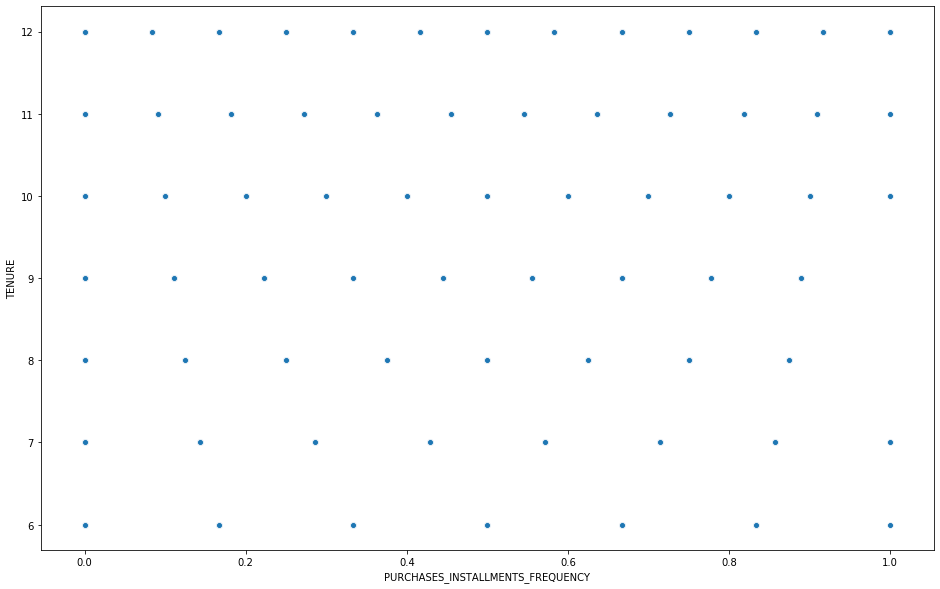

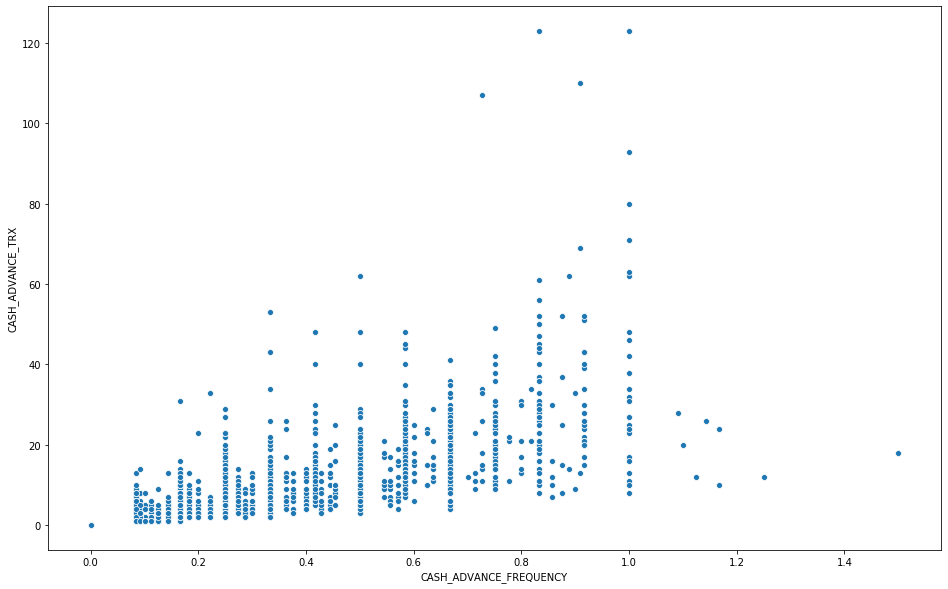

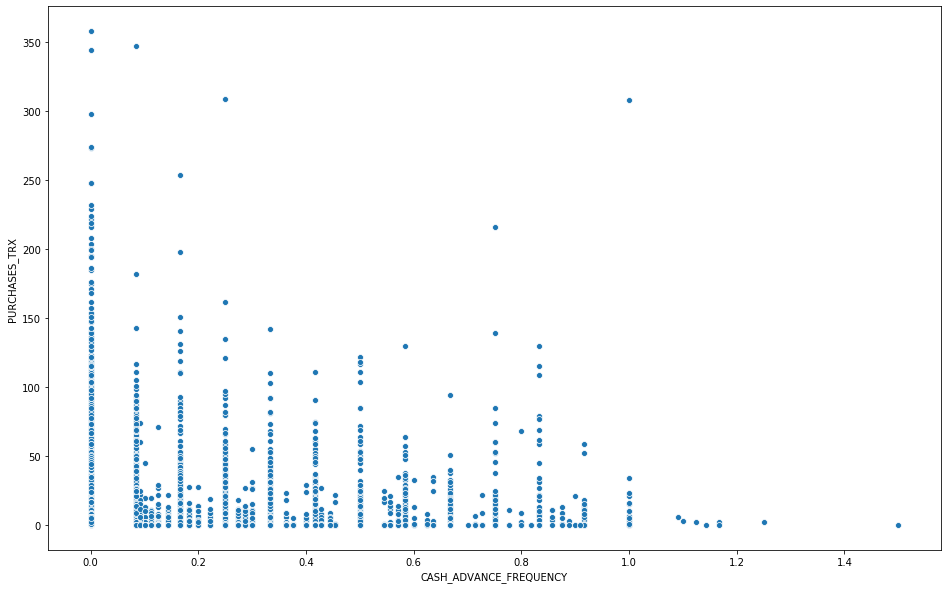

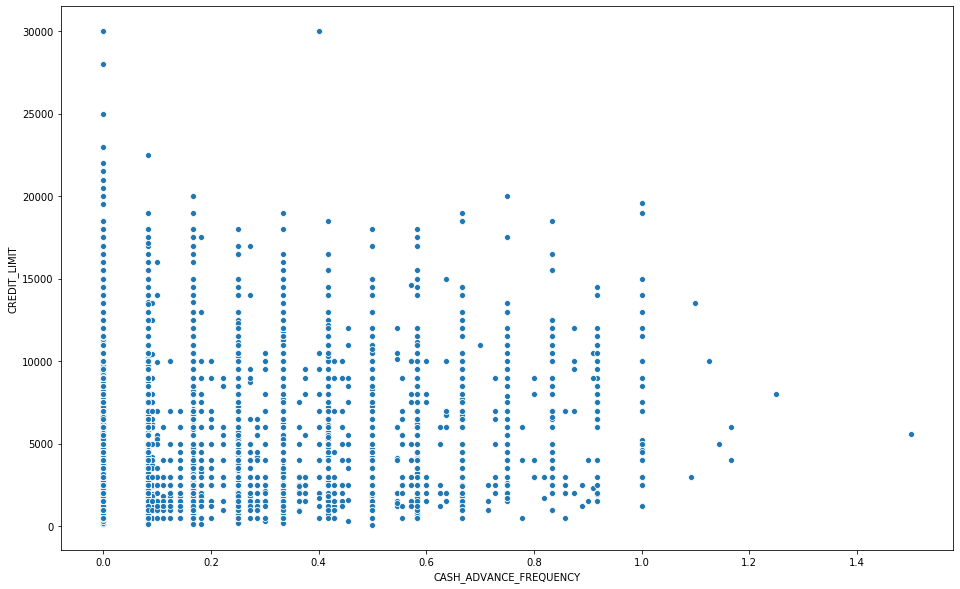

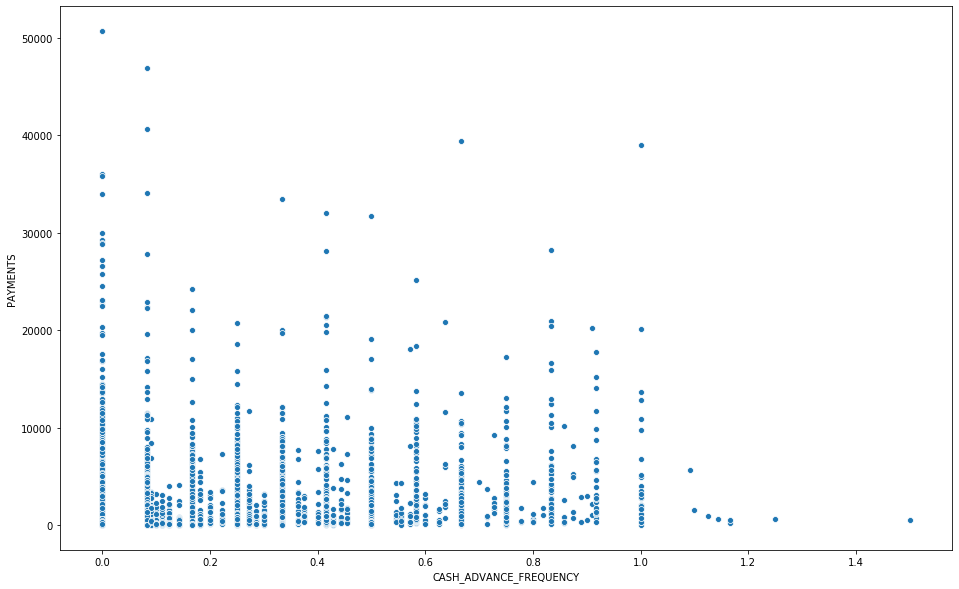

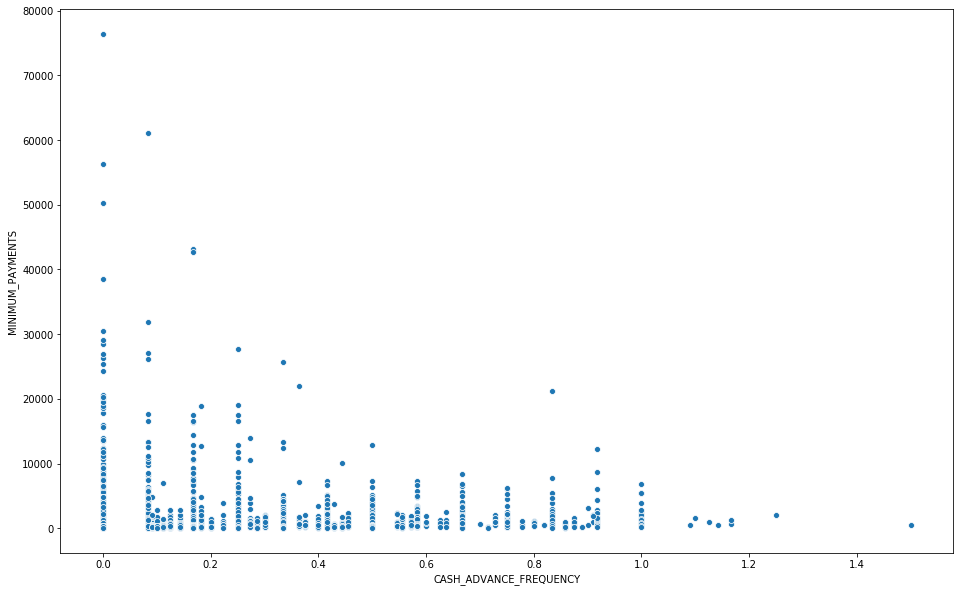

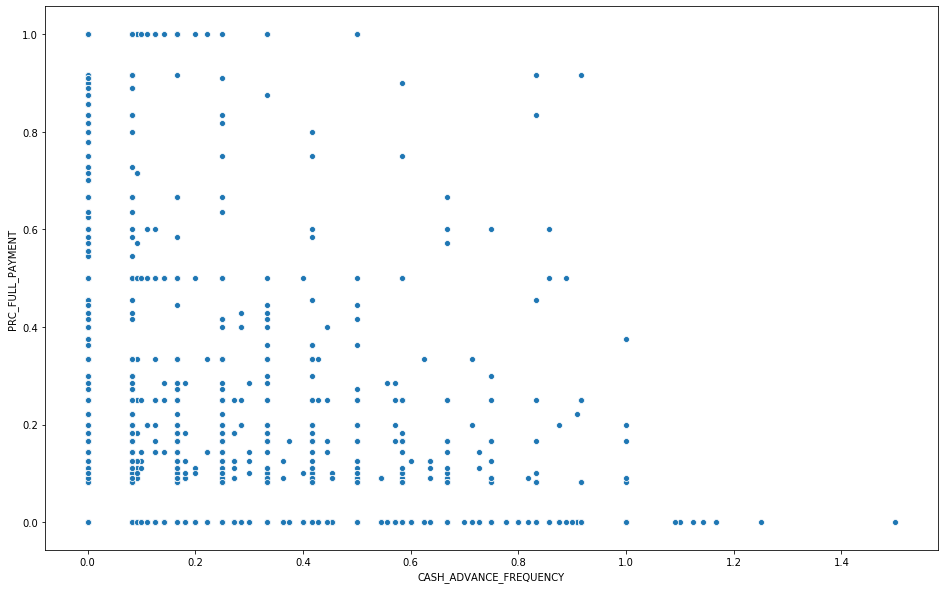

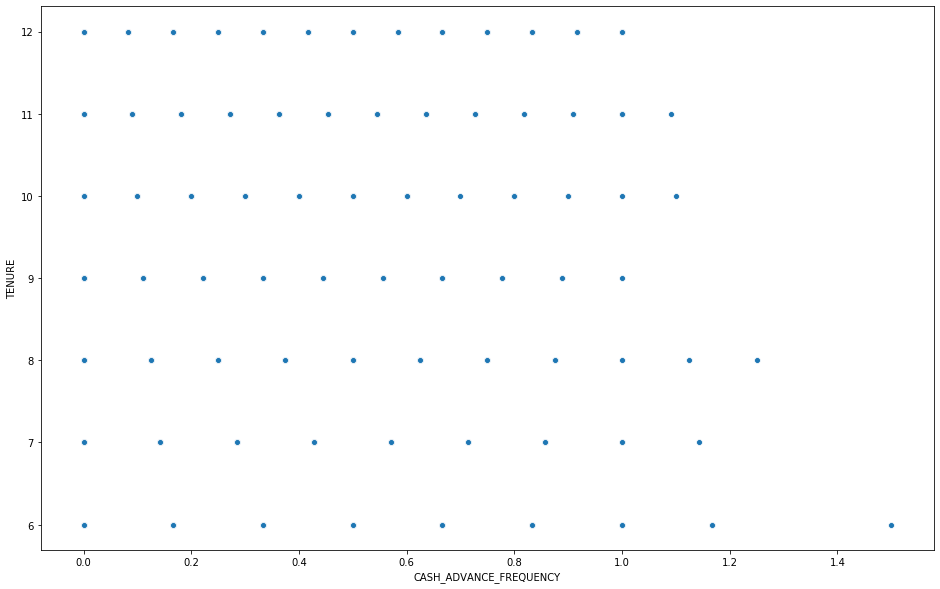

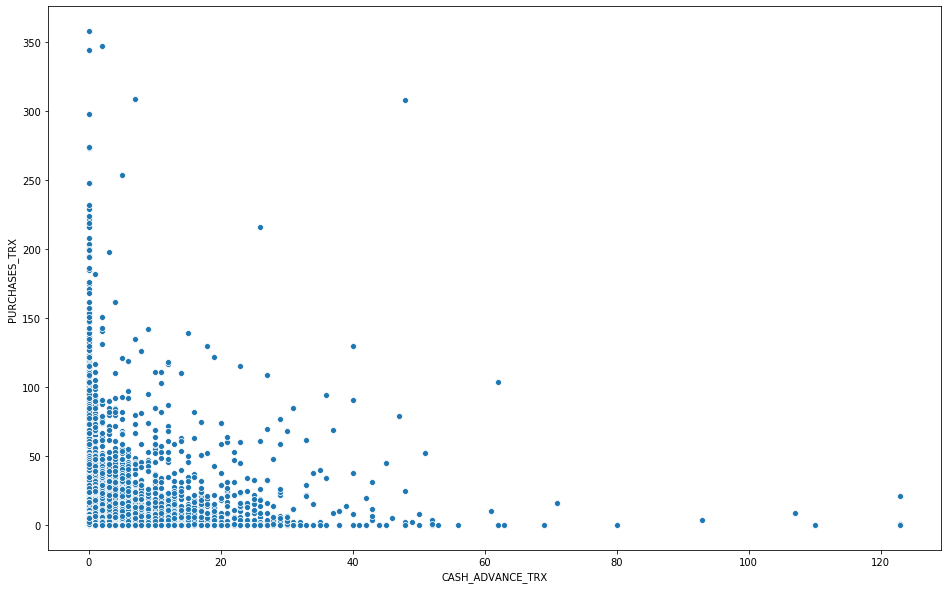

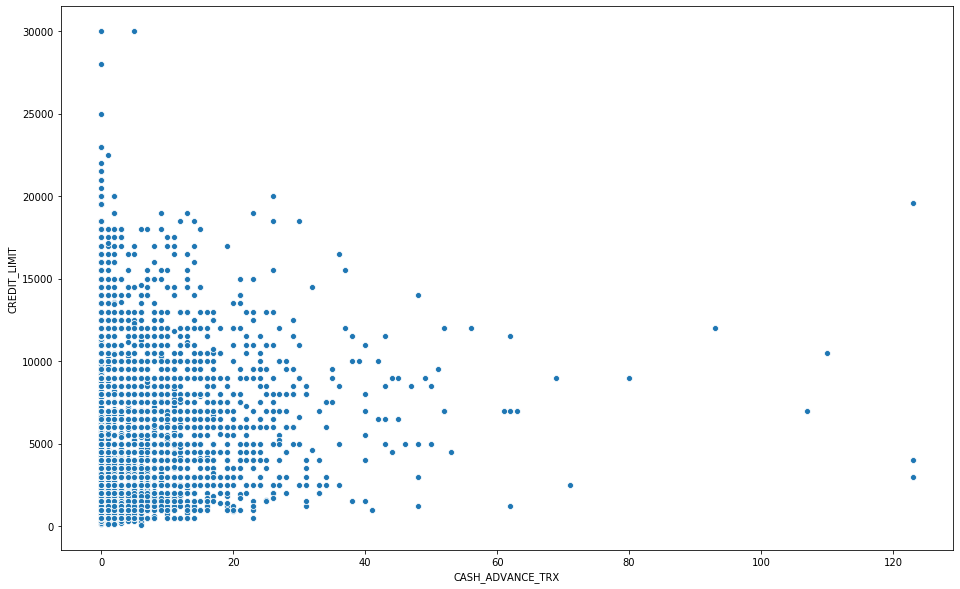

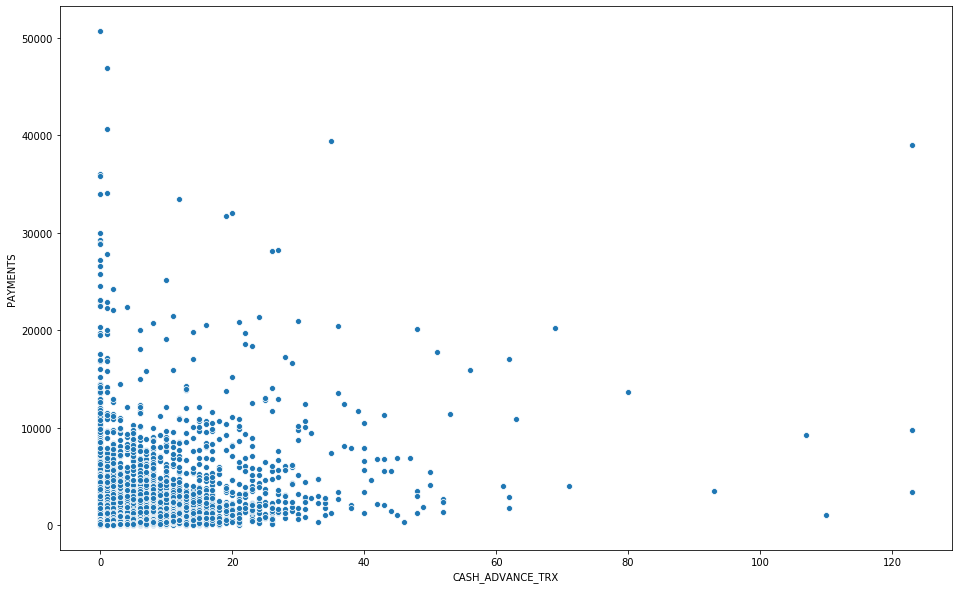

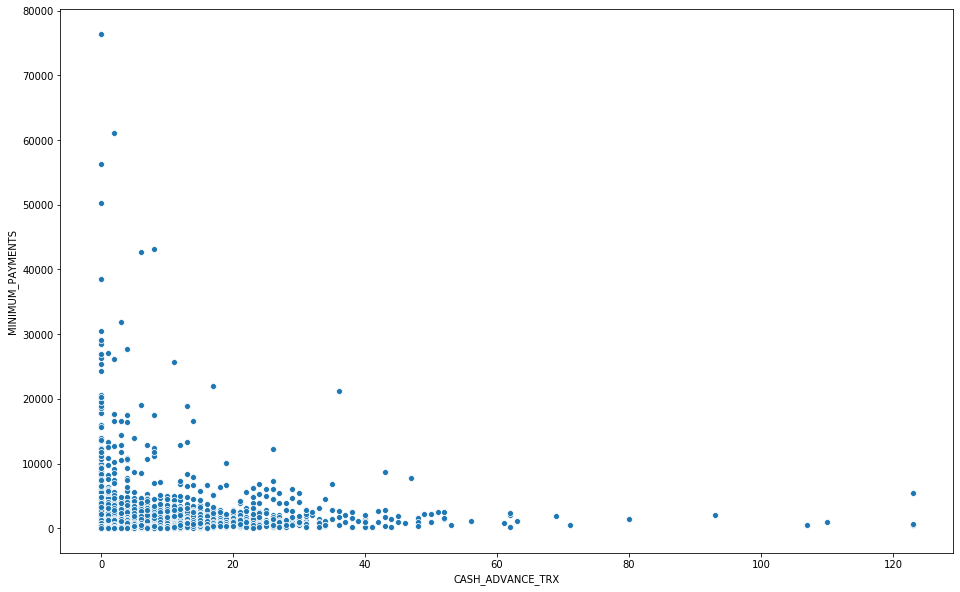

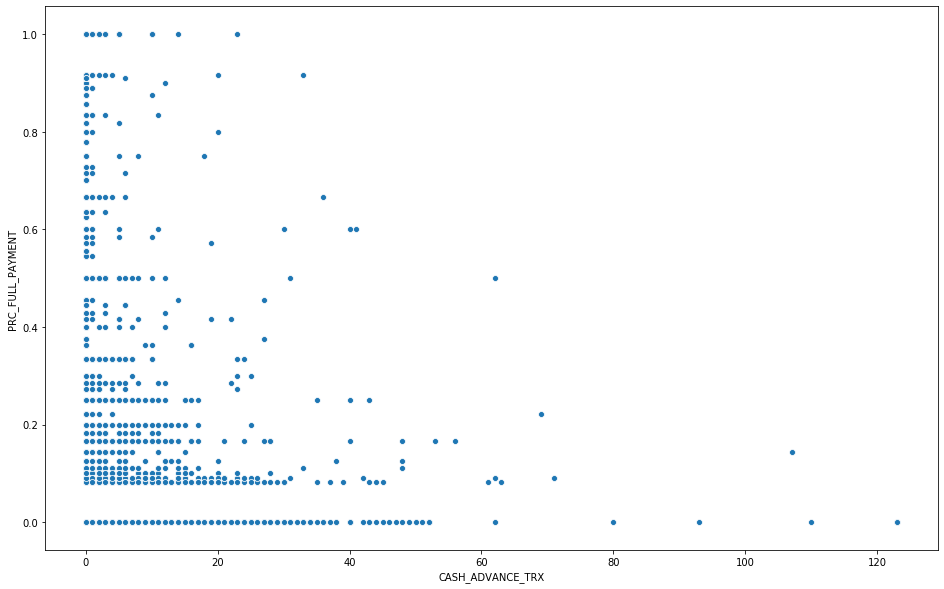

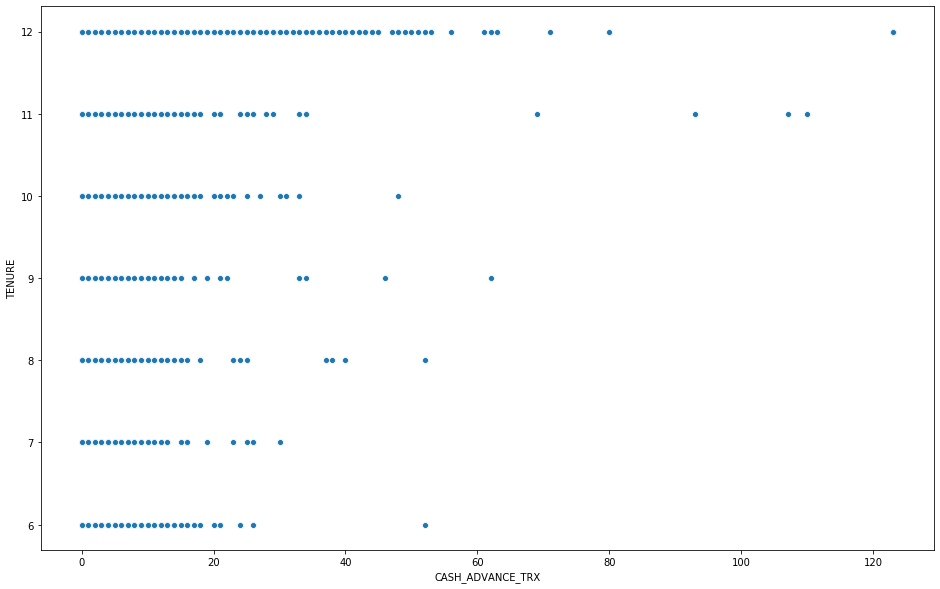

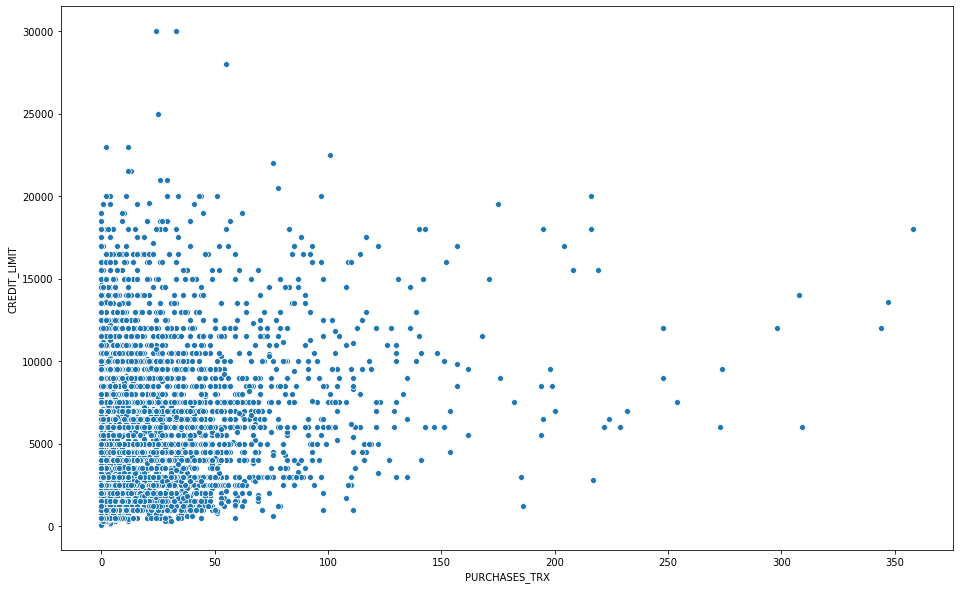

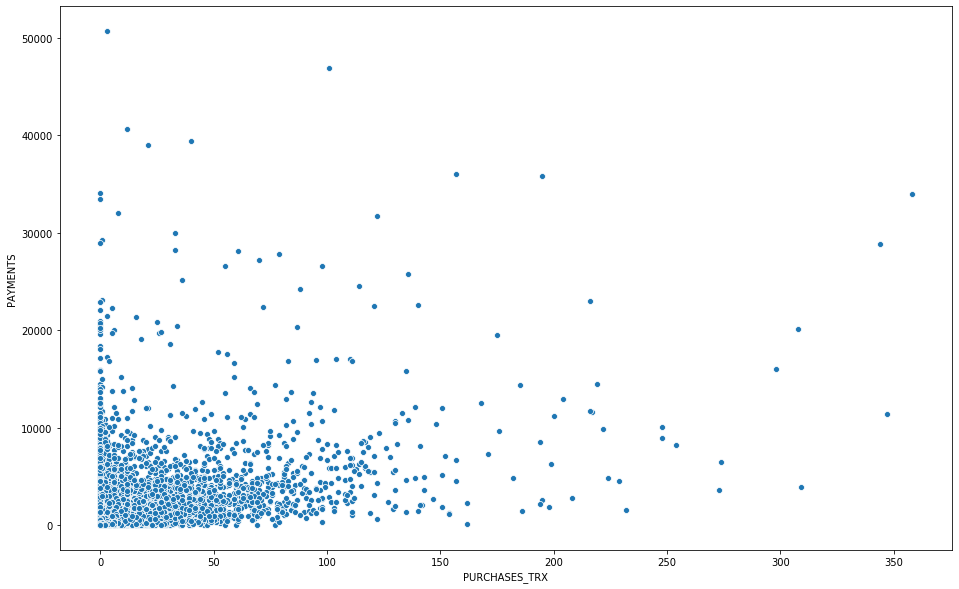

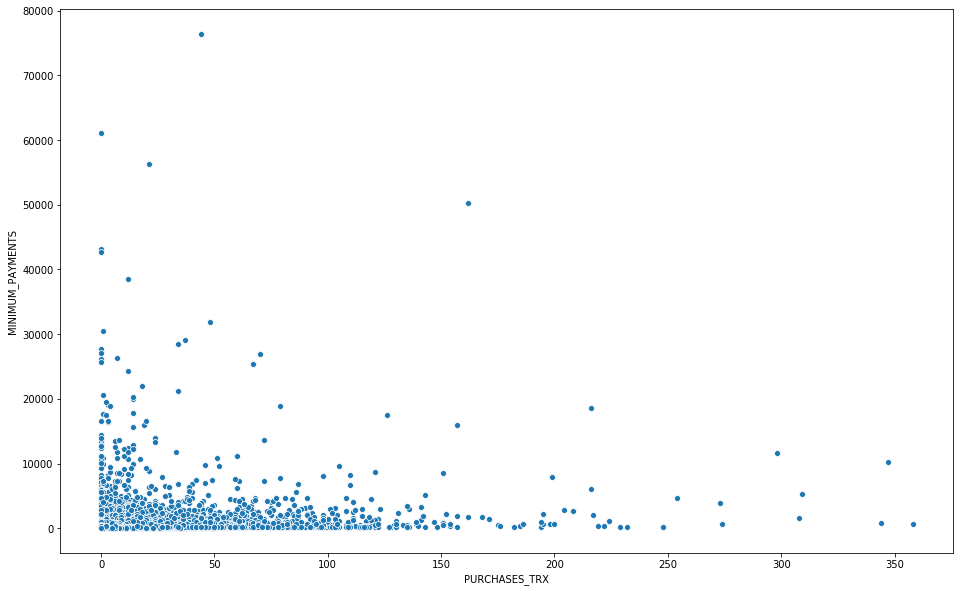

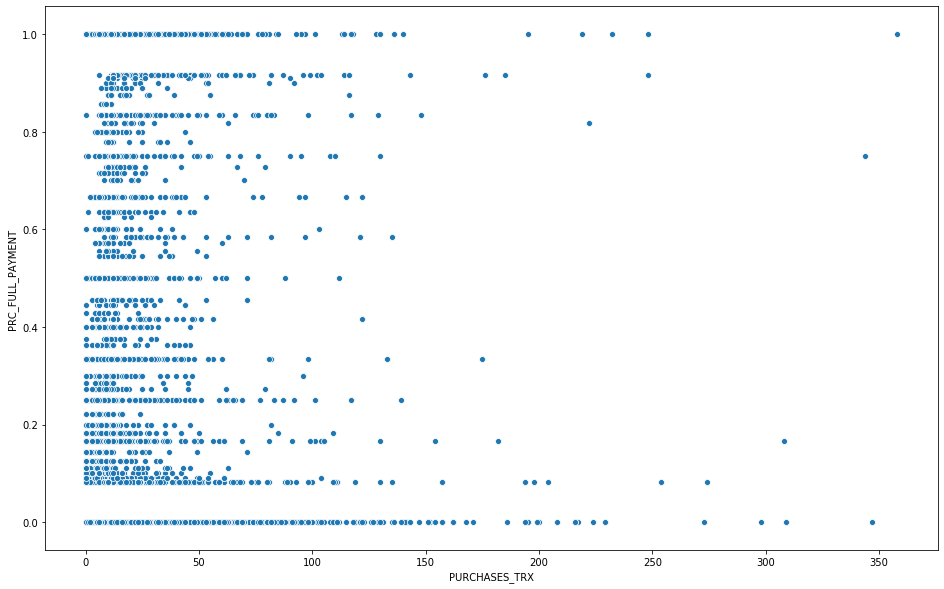

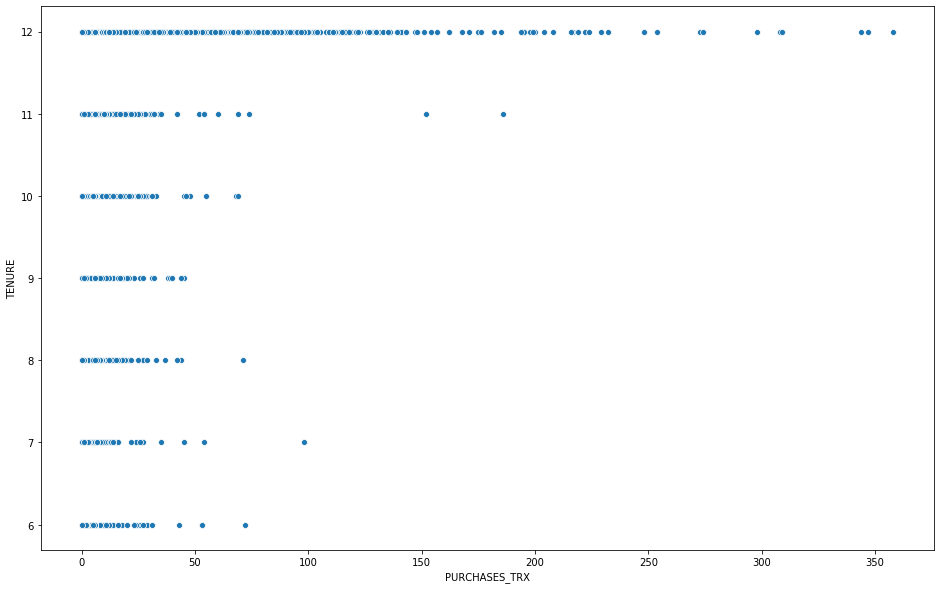

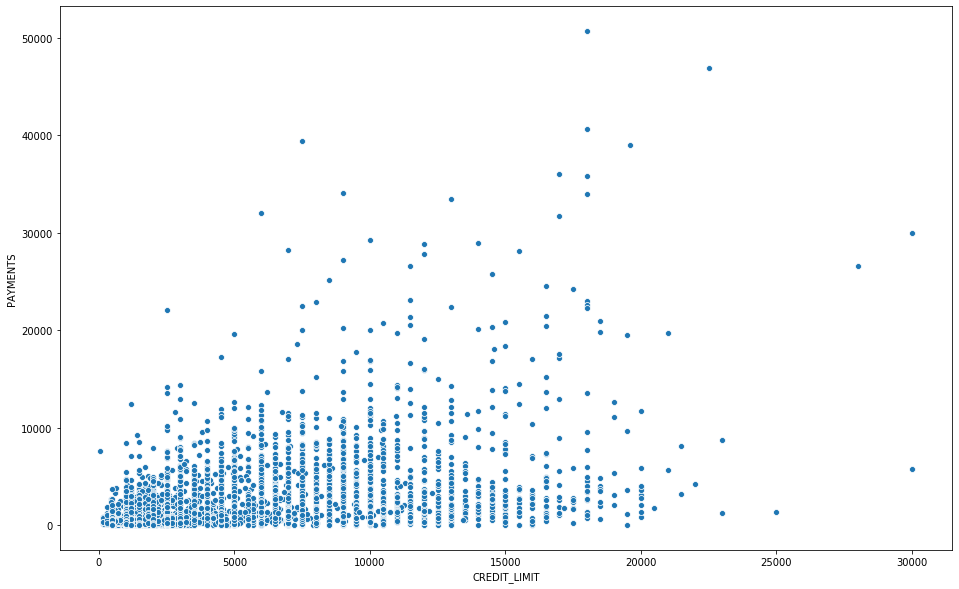

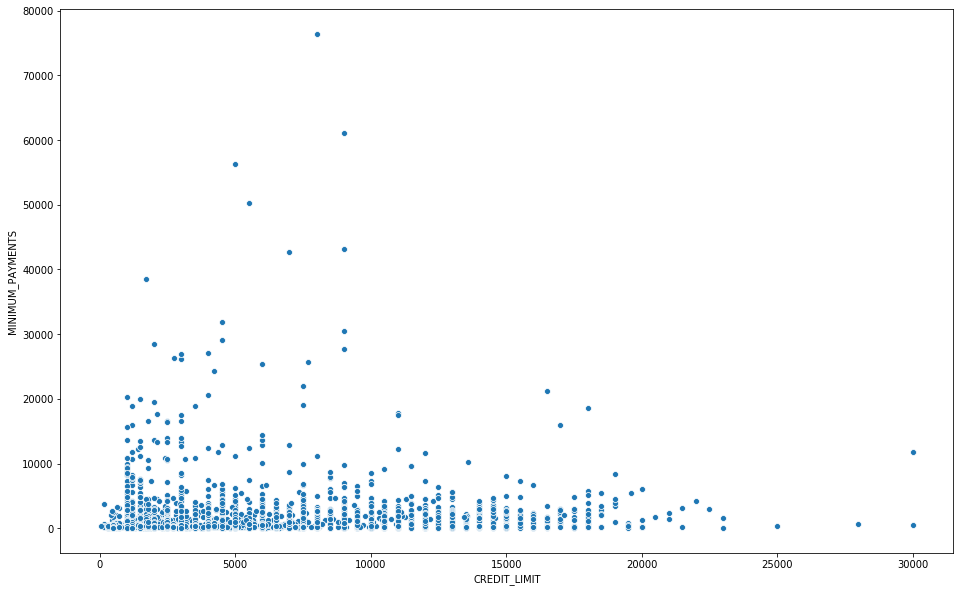

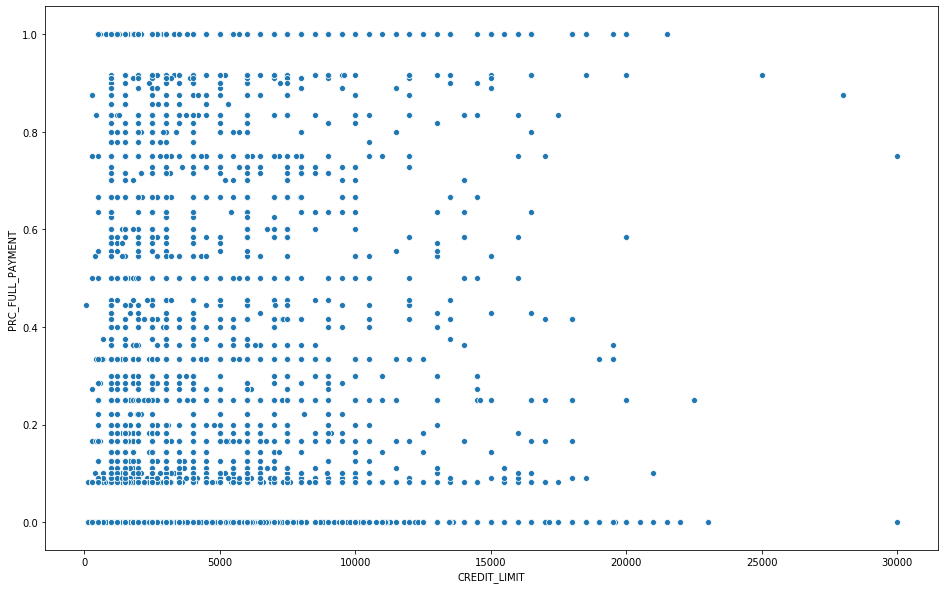

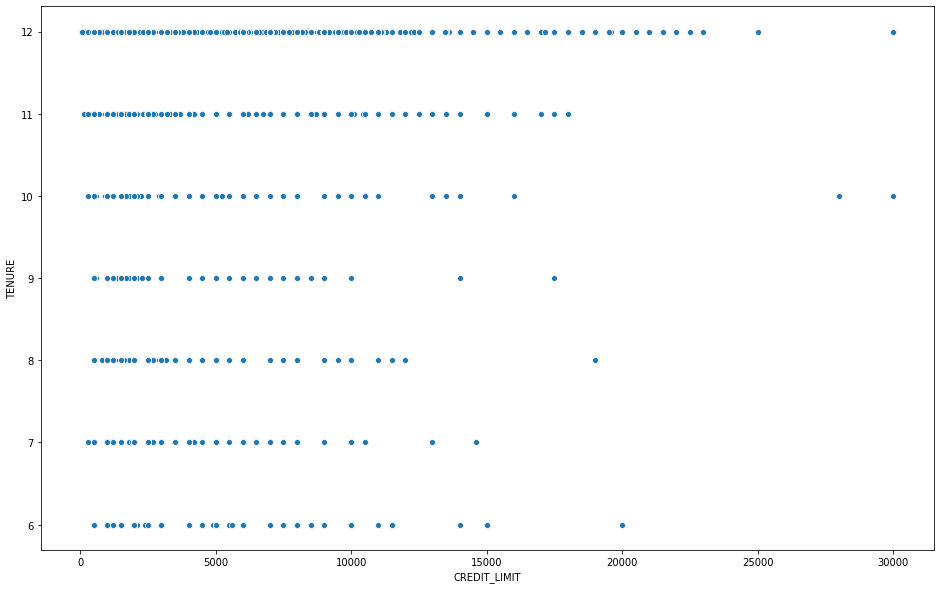

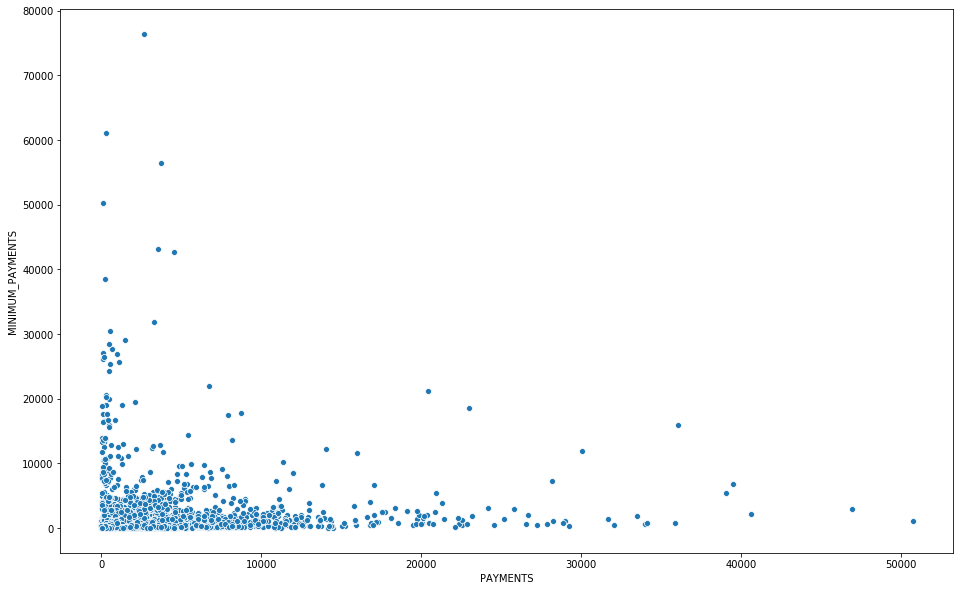

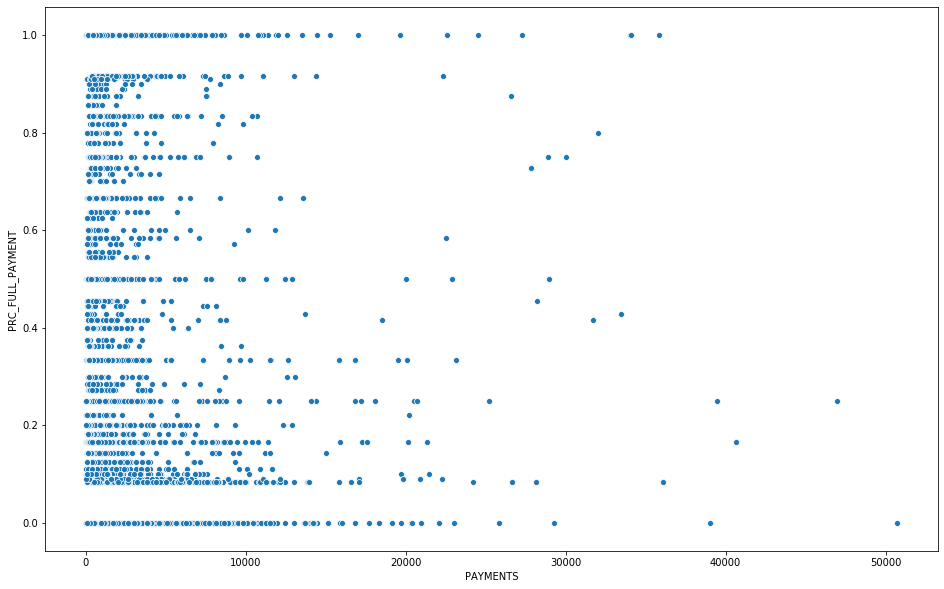

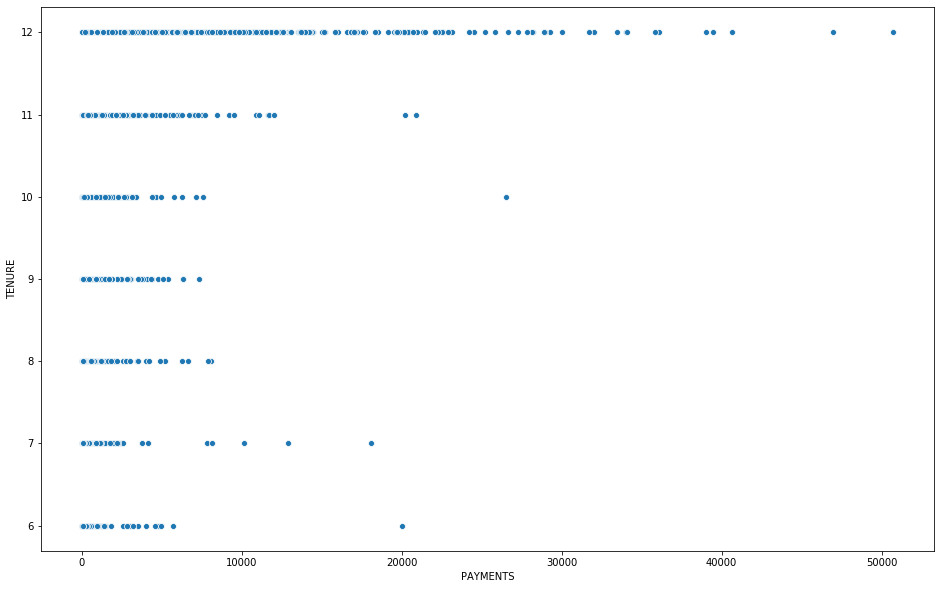

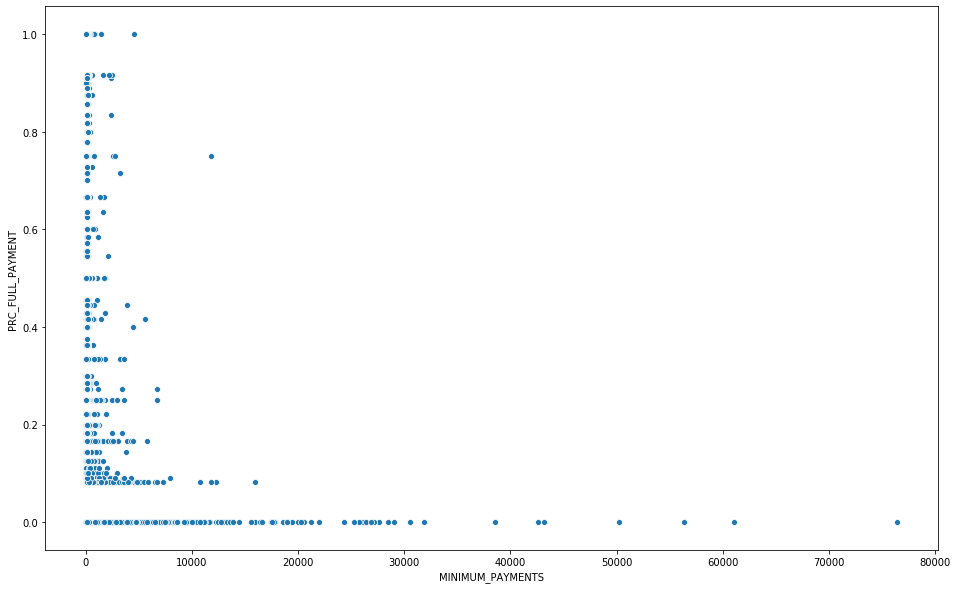

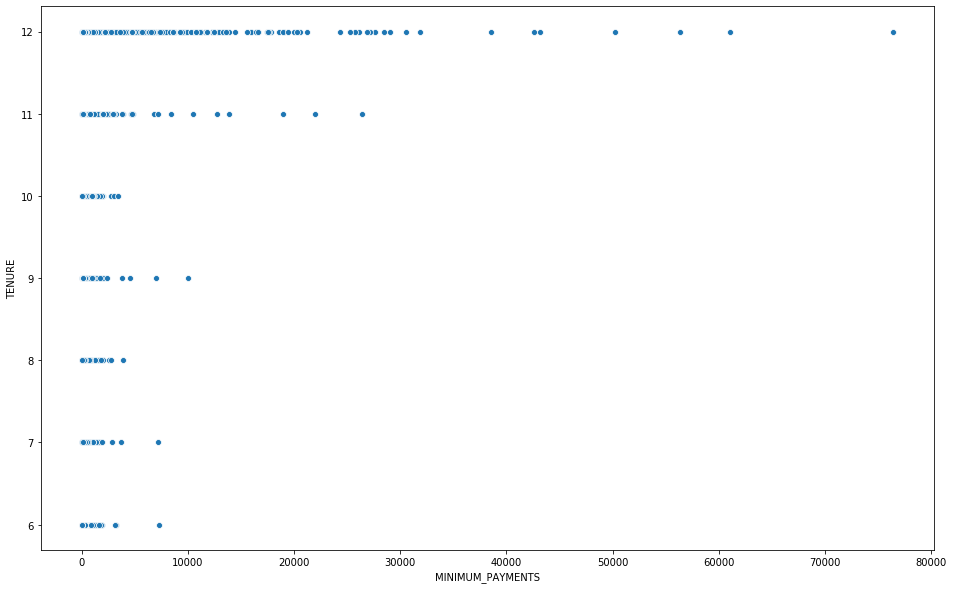

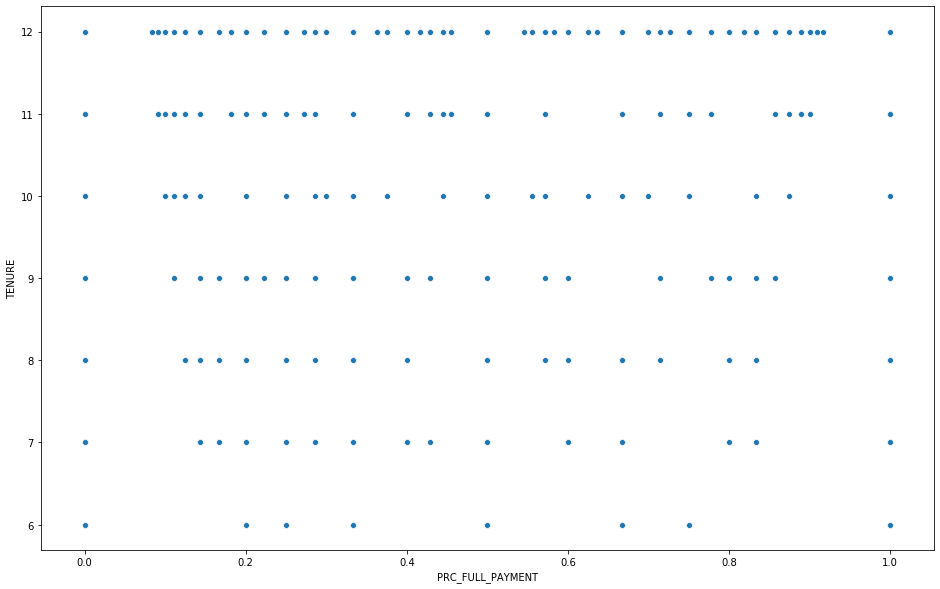

In [20]:
##############################################################
#                   Creating scatter plots                   #
##############################################################


##### Drawing scatter plots for numerical variables against each other #####        
for numvar in range(len(df_final_data_1.columns)):
    for numvarinner in range(numvar+1,len(df_final_data_1.columns)):
        plt.figure(figsize=(16, 10))
        snplot = sns.scatterplot(data=df_final_data_1,x=df_final_data_1.columns[numvar],y=df_final_data_1.columns[numvarinner])
        #snplot.get_figure().savefig('scatterplots\ScatterPlotNumericalVariables_{}_{}.pdf'.format(numerical_variables[numvar],numerical_variables[numvarinner]))
        plt.show()
        

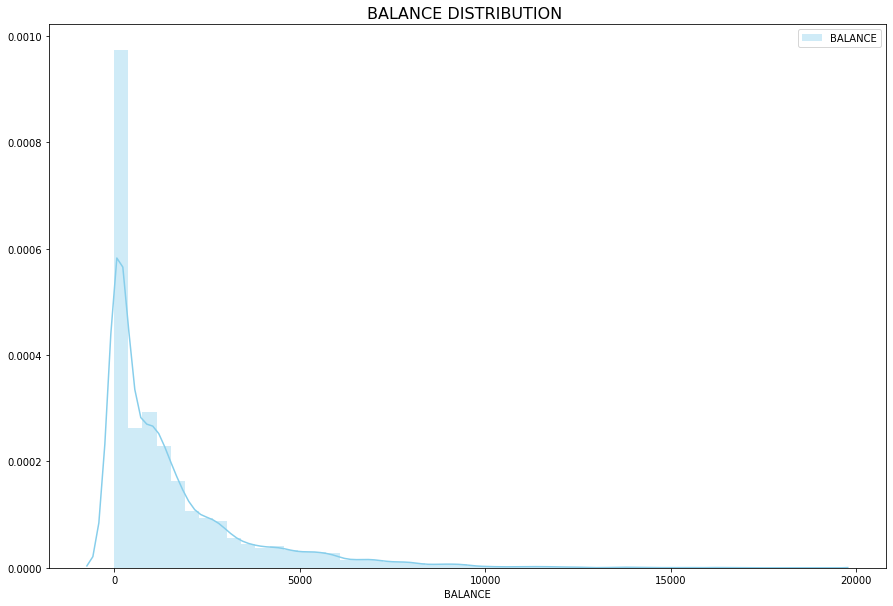

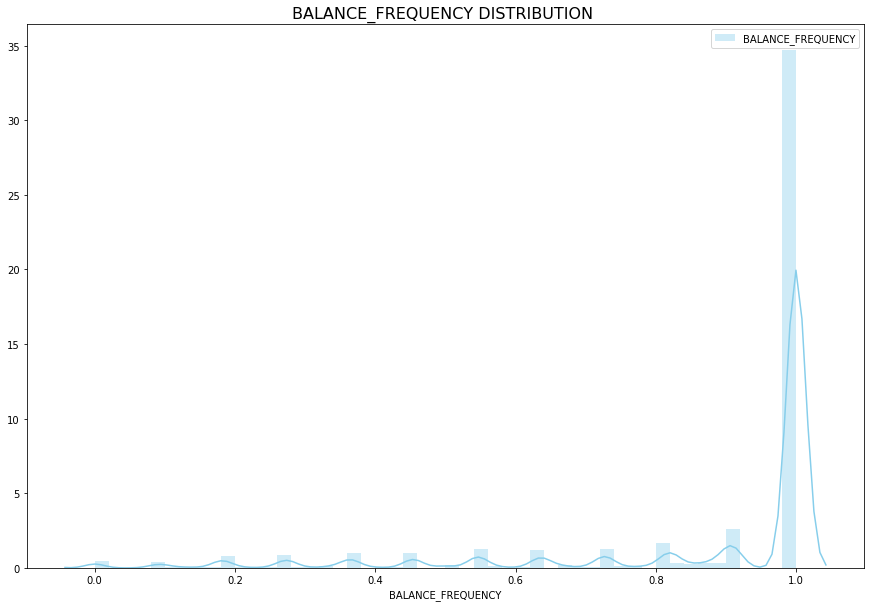

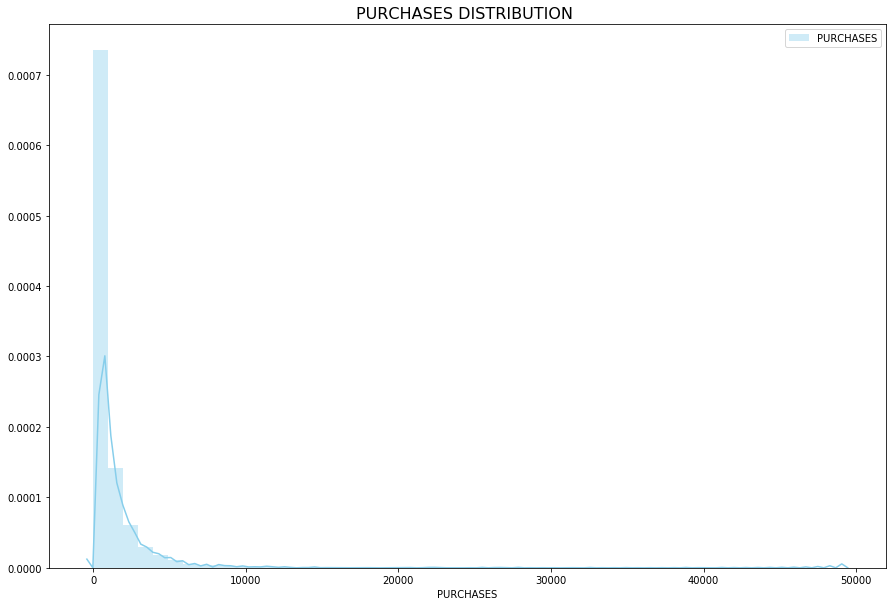

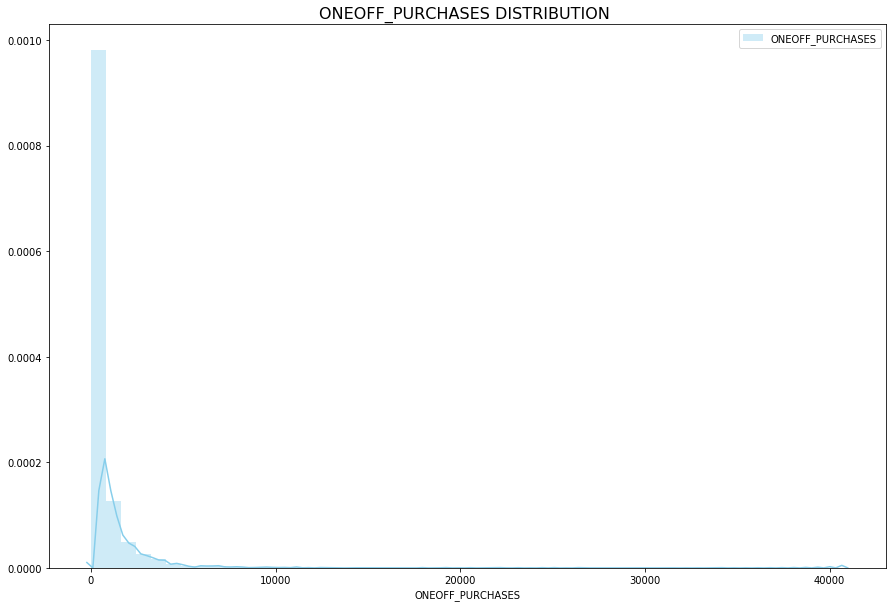

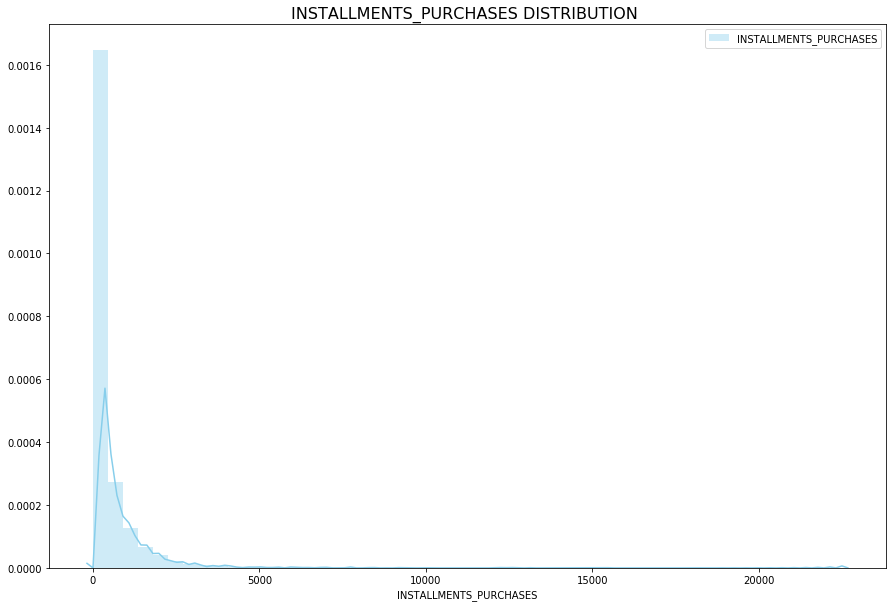

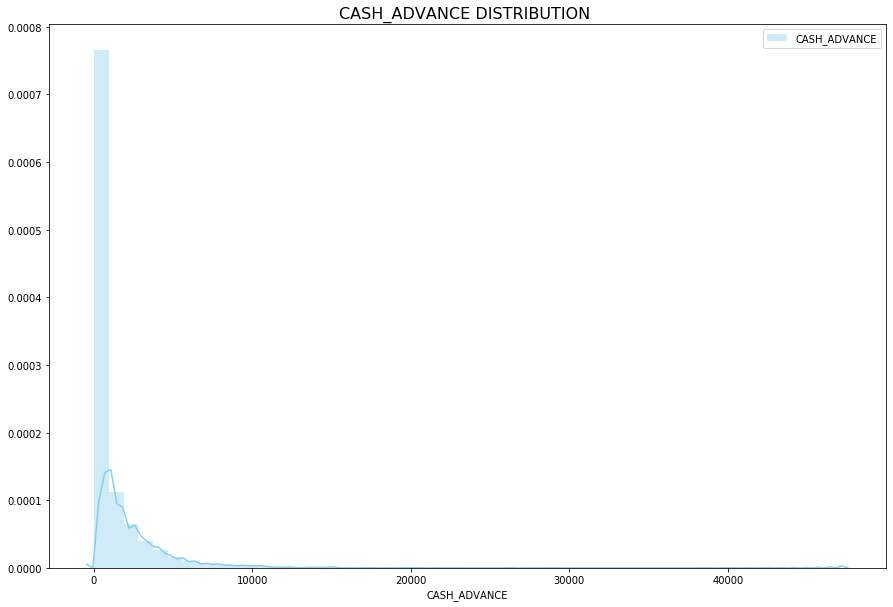

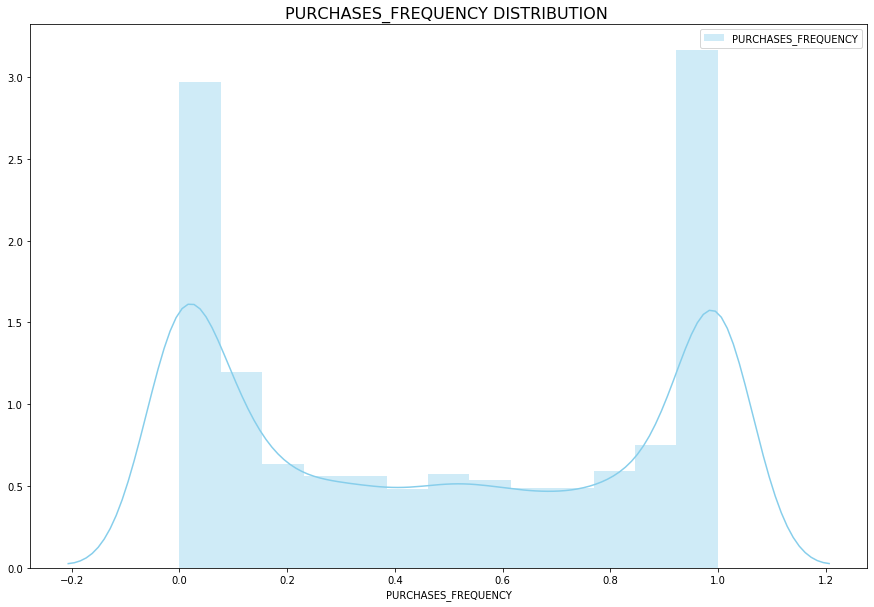

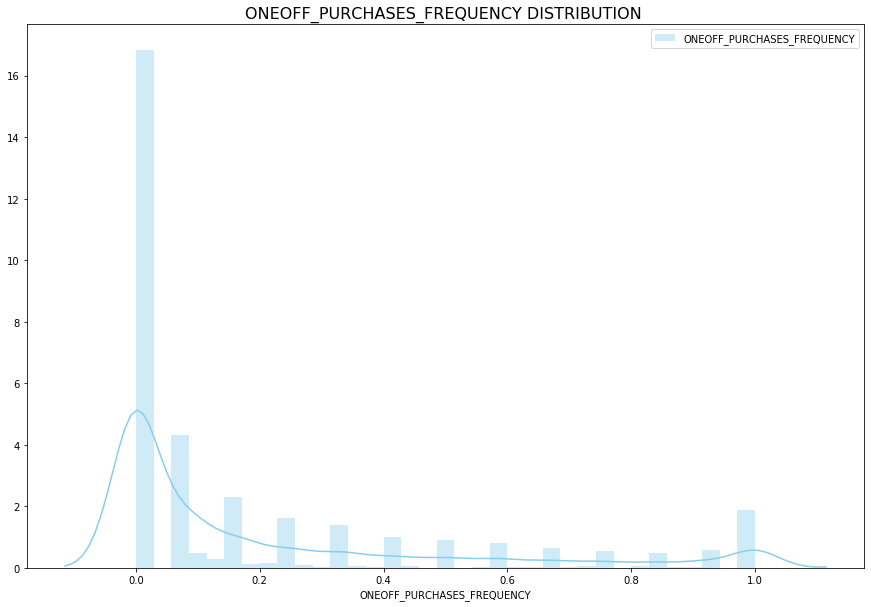

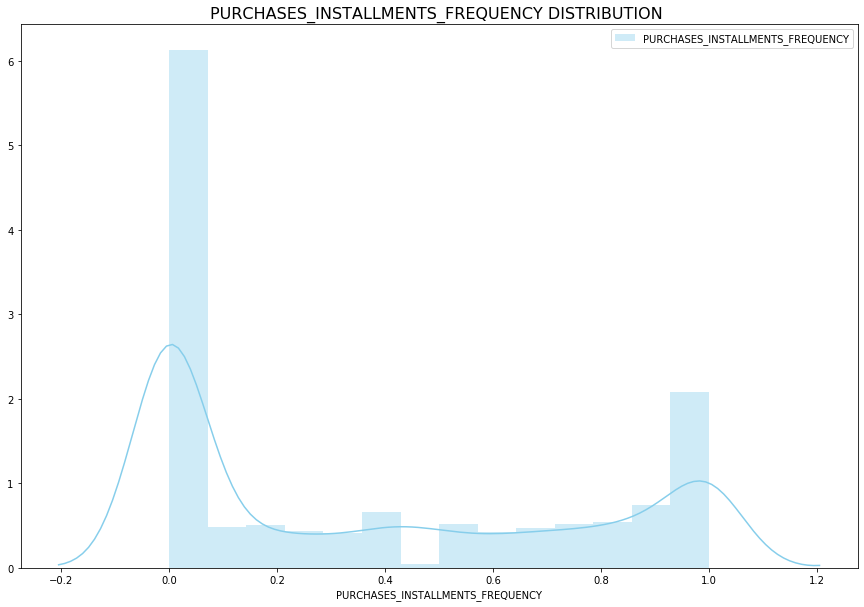

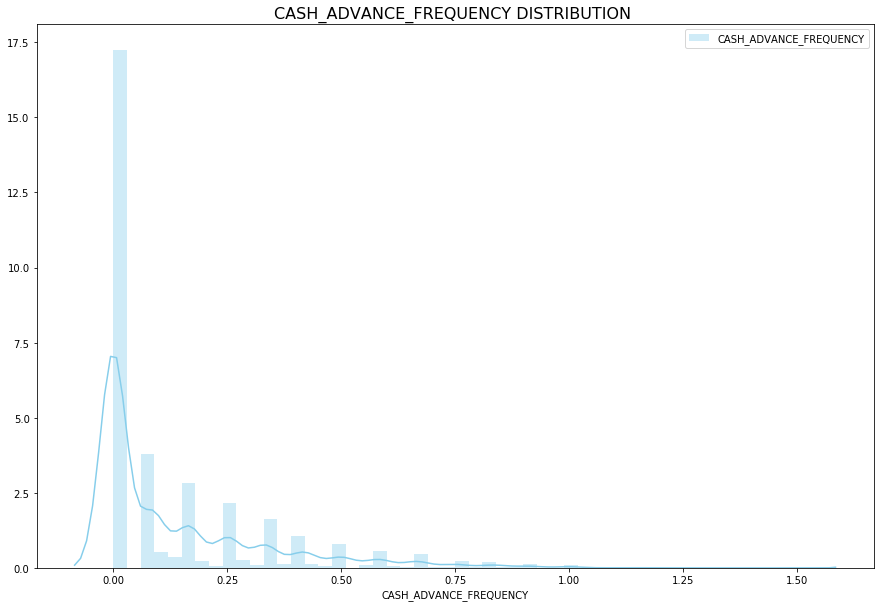

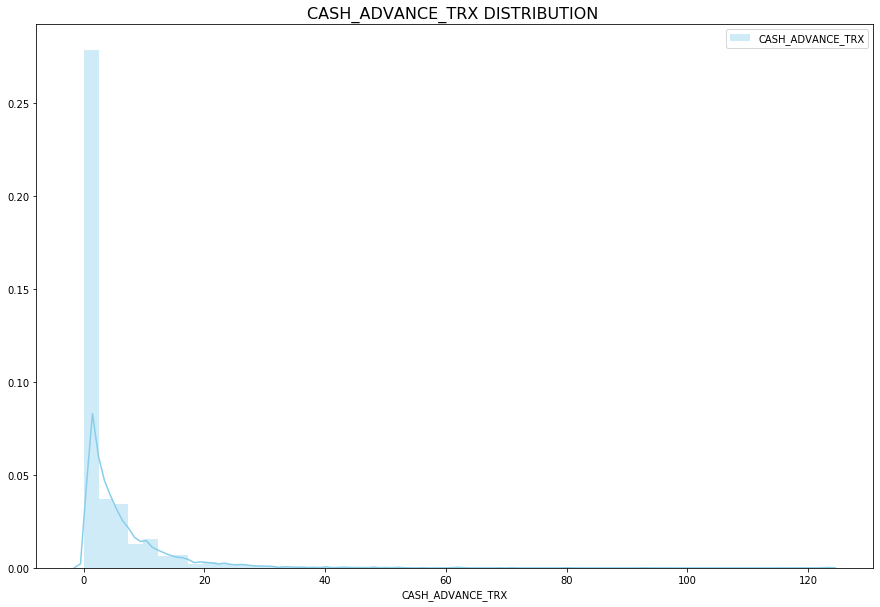

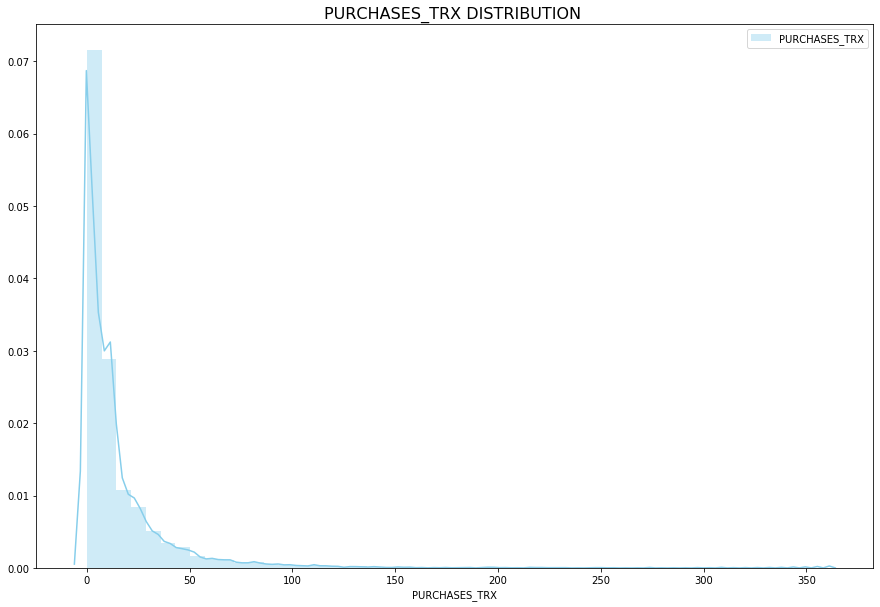

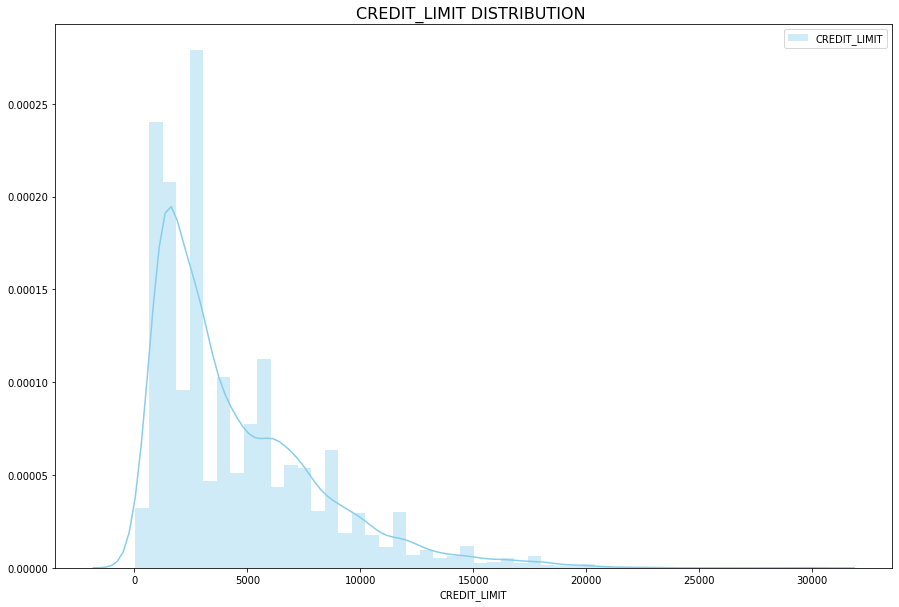

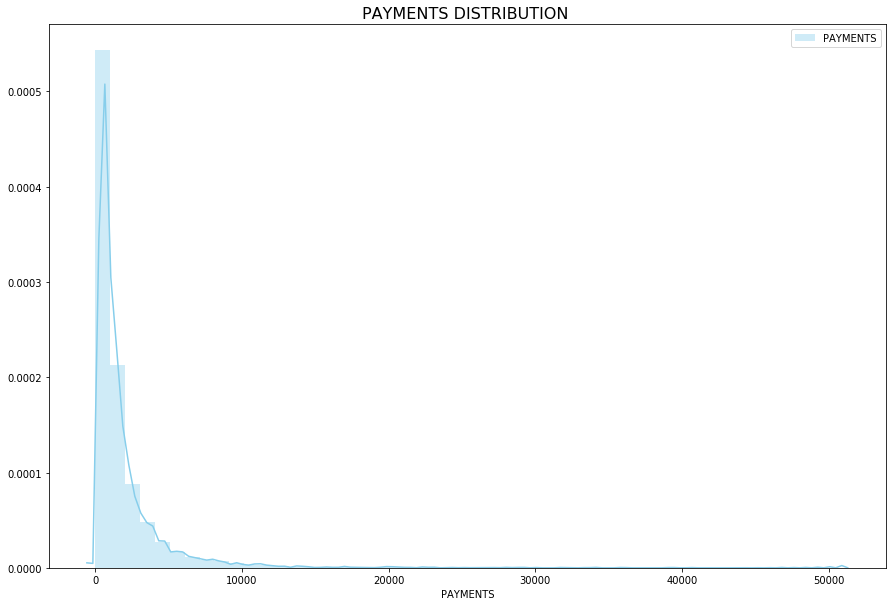

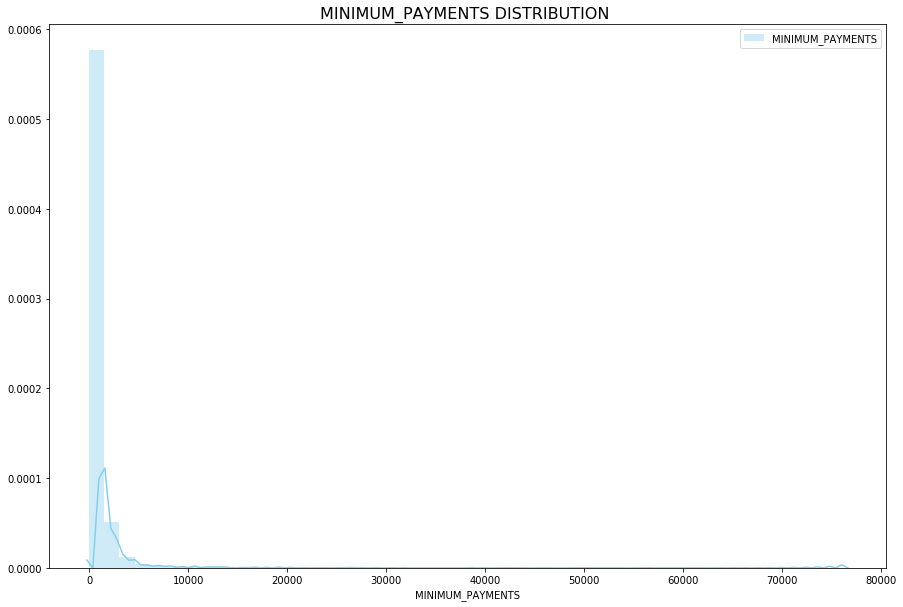

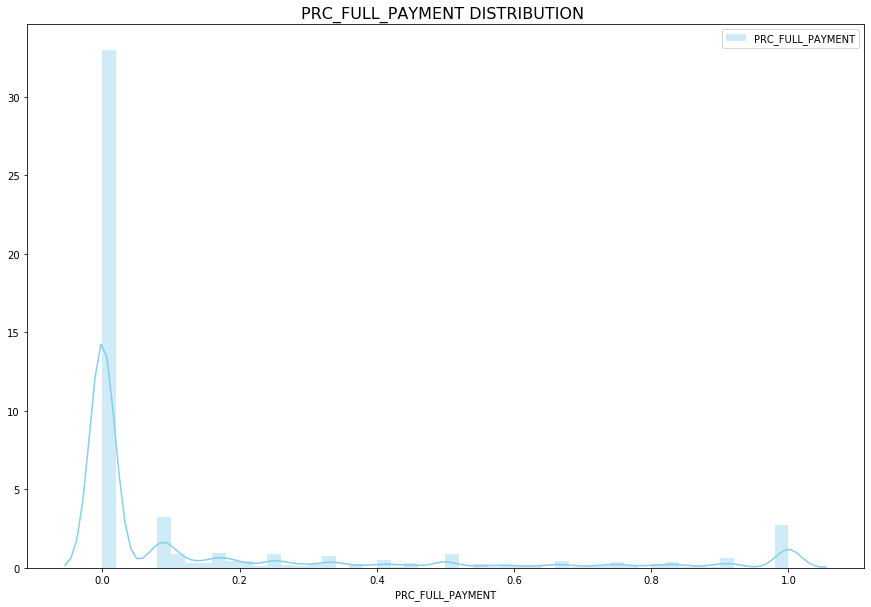

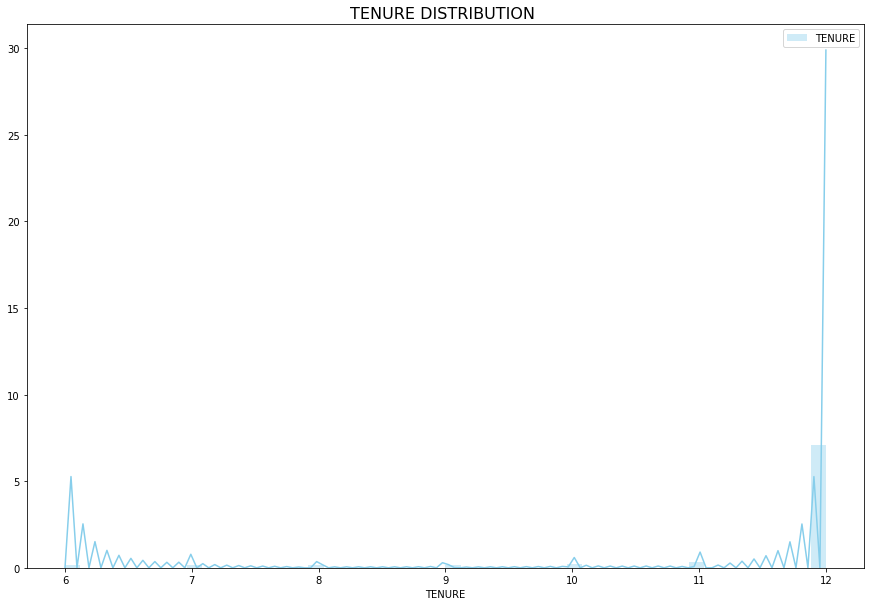

In [21]:
#######################################################################################################
#                               histogram of each numerical variables                                 #
#######################################################################################################

 ###### creating the Histogram plots for numerical variables ######

for column in df_final_data_1.columns:
    plt.figure(figsize=(15, 10))
    plt.title('{} DISTRIBUTION '.format(column), fontsize=16)
    sns.distplot( df_final_data_1[column] , color="skyblue", label=column)
    plt.legend()


In [22]:
df_final_data_1.describe() 

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.452407          0.153715    11.517318  
std     2895.063757       2332.897280          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        299.351881          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [23]:
df_final_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT



Head data post scaling

     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2       

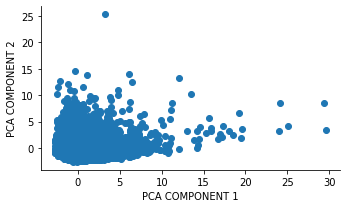

In [24]:
# check for clustering tendency 
scaler = StandardScaler()
for column in df_final_data_1.columns:
    df_final_data_1[[column]]  = scaler.fit_transform(df_final_data_1[[column]])
print("\n\nHead data post scaling\n\n",df_final_data_1.head(5))

X = np.array(df_final_data_1)
print("\n\nhopkins value ",hopkins(X, X.shape[0]))

#Recheck clustering tendency by doing PCA on two components and plotting the scatter plot

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca,columns = ['PCA COMPONENT 1','PCA COMPONENT 2'])
print("\n\nPrinical components formed \n\n",X_pca)
print("\n\nFINAL PLOT OF CLUSTERS BELOW BASED ON PCA")
fg = sns.FacetGrid(data=X_pca,palette='Set1', aspect=1.61)
fg.map(plt.scatter, 'PCA COMPONENT 1', 'PCA COMPONENT 2').add_legend()

EDA Analysis as below from the above plots 

1) Most are continuos values except cust_id which is irrelevant for the cluster analysis

2) Minimum payments and credit limit have null values . One hypothesis is that minimum payments might not be given by some  people who would have paid full. For credit limit , deeper analysis needs to be done

3) There are a lot of outliers across different features as per the box plots . Especially beyond the top quartile . More check needs to be done to find out the reason behind the outliers

4) There is high correlation between a lot of variables like purchases and payments , balance & credit limit etc .This is expected as many of these are interelated 

5) some scatter plots show that there is a tendency to form clusters

6) Clustering tendency also has been confirmed through hopkins parameter which has given a very low score

7) A distribution PCA with 2 components also confirms clustering tendency

<font color="Red" size=5>Hence Clustering tendency is established through the EDA</font>

# CLUSTERING IMPLEMENTATION

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.cluster import KMeans

In [26]:
import os
##print(os.listdir("../input"))


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
import random
import pylab as pl
%matplotlib inline

In [28]:
card = pd.read_csv("CC GENERAL.csv")

In [29]:
card.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [30]:
card.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [31]:
card.isna().sum()



CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
mean_value=card['CREDIT_LIMIT'].mean()
card['CREDIT_LIMIT']=card['CREDIT_LIMIT'].fillna(mean_value)

In [33]:
mean_value=card['MINIMUM_PAYMENTS'].mean()
card['MINIMUM_PAYMENTS']=card['MINIMUM_PAYMENTS'].fillna(mean_value)

In [34]:
card.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

In [35]:
card.cov()



BALANCE  BALANCE_FREQUENCY  \
BALANCE                           4.332775e+06         158.988998   
BALANCE_FREQUENCY                 1.589890e+02           0.056124   
PURCHASES                         8.061523e+05          67.662970   
ONEOFF_PURCHASES                  5.678461e+05          41.023448   
INSTALLMENTS_PURCHASES            2.380664e+05          26.628521   
CASH_ADVANCE                      2.168214e+06          49.378593   
PURCHASES_FREQUENCY              -6.511934e+01           0.021843   
ONEOFF_PURCHASES_FREQUENCY        4.543585e+01           0.014306   
PURCHASES_INSTALLMENTS_FREQUENCY -5.227359e+01           0.016579   
CASH_ADVANCE_FREQUENCY            1.871258e+02           0.009097   
CASH_ADVANCE_TRX                  5.471365e+03           0.228864   
PURCHASES_TRX                     7.985774e+03           1.116684   
CREDIT_LIMIT                      4.023757e+06          82.575054   
PAYMENTS                          1.945257e+06          44.585787   
MINIMUM_PAYMENTS                  1.912737e+06          63.079983   
PRC_FULL_PAYMENT                 -1.941972e+02          -0.006589   
TENURE                            2.025045e+02           0.037976   

                                     PURCHASES  ONEOFF_PURCHASES  \
BALANCE                           8.061523e+05      5.678461e+05   
BALANCE_FREQUENCY                 6.766297e+01      4.102345e+01   
PURCHASES                         4.565208e+06      3.251657e+06   
ONEOFF_PURCHASES                  3.251657e+06      2.755228e+06   
INSTALLMENTS_PURCHASES            1.313723e+06      4.962960e+05   
CASH_ADVANCE                     -2.306495e+05     -1.090465e+05   
PURCHASES_FREQUENCY               3.370449e+02      1.765093e+02   
ONEOFF_PURCHASES_FREQUENCY        3.177167e+02      2.599284e+02   
PURCHASES_INSTALLMENTS_FREQUENCY  2.679795e+02      8.426529e+01   
CASH_ADVANCE_FREQUENCY           -5.137159e+01     -2.744721e+01   
CASH_ADVANCE_TRX                 -9.795351e+02     -5.234981e+02   
PURCHASES_TRX                     3.662376e+04      2.250879e+04   
CREDIT_LIMIT                      2.775135e+06      1.931018e+06   
PAYMENTS                          3.731605e+06      2.726109e+06   
MINIMUM_PAYMENTS                  4.656663e+05      1.879996e+05   
PRC_FULL_PAYMENT                  1.127304e+02      6.445843e+01   
TENURE                            2.467432e+02      1.425079e+02   

                                  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
BALANCE                                     2.380664e+05  2.168214e+06   
BALANCE_FREQUENCY                           2.662852e+01  4.937859e+01   
PURCHASES                                   1.313723e+06 -2.306495e+05   
ONEOFF_PURCHASES                            4.962960e+05 -1.090465e+05   
INSTALLMENTS_PURCHASES                      8.178274e+05 -1.218410e+05   
CASH_ADVANCE                               -1.218410e+05  4.398096e+06   
PURCHASES_FREQUENCY                         1.605865e+02 -1.814012e+02   
ONEOFF_PURCHASES_FREQUENCY                  5.774794e+01 -5.427847e+01   
PURCHASES_INSTALLMENTS_FREQUENCY            1.837934e+02 -1.475899e+02   
CASH_ADVANCE_FREQUENCY                     -2.394664e+01  2.637828e+02   
CASH_ADVANCE_TRX                           -4.567073e+02  9.396057e+03   
PURCHASES_TRX                               1.411968e+04 -3.954113e+03   
CREDIT_LIMIT                                8.440096e+05  2.319620e+06   
PAYMENTS                                    1.005576e+06  2.751800e+06   
MINIMUM_PAYMENTS                            2.775494e+05  6.804697e+05   
PRC_FULL_PAYMENT                            4.829291e+01 -9.381340e+01   
TENURE                                      1.042590e+02 -1.917325e+02   

                                  PURCHASES_FREQUENCY  \
BALANCE                                    -65.119343   
BALANCE_FREQUENCY                            0.021843   
PURCHASES                                  337.044946   
ONEOFF_PUR

In [36]:
a = card.corr()

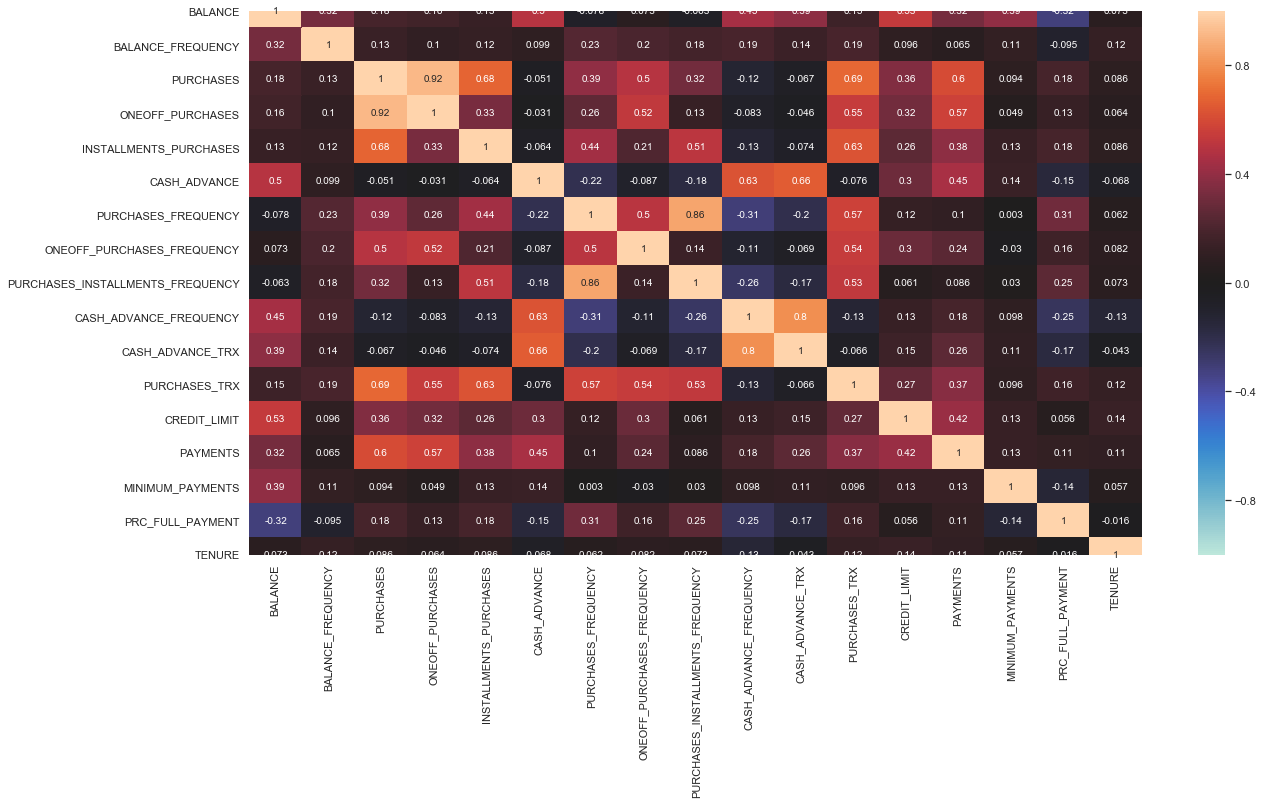

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(a,vmin=-1,vmax=1,center=0,annot=True)

In [38]:
# Drop Cust Id Column
df = card.drop('CUST_ID', axis=1)
df.head(3)



BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12

In [39]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.24943448, -0.42489974, -0.35693402, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.13432467, -0.46955188, -0.35693402, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.51808382, -0.10766823,  0.10888851, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.18547673, -0.40196519, -0.35693402, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.18547673, -0.46955188, -0.35693402, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.88903307,  0.04214581,  0.30173158, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# Build K-means

In [40]:

kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=6, random_state=0)

In [41]:
kmeans.labels_

array([0, 1, 1, ..., 0, 0, 0])

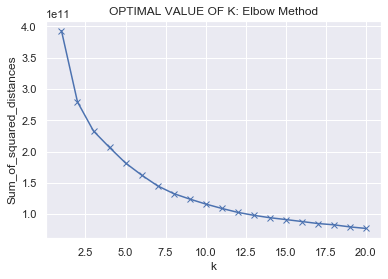

In [42]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('OPTIMAL VALUE OF K: Elbow Method')
plt.show()

In [43]:
km_sample = KMeans(n_clusters=8)
km_sample.fit(df)



KMeans()

In [44]:
##Silhouette
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df)
    centers = km.cluster_centers_

    score = silhouette_score(df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.511235265009952
For n_clusters = 3, silhouette score is 0.4662895128060979
For n_clusters = 4, silhouette score is 0.398138272259527
For n_clusters = 5, silhouette score is 0.3954888675952776
For n_clusters = 6, silhouette score is 0.37235358932556667
For n_clusters = 7, silhouette score is 0.36977346909156983
For n_clusters = 8, silhouette score is 0.3810874517610816
For n_clusters = 9, silhouette score is 0.3527091565664478
For n_clusters = 10, silhouette score is 0.3573343940415327
For n_clusters = 11, silhouette score is 0.3651668700683567
For n_clusters = 12, silhouette score is 0.33807891701980874
For n_clusters = 13, silhouette score is 0.311751046856513
For n_clusters = 14, silhouette score is 0.25985158965512595
For n_clusters = 15, silhouette score is 0.24118434643289174
For n_clusters = 16, silhouette score is 0.2853920068970157
For n_clusters = 17, silhouette score is 0.2641076956470438
For n_clusters = 18, silhouette score is 0.257

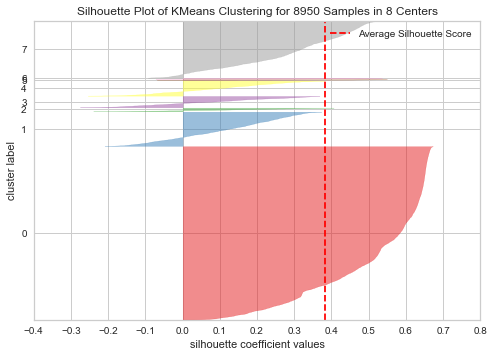

In [45]:
## Visualization using Yellowbrick library
##Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Initiate clustering model and visualizer
km = KMeans (n_clusters=8)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(df) # Fit training data into the visualizer
visualizer.poof() # Draw

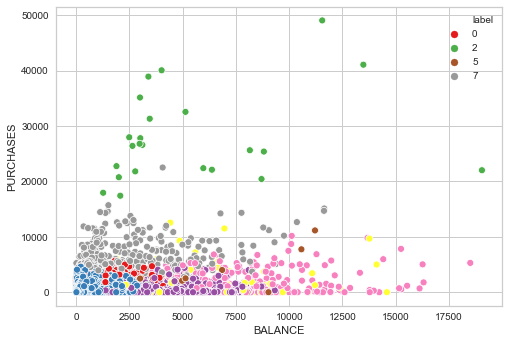

In [46]:
labels_sample = km_sample.labels_
df['label'] = labels_sample
sns.set_palette('Set2')
sns.scatterplot(df['BALANCE'],df['PURCHASES'],hue=df['label'],palette='Set1')


In [47]:
km_sample = KMeans(n_clusters=9)
km_sample.fit(df)

KMeans(n_clusters=9)

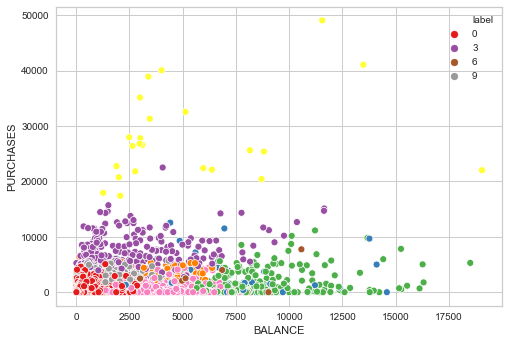

In [48]:
labels_sample = km_sample.labels_
df['label'] = labels_sample
sns.set_palette('Set2')
sns.scatterplot(df['BALANCE'],df['PURCHASES'],hue=df['label'],palette='Set1')

## Gaussian Mixture Model

In [49]:
data = pd.read_csv('CC GENERAL.csv')
data.drop("CUST_ID", axis = 1, inplace = True)
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [50]:
mp_mean = data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'].fillna(value = mp_mean, inplace = True)
data['CREDIT_LIMIT'].fillna(value = mp_mean, inplace = True)
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

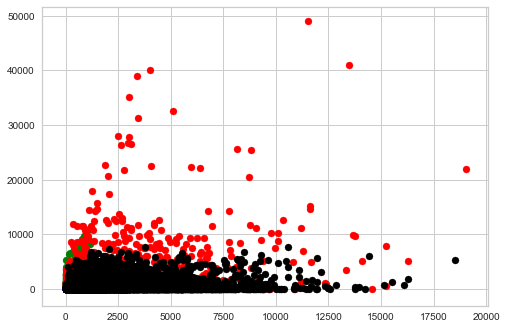

In [51]:

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns =data.columns 

color=['blue','green','red', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["BALANCE"],data["PURCHASES"],c=color[k])
plt.show()

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN,AgglomerativeClustering, KMeans

In [53]:
datacredit = pd.read_csv('CC GENERAL.csv')
datacredit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [54]:
## let's see the columns with nas
datacredit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [55]:
## We fill the na's on the dataset with the mean of each columns 
mp_mean = datacredit['MINIMUM_PAYMENTS'].mean()
datacredit['MINIMUM_PAYMENTS'].fillna(value = mp_mean, inplace = True)
datacredit['CREDIT_LIMIT'].fillna(value = mp_mean, inplace = True)

In [56]:
# after the imputation 
datacredit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [57]:
datacredit.drop("CUST_ID", axis = 1, inplace = True)
datacredit.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [58]:
datacredit.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.043837   
std                  0.200121          6.824647      24.857649   3638.814746   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [59]:
## standrised data
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()

copiadata = escala.fit_transform(datacredit)
datacopia = pd.DataFrame(copiadata, columns= datacredit.columns)
datacopia.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960268   
1                0.573963          0.110074      -0.591796      0.688712   
2               -0.675349         -0.476070      -0.109020      0.826127   
3               -0.258913         -0.329534      -0.551565      0.826127   
4               -0.675349         -0.476070      -0.551565     -0.905302   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979     -3.109675e-01         -0.525551  0.36068  
1  0.818642      8.931021e-02          0.234227  0.36068  
2 -0.383805     -1.016632e-01         -0.525551  0.36068  
3 -0.598688     -5.366135e-16         -0.525551  0.36068  
4 -0.364368     -2.657913e-01         -0.525551  0.36068

In [60]:
enlaces = linkage(datacopia, method = "ward") # ward, complete, average
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78910000e+04, 1.78950000e+04, 1.51184170e+02, 3.41800000e+03],
       [1.78900000e+04, 1.78940000e+04, 1.59722203e+02, 5.53200000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.04443567e+02, 8.95000000e+03]])

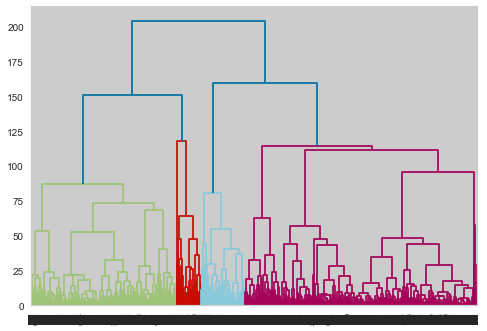

In [61]:
dendrogram(enlaces);

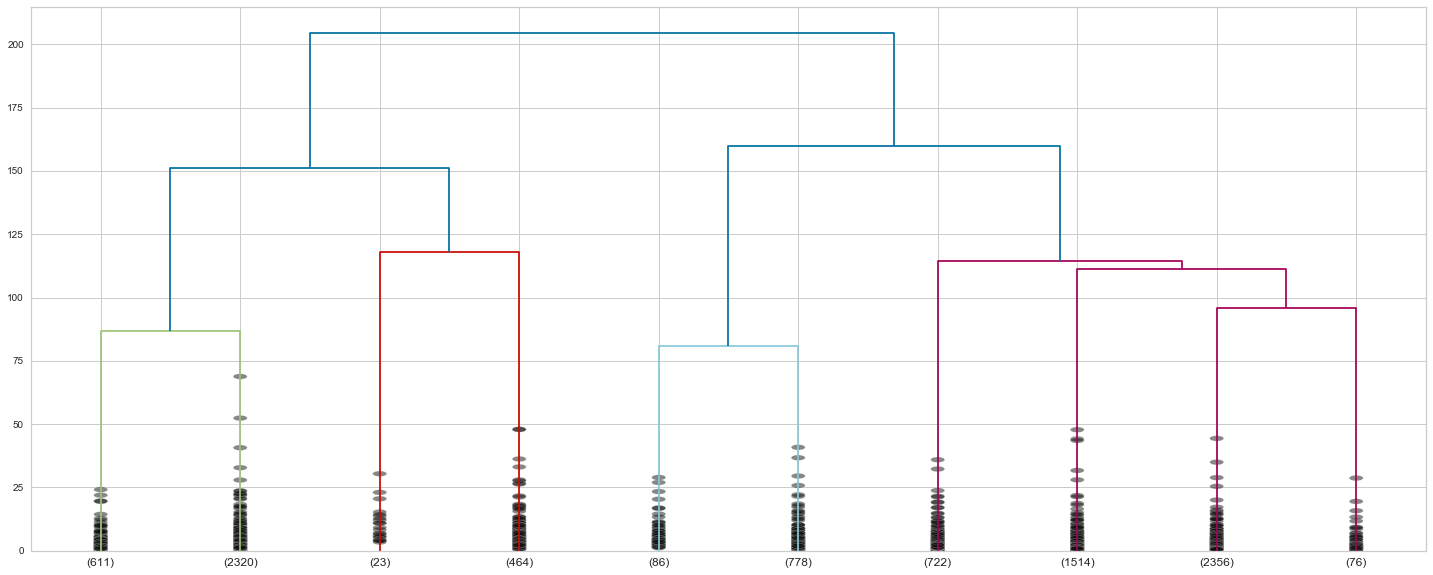

In [62]:
## let see minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True)

In [63]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [64]:
## inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[21.97407842, 16.58687827, 31.        ,  3.09829443],
       [23.05749656, 16.53249556, 28.        ,  3.50451442],
       [25.88667273, 20.61648886, 31.        ,  2.9564128 ],
       [21.76025867, 19.74341974, 28.        ,  3.75737336],
       [31.50763933, 24.68266662, 30.        ,  3.23612388],
       [37.02639104, 27.87719018, 31.        ,  2.77866387],
       [28.78505539, 22.40517171, 26.        ,  3.97502651],
       [40.79159594, 32.02223742, 31.        ,  3.44737229],
       [47.04766726, 34.53353805, 30.        ,  3.26275679],
       [66.87810531, 45.03141202, 31.        ,  3.05487782]])

[204.44356716 159.72220287 151.18416997 117.84620684 114.48773208
 111.38380613  95.94365809  86.83752422  80.99586571  73.36511091]
[ 36.18333139 -24.79993023  29.97948837   0.25454881 -12.33622208
   6.33401416   3.26447536  -1.78909629]


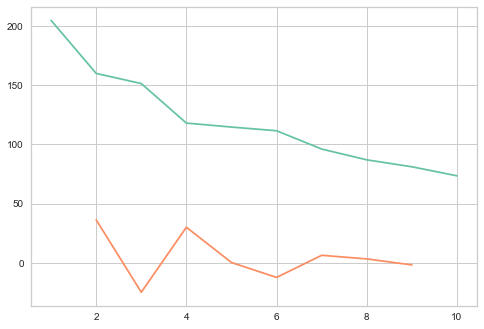

In [65]:
## método del codo 
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [66]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacredit.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        4  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        4  
4   678.334763        244.791237          0.000000      12        4

(-5, 30)

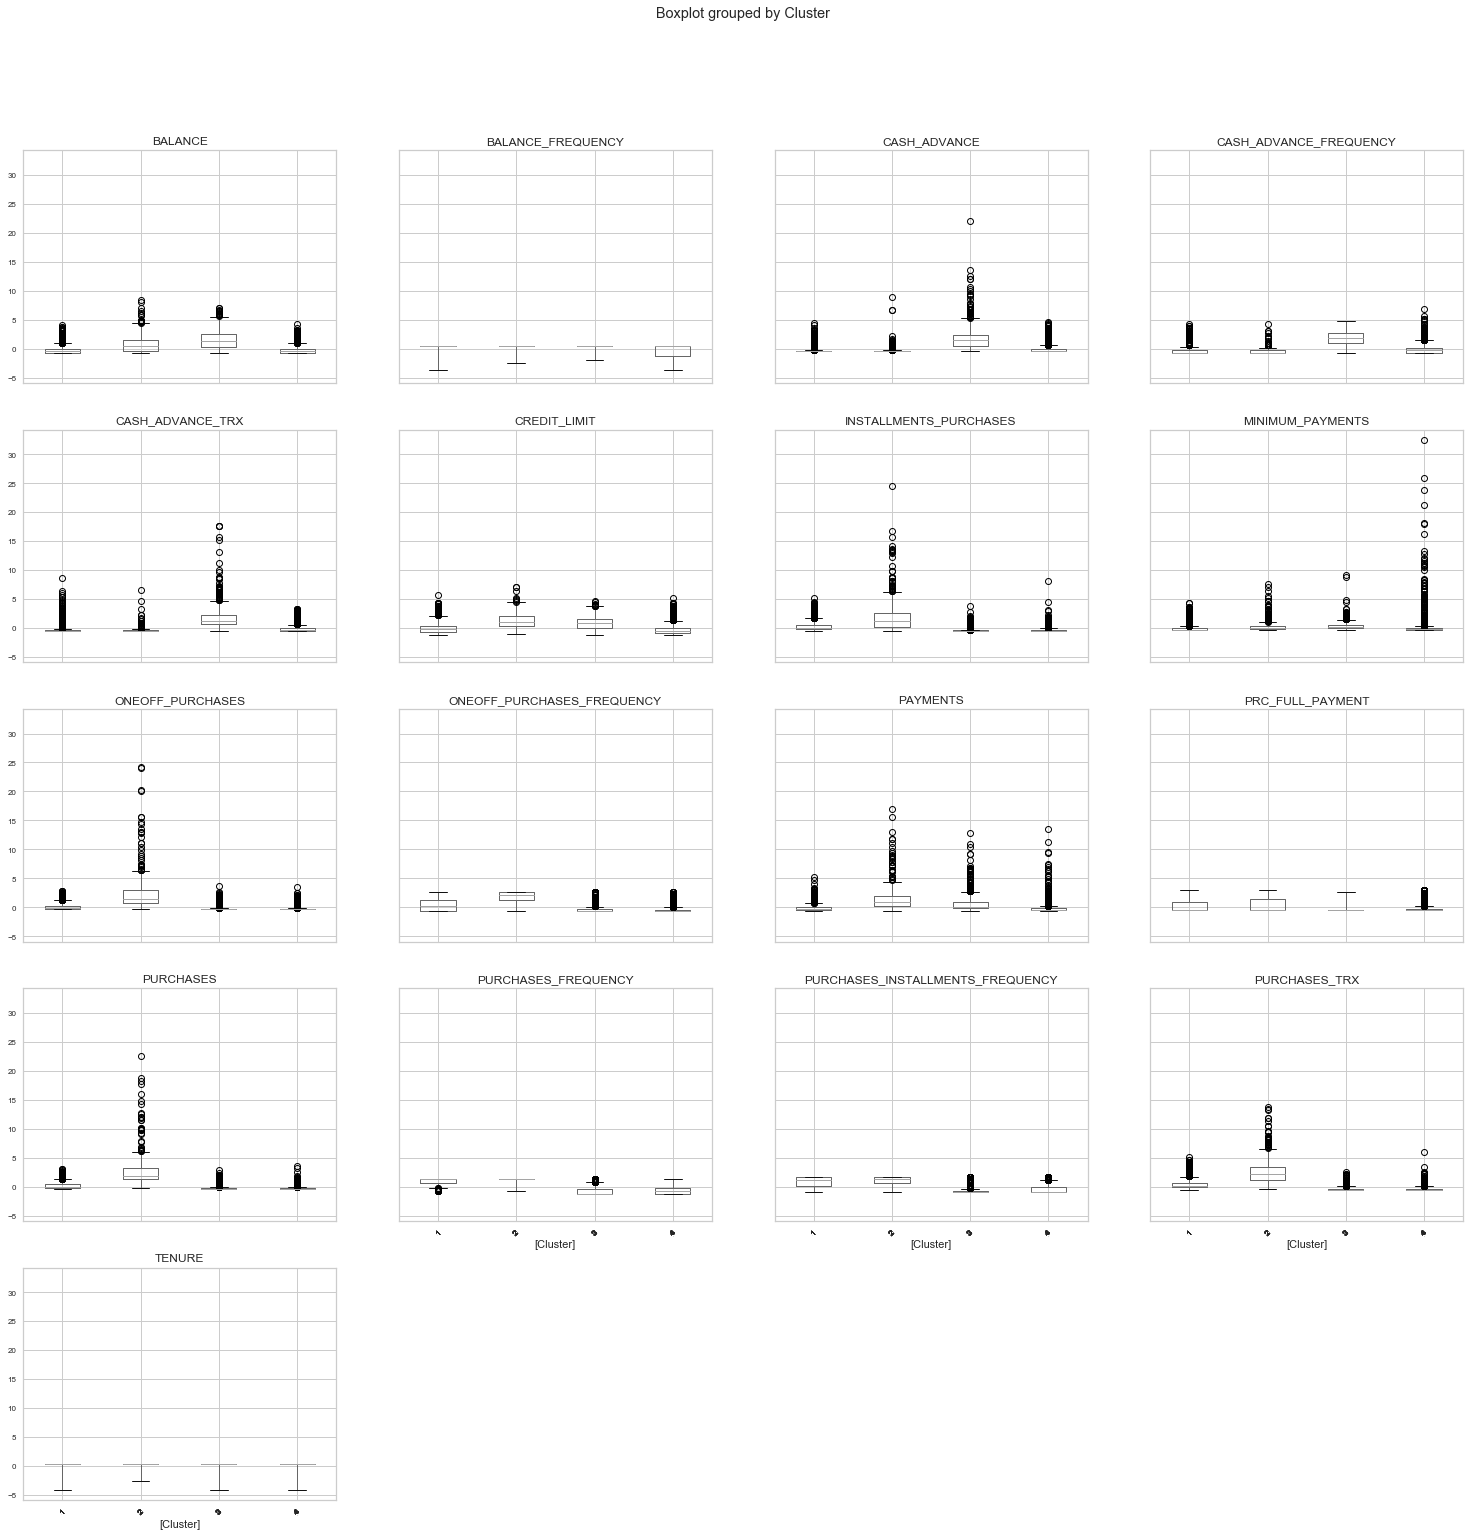

In [67]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1, 30)

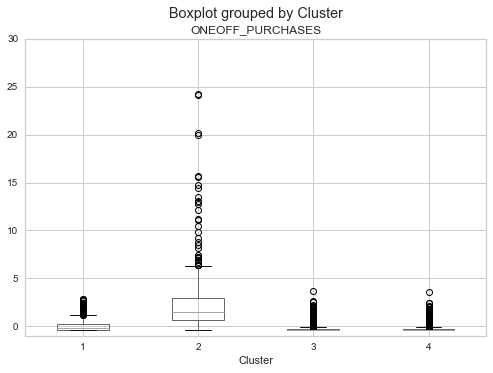

In [68]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1, 30)

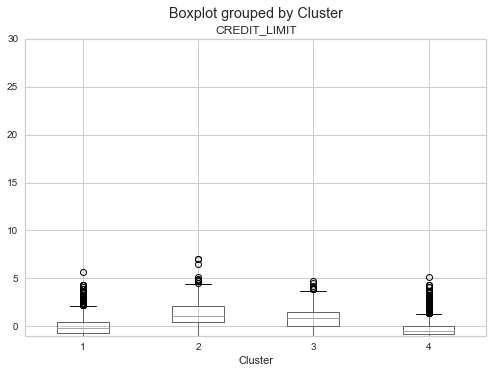

In [69]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1, 20)

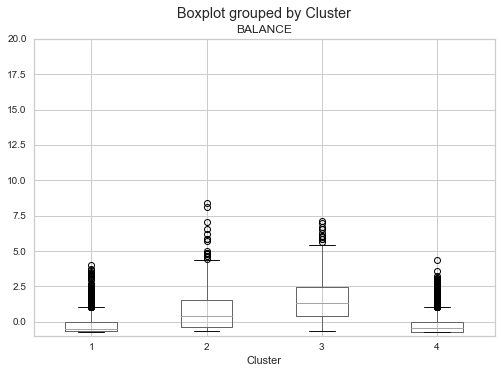

In [70]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

In [71]:
enlaces = linkage(datacopia, method = "complete") # ward, complete, average
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78840000e+04, 1.78950000e+04, 3.94434040e+01, 8.92600000e+03],
       [2.15900000e+03, 1.78960000e+04, 4.51239186e+01, 8.92700000e+03],
       [1.78940000e+04, 1.78970000e+04, 4.73411614e+01, 8.95000000e+03]])

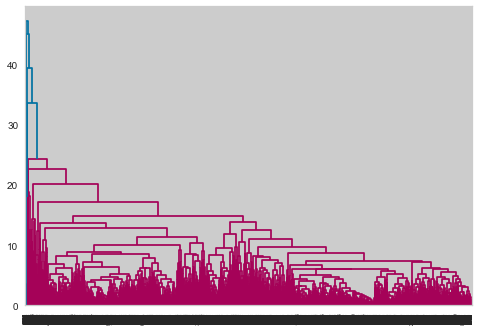

In [72]:
dendrogram(enlaces);

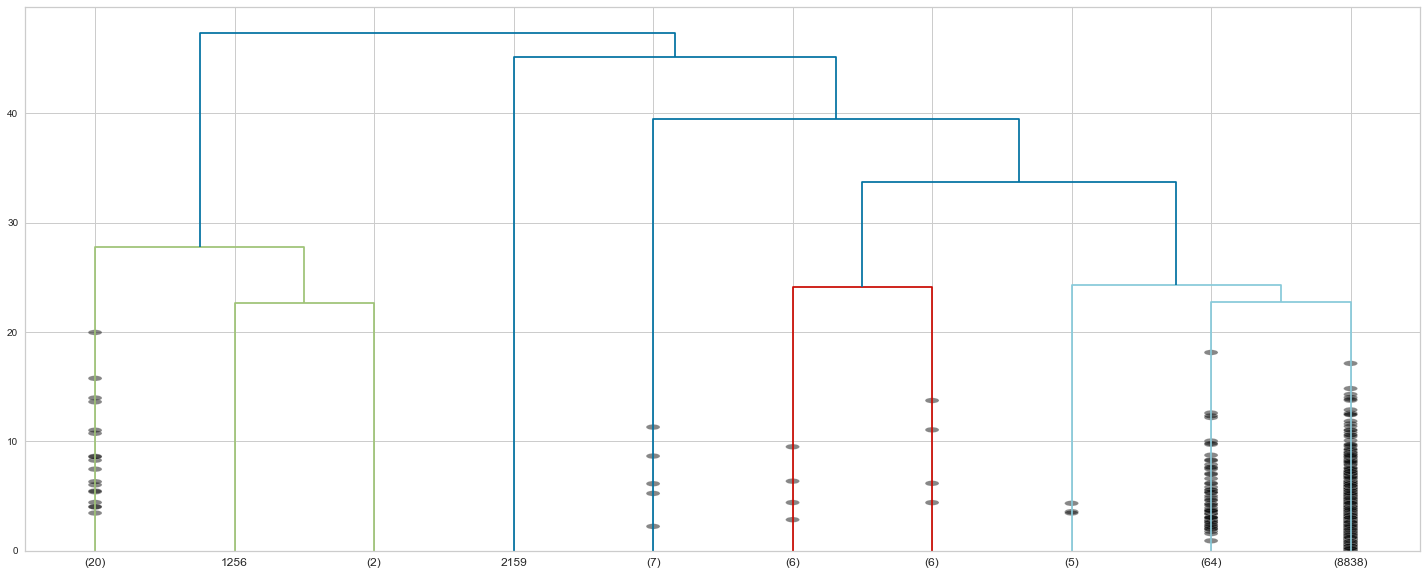

In [73]:
## let see minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True)

In [74]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [75]:
## inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[10.03195374,  5.31033408, 17.        ,  2.13920028],
       [17.38541155,  7.4918177 ,  2.        ,  0.70710678],
       [12.382334  ,  4.11756418, 28.        ,  2.51364835],
       [10.55050887,  6.65680953, 11.        ,  2.03645188],
       [13.42020875,  6.03133171, 19.        ,  1.79760278],
       [13.86971986,  6.42768758, 15.        ,  2.16354944],
       [14.90354486,  7.99001942, 20.        ,  2.35668471],
       [16.00980712,  9.94864073, 19.        ,  2.35545714],
       [21.00040506, 12.39765915, 13.        ,  1.94581196],
       [22.75440365, 11.81631266, 18.        ,  2.08074706]])

[47.34116143 45.12391857 39.44340399 33.73350146 27.77633976 24.26214741
 24.10678116 22.7324424  22.68292665 21.39182188]
[-3.46327172 -0.02938795 -0.24725917  2.44296935  3.3588261  -1.21897252
  1.32482302 -1.24158902]


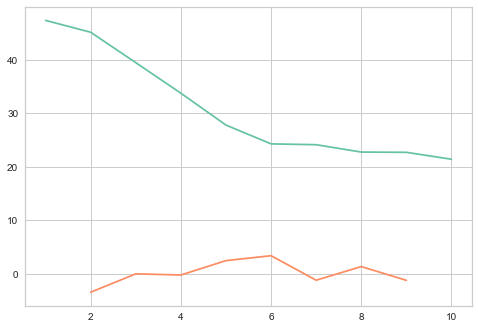

In [76]:
## método del codo 
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [77]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacredit.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        3  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        3  
4   678.334763        244.791237          0.000000      12        3

(-5, 30)

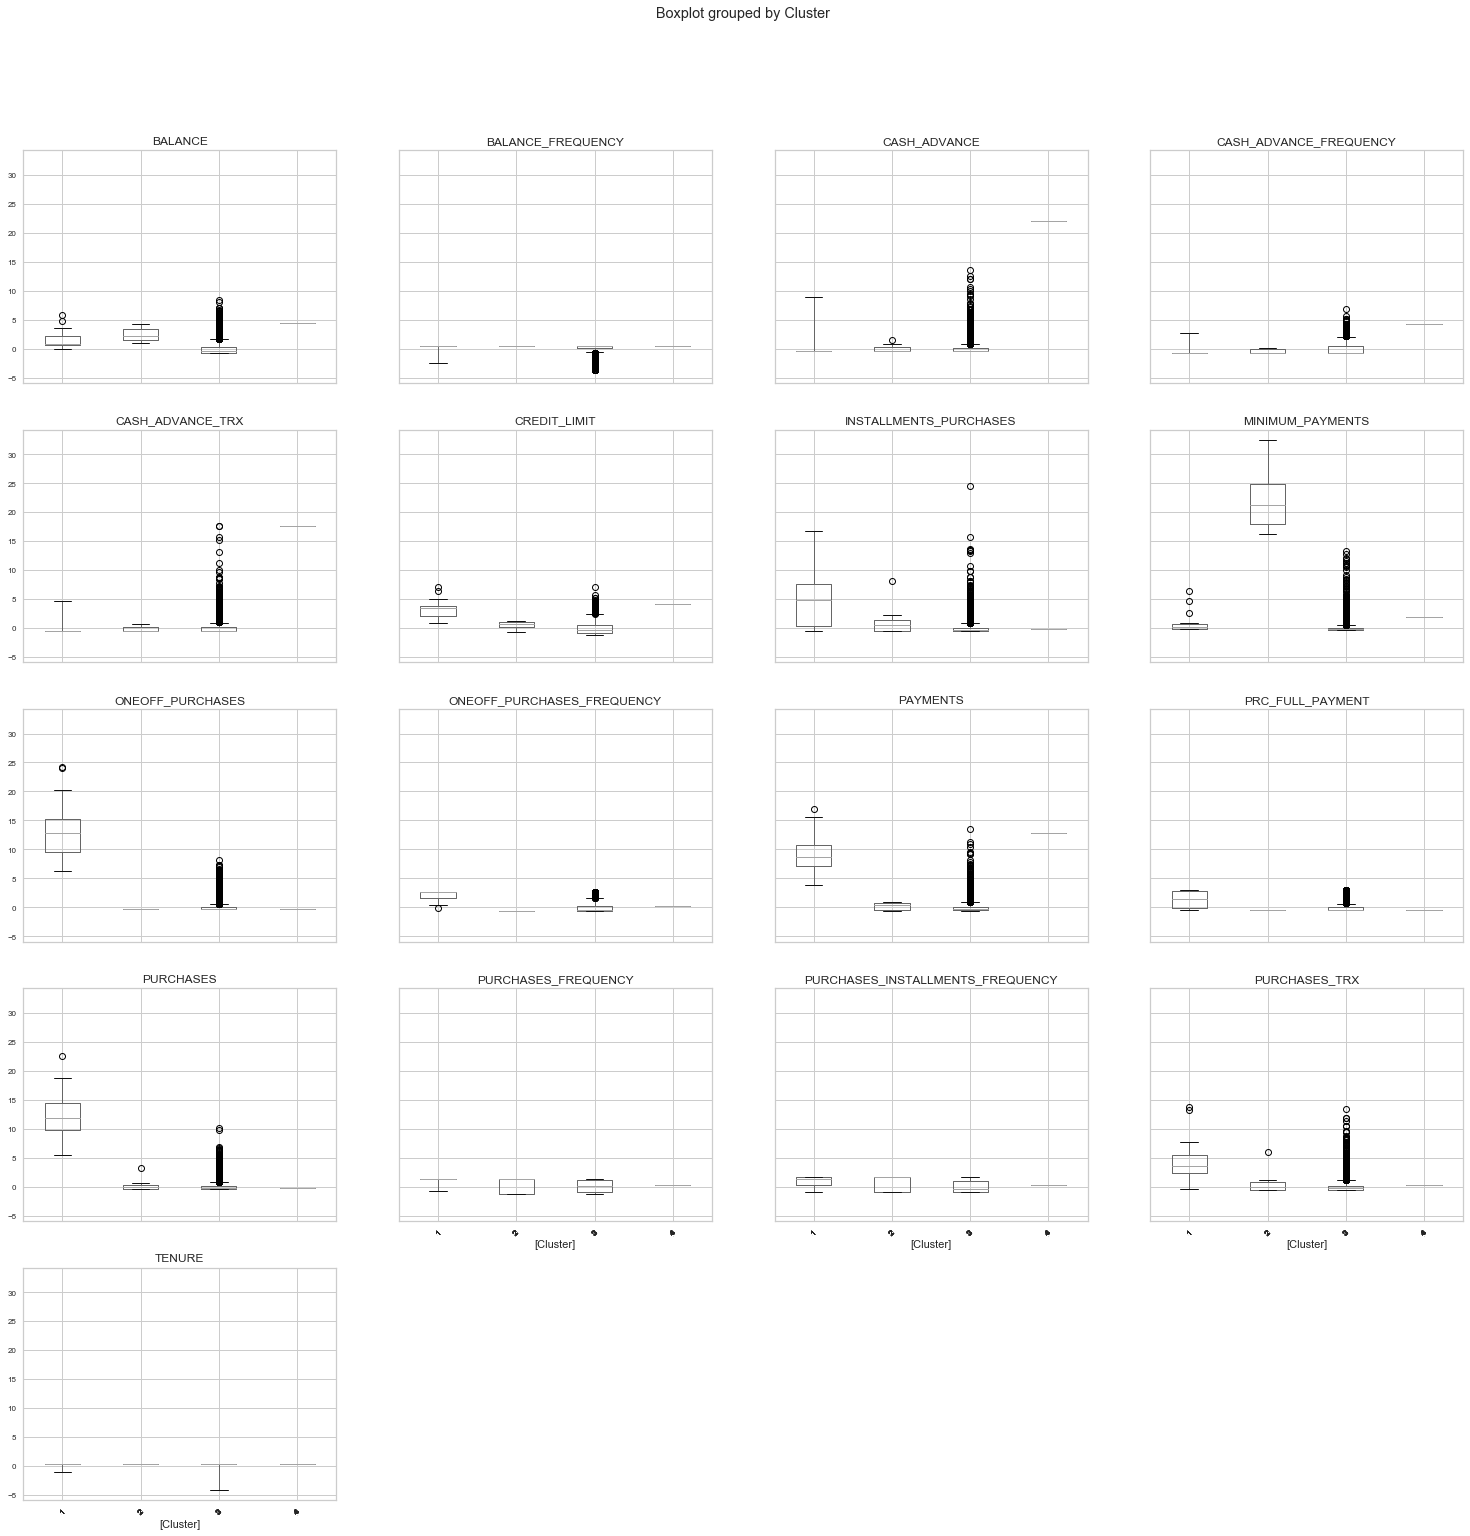

In [78]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1, 30)

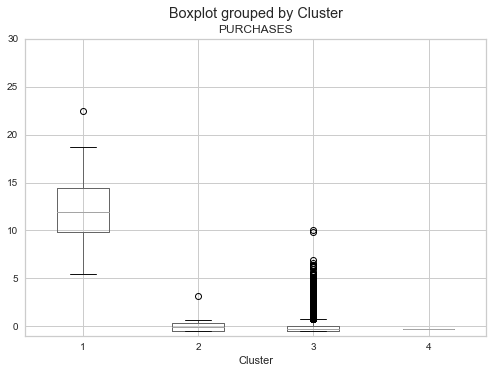

In [79]:
datacopia.boxplot(column='PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1, 30)

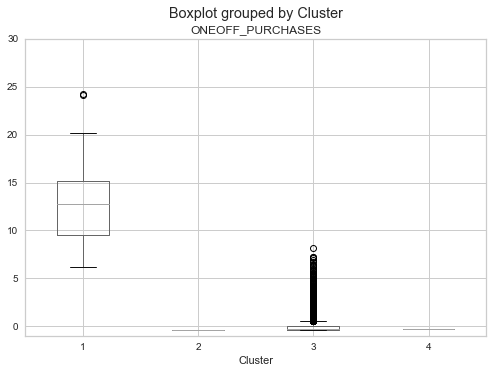

In [80]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1, 30)

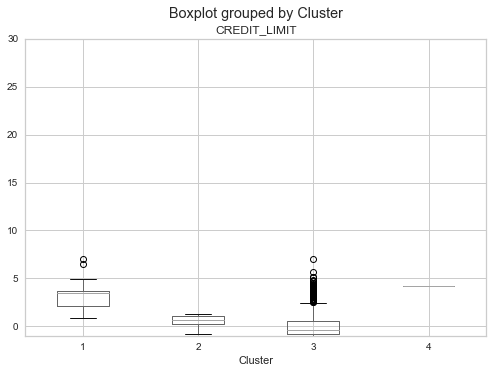

In [81]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1, 20)

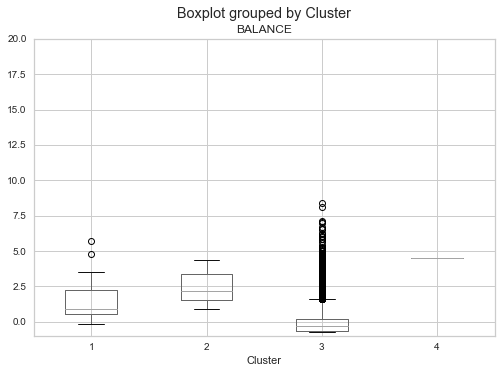

In [82]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

In [83]:
enlaces = linkage(datacopia, method = "average") # ward, complete, average
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78850000e+04, 1.78950000e+04, 2.69300205e+01, 8.94800000e+03],
       [5.26000000e+03, 1.78960000e+04, 2.73754989e+01, 8.94900000e+03],
       [2.15900000e+03, 1.78970000e+04, 3.21778581e+01, 8.95000000e+03]])

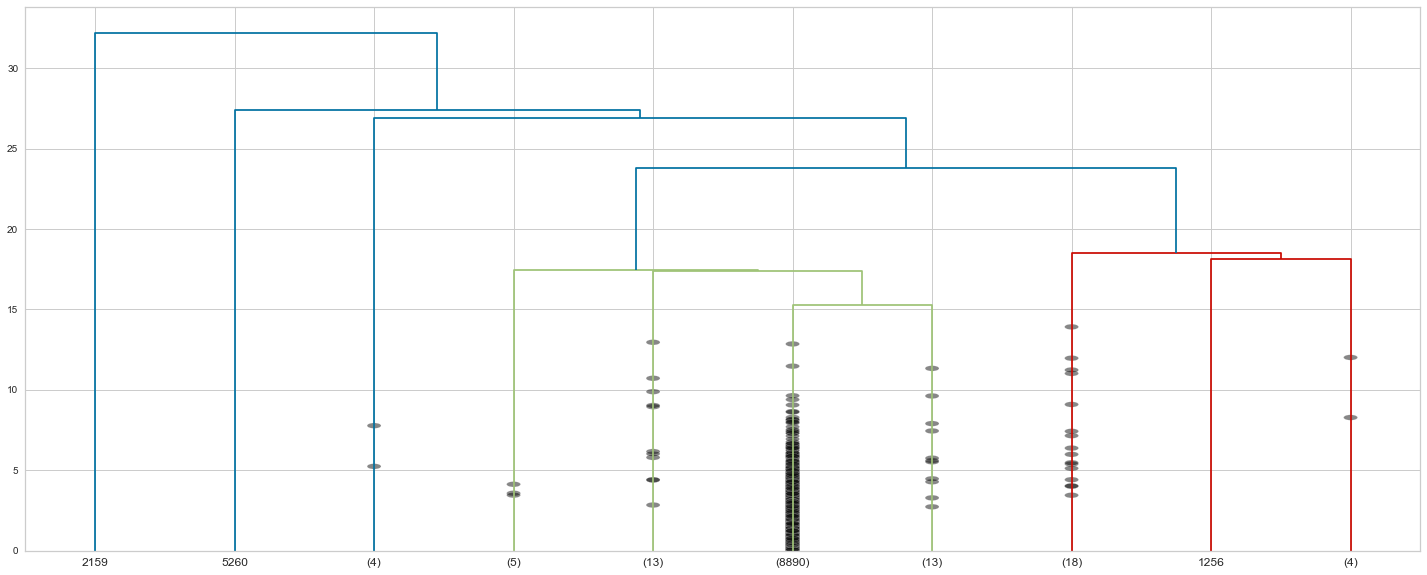

In [84]:
## let see minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True)

In [85]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [86]:
## inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[ 9.76919428,  3.44265368, 10.        ,  1.53723453],
       [ 9.76722397,  3.16984077, 16.        ,  1.74005826],
       [10.81836957,  3.53320905, 19.        ,  1.86198755],
       [11.10779108,  4.68964237, 16.        ,  1.35510521],
       [12.88152036,  4.05833621,  4.        ,  1.29146211],
       [12.39493604,  3.66503269, 12.        ,  1.67178141],
       [12.86697681,  5.26355139, 21.        ,  2.07482013],
       [13.58301319,  6.56428456, 18.        ,  2.03327677],
       [16.34031819,  7.57373535, 12.        ,  1.45703278],
       [20.89870148,  8.13677499,  8.        ,  1.38619498]])

[32.1778581  27.37549888 26.93002051 23.78789918 18.52206955 18.1227078
 17.46274989 17.39716084 15.28293157 15.06136038]
[ 4.35688085 -2.69664296 -2.1237083   4.86646788 -0.26059615  0.59436885
 -2.04864023  1.89265809]


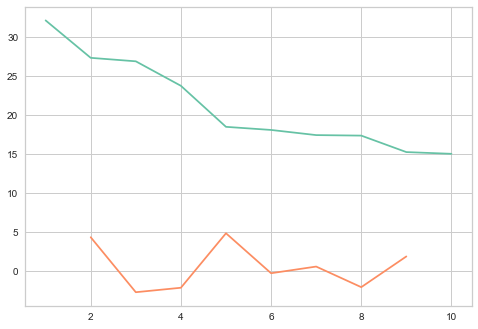

In [87]:
## método del codo 
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [88]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacredit.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        2  
3     0.000000        864.206542          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        2

(-5, 30)

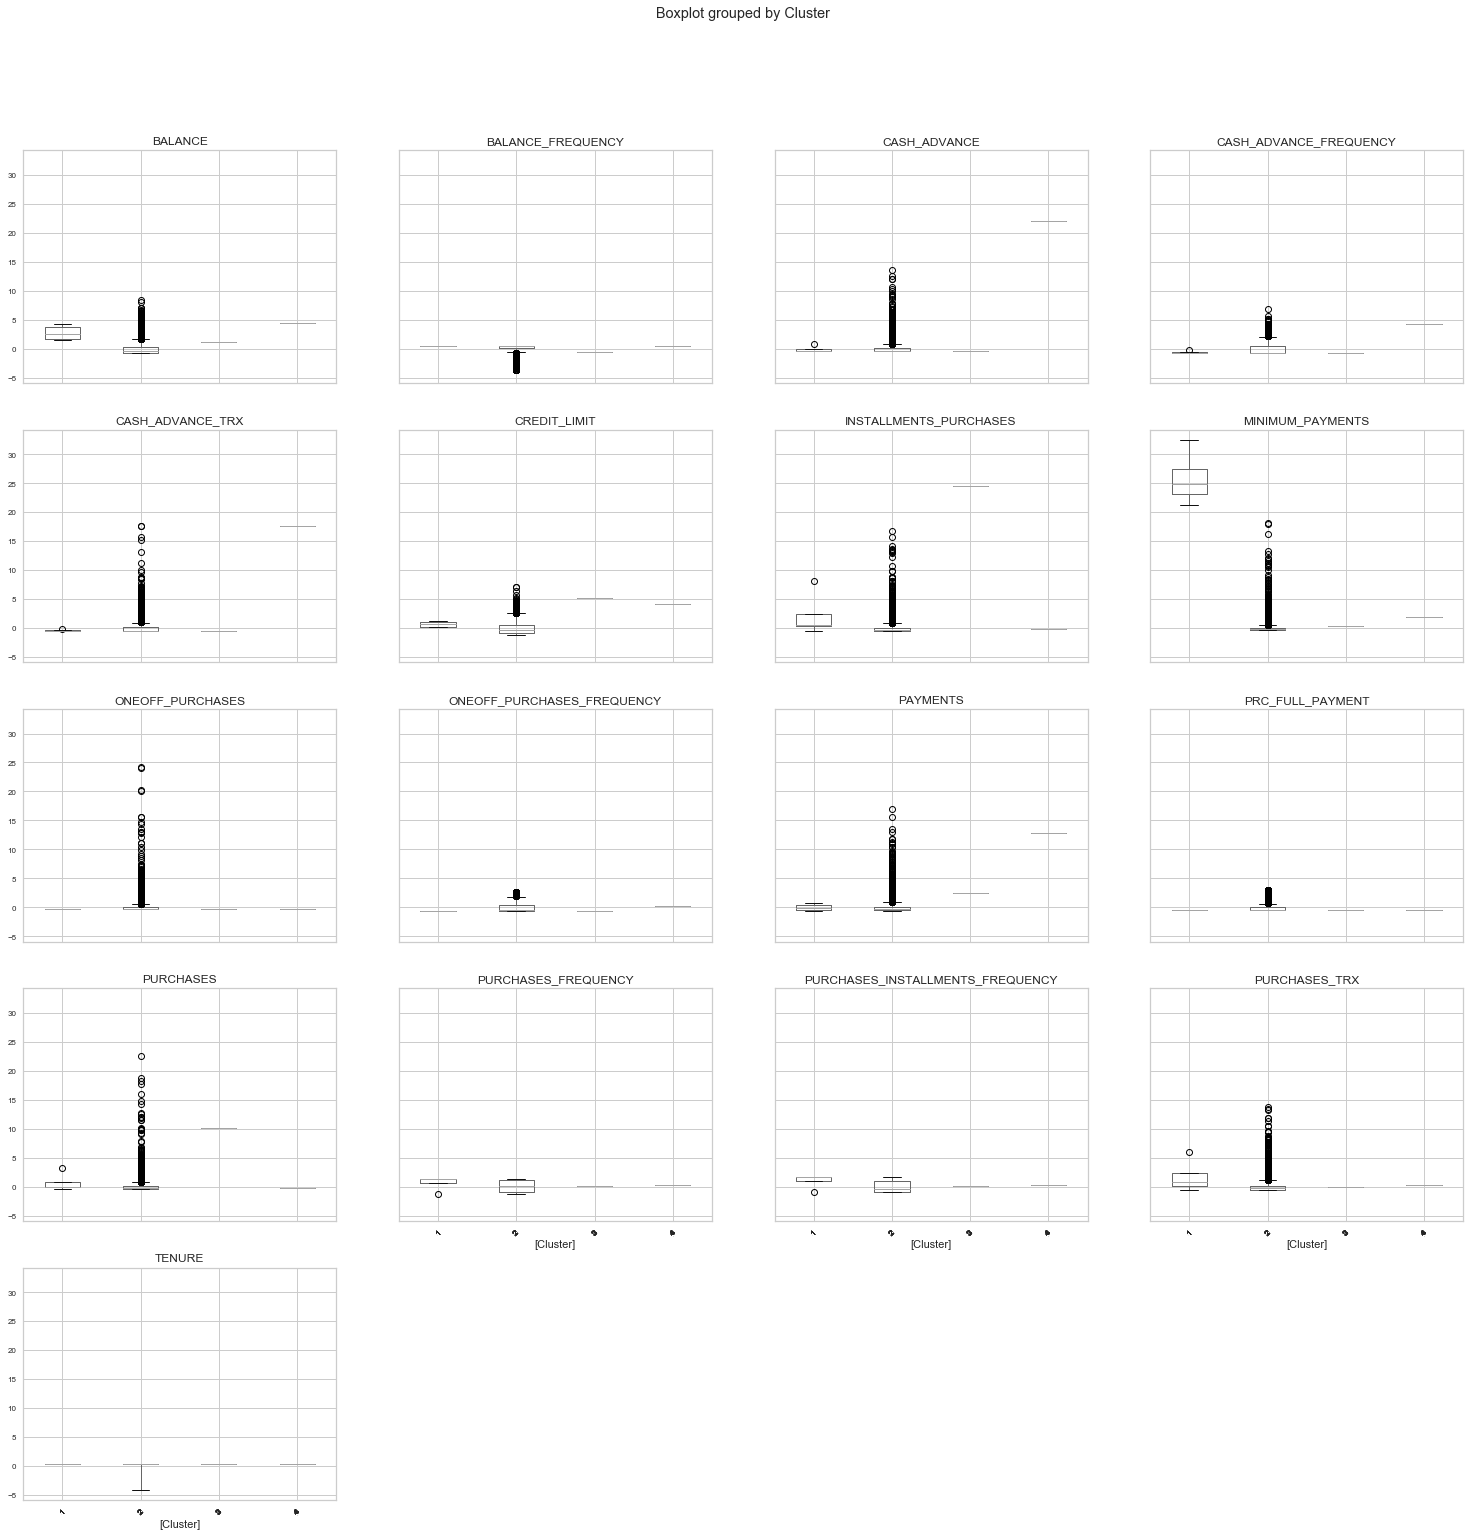

In [89]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1, 30)

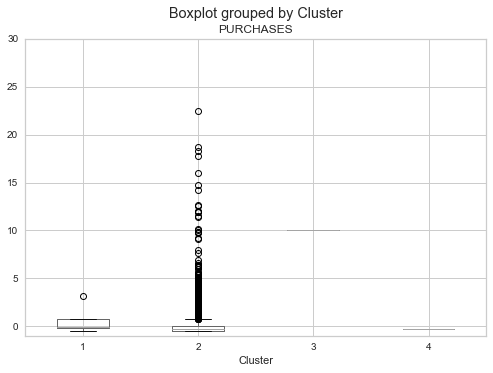

In [90]:
datacopia.boxplot(column='PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1, 30)

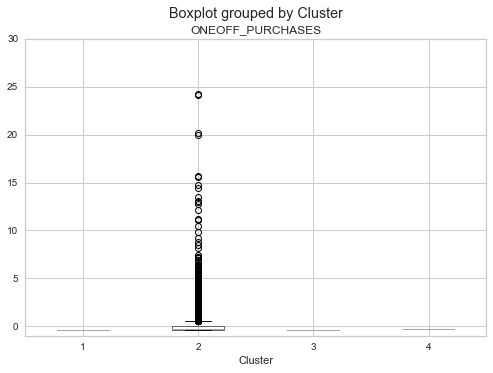

In [91]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1, 30)

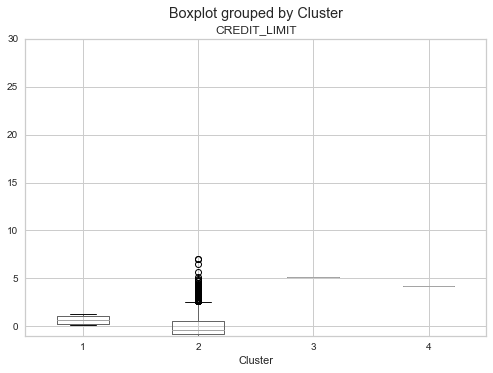

In [92]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1, 20)

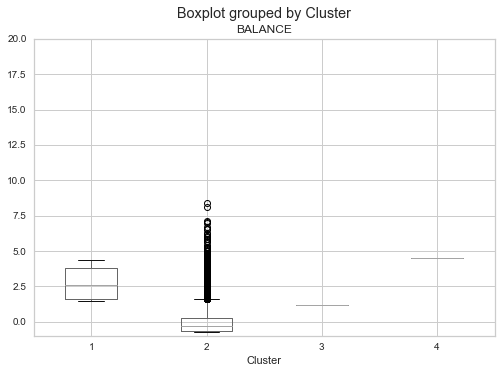

In [93]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

# DENSITY BASED CLUSTERS

In [94]:
# print('DENSITY BASED CLUSTERS \n ')
expectedNumber =3 #Found from trying in above section for various values of K_NN_Expected
EPSILON = 3
DISTANCEMETRIC='cosine' #euclidean, cosine,manhattan
subsetForClust1=copiadata
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(subsetForClust1) 
labels = db_default.labels_ 
print(labels)
cluster_labels_ = labels
print(len(set(labels)))
print((set(labels)))


[0 0 0 ... 0 0 0]
1
{0}


In [95]:
# print('DENSITY BASED CLUSTERS \n ')
expectedNumber = 3 #Found from trying in above section for various values of K_NN_Expected
EPSILON = 3
DISTANCEMETRIC='euclidean' #euclidean, cosine,manhattan
subsetForClust1=copiadata
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(subsetForClust1) 
labels = db_default.labels_ 
print(labels)
cluster_labels_ = labels
print(len(set(labels)))
print((set(labels)))

[0 0 0 ... 0 0 0]
7
{0, 1, 2, 3, 4, 5, -1}


In [96]:
# print('DENSITY BASED CLUSTERS \n ')
expectedNumber = 3 #Found from trying in above section for various values of K_NN_Expected
EPSILON = 3
DISTANCEMETRIC='manhattan' #euclidean, cosine,manhattan
subsetForClust1=copiadata
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(subsetForClust1) 
labels = db_default.labels_ 
print(labels)
cluster_labels_ = labels
print(len(set(labels)))
print((set(labels)))

[ 0  0  0 ...  0  0 -1]
28
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, -1}


CONCLUSSION

IDENTIFIED CLUSTERS

CLUSTER 1 - PEOPLE WITH LOW LEVEL OF INCOME. Not Frequent purchases.

CLUSTER 2 - PEOPLE WITH MEDIAN LEVEL O INCOME. High Frequent purchases.

CLUSTER 3 - PEOPLE WITH HIGH LEVEL OF INCOME. Not Frequent purchases and the most high advance level.

CLUSTER 4 - PEOPLE WITH LOW LEVEL OF INCOME. Frequent purchases.

In [97]:
endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sun, 30 May 2021 07:25:27 +0000
Run ended at :  Sun, 30 May 2021 07:51:55 +0000
